In [73]:
import io
import os
from pathlib import Path
from google.oauth2 import service_account
from google.cloud import vision
from collections import defaultdict
import mysql.connector
import re
import datetime

cnx = mysql.connector.connect(user='xxx', password='xxx', database='tinder')
cursor = cnx.cursor()

credentials = service_account.Credentials.from_service_account_file('/xxx/service_acc_key.json')
client = vision.ImageAnnotatorClient(credentials=credentials)

# 画像読み込み
google_dict = defaultdict(str)
src = sorted(Path('/xxx').glob('*.jpg'))

for i, path in enumerate(src):
    print("{}:{}".format(i, path))
    with io.open(path, 'rb') as image_file:
        content = image_file.read()
    response = client.annotate_image({
      'image': {'content': content},
      'features': [{'type': vision.enums.Feature.Type.SAFE_SEARCH_DETECTION},
                   {'type': vision.enums.Feature.Type.LABEL_DETECTION},
                   {'type': vision.enums.Feature.Type.WEB_DETECTION}]
    })

    file_name = str(path).split("/")[4][:-6]
    file_regex = re.match( r'(.*)_(.*)', file_name)
    id = file_regex.group(1)
    number_photo = file_regex.group(2)
    labels = [""] * 10
    for i, label in enumerate(response.label_annotations):
        labels[i] = label.description
    descriptions = [""] * 10
    for i, entity in enumerate(response.web_detection.web_entities):
        descriptions[i] = entity.description
    safe = response.safe_search_annotation
    adult = response.safe_search_annotation.adult
    spoof = response.safe_search_annotation.spoof
    racy = response.safe_search_annotation.racy
    created_date = datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")
    add_user = ("INSERT INTO vision "
           "(id, number_photo, description1, description2, description3, description4, description5, description6, description7, description8, description9, description10, description11, description12, description13, description14, description15, description16, description17, description18, description19, description20, description21, description22, description23, description24, description25, description26, description27, description28, description29, description30, adult, spoofed, racy, created_date) "
           "VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)")
    data_user = (id, number_photo, descriptions[0], descriptions[1], descriptions[2], descriptions[3], descriptions[4], descriptions[5], descriptions[6], descriptions[7], descriptions[8], descriptions[9], descriptions[10], descriptions[11], descriptions[12], descriptions[13], descriptions[14], descriptions[15], descriptions[16], descriptions[17], descriptions[18], descriptions[19], descriptions[20], descriptions[21], descriptions[22], descriptions[23], descriptions[24], descriptions[25], descriptions[26], descriptions[27], descriptions[28], descriptions[29], adult, spoof, racy, created_date)
    
    try:
        cursor.execute(update_user, data_user)
        cnx.commit()
    except:
        import traceback
        traceback.print_exc()
        break
cursor.close()
cnx.close()

0:/home/iwata/tinder_google/50944b5ae6e7ed0a4300002f_0_1.jpg
1:/home/iwata/tinder_google/50944b5ae6e7ed0a4300002f_1_1.jpg
2:/home/iwata/tinder_google/50944b5ae6e7ed0a4300002f_2_1.jpg
3:/home/iwata/tinder_google/50944b5ae6e7ed0a4300002f_3_1.jpg
4:/home/iwata/tinder_google/50944b5ae6e7ed0a4300002f_4_1.jpg
5:/home/iwata/tinder_google/50944b5ae6e7ed0a4300002f_5_1.jpg
6:/home/iwata/tinder_google/50cffc3524571b780300116a_0_1.jpg
7:/home/iwata/tinder_google/50cffc3524571b780300116a_1_1.jpg
8:/home/iwata/tinder_google/50cffc3524571b780300116a_2_1.jpg
9:/home/iwata/tinder_google/50cffc3524571b780300116a_3_1.jpg
10:/home/iwata/tinder_google/50cffc3524571b780300116a_4_1.jpg
11:/home/iwata/tinder_google/50cffc3524571b780300116a_5_1.jpg
12:/home/iwata/tinder_google/50dcf6648834a99002001ec3_0_1.jpg
13:/home/iwata/tinder_google/50dcf6648834a99002001ec3_1_1.jpg
14:/home/iwata/tinder_google/50dcf6648834a99002001ec3_2_1.jpg
15:/home/iwata/tinder_google/50dcf6648834a99002001ec3_3_1.jpg
16:/home/iwata/tin

132:/home/iwata/tinder_google/51f969e0a33fa1532c00003f_0_1.jpg
133:/home/iwata/tinder_google/51f969e0a33fa1532c00003f_1_1.jpg
134:/home/iwata/tinder_google/51f969e0a33fa1532c00003f_2_1.jpg
135:/home/iwata/tinder_google/51f969e0a33fa1532c00003f_3_1.jpg
136:/home/iwata/tinder_google/51f969e0a33fa1532c00003f_4_1.jpg
137:/home/iwata/tinder_google/51f969e0a33fa1532c00003f_5_1.jpg
138:/home/iwata/tinder_google/51fe2a5951215d0e080005c2_0_1.jpg
139:/home/iwata/tinder_google/51fe2a5951215d0e080005c2_1_1.jpg
140:/home/iwata/tinder_google/51fe2a5951215d0e080005c2_2_1.jpg
141:/home/iwata/tinder_google/51fe2a5951215d0e080005c2_3_1.jpg
142:/home/iwata/tinder_google/51fe2a5951215d0e080005c2_4_1.jpg
143:/home/iwata/tinder_google/51fe2a5951215d0e080005c2_5_1.jpg
144:/home/iwata/tinder_google/5209ad22b884eacf02000031_0_1.jpg
145:/home/iwata/tinder_google/5209ad22b884eacf02000031_1_1.jpg
146:/home/iwata/tinder_google/5209ad22b884eacf02000031_2_1.jpg
147:/home/iwata/tinder_google/5209ad22b884eacf02000031_

263:/home/iwata/tinder_google/525961c72249d674710011e2_5_1.jpg
264:/home/iwata/tinder_google/5259a9d1002c32337f000ed2_0_1.jpg
265:/home/iwata/tinder_google/5259a9d1002c32337f000ed2_1_1.jpg
266:/home/iwata/tinder_google/5259a9d1002c32337f000ed2_2_1.jpg
267:/home/iwata/tinder_google/5259a9d1002c32337f000ed2_3_1.jpg
268:/home/iwata/tinder_google/5259a9d1002c32337f000ed2_4_1.jpg
269:/home/iwata/tinder_google/5259cebedc21aa7e7200215a_0_1.jpg
270:/home/iwata/tinder_google/5259cebedc21aa7e7200215a_1_1.jpg
271:/home/iwata/tinder_google/5259cebedc21aa7e7200215a_2_1.jpg
272:/home/iwata/tinder_google/5259cebedc21aa7e7200215a_3_1.jpg
273:/home/iwata/tinder_google/5259cebedc21aa7e7200215a_4_1.jpg
274:/home/iwata/tinder_google/5259cebedc21aa7e7200215a_5_1.jpg
275:/home/iwata/tinder_google/5261c528831a15367900228f_0_1.jpg
276:/home/iwata/tinder_google/5261c528831a15367900228f_1_1.jpg
277:/home/iwata/tinder_google/5261c528831a15367900228f_2_1.jpg
278:/home/iwata/tinder_google/5261c528831a15367900228f_

394:/home/iwata/tinder_google/529d1af41e2110b85000005c_6_1.jpg
395:/home/iwata/tinder_google/529d530f9b17ab0e29000074_0_1.jpg
396:/home/iwata/tinder_google/529d530f9b17ab0e29000074_1_1.jpg
397:/home/iwata/tinder_google/529d530f9b17ab0e29000074_2_1.jpg
398:/home/iwata/tinder_google/529d530f9b17ab0e29000074_3_1.jpg
399:/home/iwata/tinder_google/529d530f9b17ab0e29000074_4_1.jpg
400:/home/iwata/tinder_google/529d530f9b17ab0e29000074_5_1.jpg
401:/home/iwata/tinder_google/529fc3caf25fe14e79000078_0_1.jpg
402:/home/iwata/tinder_google/529fc3caf25fe14e79000078_1_1.jpg
403:/home/iwata/tinder_google/529fc3caf25fe14e79000078_2_1.jpg
404:/home/iwata/tinder_google/529fc3caf25fe14e79000078_3_1.jpg
405:/home/iwata/tinder_google/529fc3caf25fe14e79000078_4_1.jpg
406:/home/iwata/tinder_google/529fc3caf25fe14e79000078_5_1.jpg
407:/home/iwata/tinder_google/52a10ae2b0e9e17558000176_0_1.jpg
408:/home/iwata/tinder_google/52a10ae2b0e9e17558000176_1_1.jpg
409:/home/iwata/tinder_google/52a10ae2b0e9e17558000176_

525:/home/iwata/tinder_google/52e97a2d6ae00bcb10002746_0_1.jpg
526:/home/iwata/tinder_google/52e97a2d6ae00bcb10002746_1_1.jpg
527:/home/iwata/tinder_google/52e97a2d6ae00bcb10002746_2_1.jpg
528:/home/iwata/tinder_google/52e97a2d6ae00bcb10002746_3_1.jpg
529:/home/iwata/tinder_google/52e97a2d6ae00bcb10002746_4_1.jpg
530:/home/iwata/tinder_google/52eb4792842b43a5180009dc_0_1.jpg
531:/home/iwata/tinder_google/52eb4792842b43a5180009dc_1_1.jpg
532:/home/iwata/tinder_google/52eb4792842b43a5180009dc_2_1.jpg
533:/home/iwata/tinder_google/52eb4792842b43a5180009dc_3_1.jpg
534:/home/iwata/tinder_google/52eb4792842b43a5180009dc_4_1.jpg
535:/home/iwata/tinder_google/52eb4792842b43a5180009dc_5_1.jpg
536:/home/iwata/tinder_google/52ece6e6aa5bcd0c2100005c_0_1.jpg
537:/home/iwata/tinder_google/52ece6e6aa5bcd0c2100005c_1_1.jpg
538:/home/iwata/tinder_google/52ece6e6aa5bcd0c2100005c_2_1.jpg
539:/home/iwata/tinder_google/52ece6e6aa5bcd0c2100005c_3_1.jpg
540:/home/iwata/tinder_google/52ece6e6aa5bcd0c2100005c_

656:/home/iwata/tinder_google/5315d2fe48ba5e8520000691_5_1.jpg
657:/home/iwata/tinder_google/53165ceb1917561449000001_0_1.jpg
658:/home/iwata/tinder_google/53165ceb1917561449000001_1_1.jpg
659:/home/iwata/tinder_google/53165ceb1917561449000001_2_1.jpg
660:/home/iwata/tinder_google/53165ceb1917561449000001_3_1.jpg
661:/home/iwata/tinder_google/53165ceb1917561449000001_4_1.jpg
662:/home/iwata/tinder_google/53165ceb1917561449000001_5_1.jpg
663:/home/iwata/tinder_google/5316aa138e7c3c6b64000018_0_1.jpg
664:/home/iwata/tinder_google/5316aa138e7c3c6b64000018_1_1.jpg
665:/home/iwata/tinder_google/5316aa138e7c3c6b64000018_2_1.jpg
666:/home/iwata/tinder_google/5316aa138e7c3c6b64000018_3_1.jpg
667:/home/iwata/tinder_google/5316aa138e7c3c6b64000018_4_1.jpg
668:/home/iwata/tinder_google/5316aa138e7c3c6b64000018_5_1.jpg
669:/home/iwata/tinder_google/532230de635ac9383a0029d1_0_1.jpg
670:/home/iwata/tinder_google/532230de635ac9383a0029d1_1_1.jpg
671:/home/iwata/tinder_google/532230de635ac9383a0029d1_

787:/home/iwata/tinder_google/5345a3c48e2005e279001e53_3_1.jpg
788:/home/iwata/tinder_google/5345a3c48e2005e279001e53_4_1.jpg
789:/home/iwata/tinder_google/5345a3c48e2005e279001e53_5_1.jpg
790:/home/iwata/tinder_google/53474cd53d24095b6f000b47_0_1.jpg
791:/home/iwata/tinder_google/53474cd53d24095b6f000b47_1_1.jpg
792:/home/iwata/tinder_google/53474cd53d24095b6f000b47_2_1.jpg
793:/home/iwata/tinder_google/53474cd53d24095b6f000b47_3_1.jpg
794:/home/iwata/tinder_google/53474cd53d24095b6f000b47_4_1.jpg
795:/home/iwata/tinder_google/53474cd53d24095b6f000b47_5_1.jpg
796:/home/iwata/tinder_google/53489080b544b56472003785_0_1.jpg
797:/home/iwata/tinder_google/53489080b544b56472003785_1_1.jpg
798:/home/iwata/tinder_google/53489080b544b56472003785_2_1.jpg
799:/home/iwata/tinder_google/53489080b544b56472003785_3_1.jpg
800:/home/iwata/tinder_google/53489080b544b56472003785_4_1.jpg
801:/home/iwata/tinder_google/5351cd0a5a7222c134001b7f_0_1.jpg
802:/home/iwata/tinder_google/5351cd0a5a7222c134001b7f_

918:/home/iwata/tinder_google/53731c5604cb34801f0010a1_3_1.jpg
919:/home/iwata/tinder_google/53731c5604cb34801f0010a1_4_1.jpg
920:/home/iwata/tinder_google/5373a57576bc4c481c001d97_0_1.jpg
921:/home/iwata/tinder_google/5373a57576bc4c481c001d97_1_1.jpg
922:/home/iwata/tinder_google/5373a57576bc4c481c001d97_2_1.jpg
923:/home/iwata/tinder_google/5373a57576bc4c481c001d97_3_1.jpg
924:/home/iwata/tinder_google/5373a57576bc4c481c001d97_4_1.jpg
925:/home/iwata/tinder_google/5373a57576bc4c481c001d97_5_1.jpg
926:/home/iwata/tinder_google/5373a57576bc4c481c001d97_6_1.jpg
927:/home/iwata/tinder_google/5373a57576bc4c481c001d97_7_1.jpg
928:/home/iwata/tinder_google/5373a57576bc4c481c001d97_8_1.jpg
929:/home/iwata/tinder_google/5374999d59a185f505001c7f_0_1.jpg
930:/home/iwata/tinder_google/5374999d59a185f505001c7f_1_1.jpg
931:/home/iwata/tinder_google/5374999d59a185f505001c7f_2_1.jpg
932:/home/iwata/tinder_google/5374999d59a185f505001c7f_3_1.jpg
933:/home/iwata/tinder_google/5374999d59a185f505001c7f_

1048:/home/iwata/tinder_google/539c8571f201ff8b15f70719_4_1.jpg
1049:/home/iwata/tinder_google/539c8571f201ff8b15f70719_5_1.jpg
1050:/home/iwata/tinder_google/539e47a855086b6b6461bec7_0_1.jpg
1051:/home/iwata/tinder_google/539e47a855086b6b6461bec7_1_1.jpg
1052:/home/iwata/tinder_google/539e47a855086b6b6461bec7_2_1.jpg
1053:/home/iwata/tinder_google/539e47a855086b6b6461bec7_3_1.jpg
1054:/home/iwata/tinder_google/539e47a855086b6b6461bec7_4_1.jpg
1055:/home/iwata/tinder_google/539fcf47fcd5f6ce44ed8c63_0_1.jpg
1056:/home/iwata/tinder_google/539fcf47fcd5f6ce44ed8c63_1_1.jpg
1057:/home/iwata/tinder_google/539fcf47fcd5f6ce44ed8c63_2_1.jpg
1058:/home/iwata/tinder_google/539fcf47fcd5f6ce44ed8c63_3_1.jpg
1059:/home/iwata/tinder_google/539fcf47fcd5f6ce44ed8c63_4_1.jpg
1060:/home/iwata/tinder_google/539fcf47fcd5f6ce44ed8c63_5_1.jpg
1061:/home/iwata/tinder_google/53a046ab9dab6bb631ac9bfd_0_1.jpg
1062:/home/iwata/tinder_google/53a046ab9dab6bb631ac9bfd_1_1.jpg
1063:/home/iwata/tinder_google/53a046ab9

1177:/home/iwata/tinder_google/53ca11631bb24f6a6dd8c753_3_1.jpg
1178:/home/iwata/tinder_google/53ca11631bb24f6a6dd8c753_4_1.jpg
1179:/home/iwata/tinder_google/53cd8e83977b0c6118f90236_0_1.jpg
1180:/home/iwata/tinder_google/53cd8e83977b0c6118f90236_1_1.jpg
1181:/home/iwata/tinder_google/53cd8e83977b0c6118f90236_2_1.jpg
1182:/home/iwata/tinder_google/53cd8e83977b0c6118f90236_3_1.jpg
1183:/home/iwata/tinder_google/53cd8e83977b0c6118f90236_4_1.jpg
1184:/home/iwata/tinder_google/53cd8e83977b0c6118f90236_5_1.jpg
1185:/home/iwata/tinder_google/53ce98f1977b0c6118f9558c_0_1.jpg
1186:/home/iwata/tinder_google/53ce98f1977b0c6118f9558c_1_1.jpg
1187:/home/iwata/tinder_google/53ce98f1977b0c6118f9558c_2_1.jpg
1188:/home/iwata/tinder_google/53ce98f1977b0c6118f9558c_3_1.jpg
1189:/home/iwata/tinder_google/53ce98f1977b0c6118f9558c_4_1.jpg
1190:/home/iwata/tinder_google/53ce98f1977b0c6118f9558c_5_1.jpg
1191:/home/iwata/tinder_google/53d25688e27c808b06bb7fe0_0_1.jpg
1192:/home/iwata/tinder_google/53d25688e

1306:/home/iwata/tinder_google/53fda88a7d78d39b2ed31b50_1_1.jpg
1307:/home/iwata/tinder_google/53fda88a7d78d39b2ed31b50_2_1.jpg
1308:/home/iwata/tinder_google/53fda88a7d78d39b2ed31b50_3_1.jpg
1309:/home/iwata/tinder_google/53fda88a7d78d39b2ed31b50_4_1.jpg
1310:/home/iwata/tinder_google/53fda88a7d78d39b2ed31b50_5_1.jpg
1311:/home/iwata/tinder_google/5403383a51d8671419c08bce_0_1.jpg
1312:/home/iwata/tinder_google/5403383a51d8671419c08bce_1_1.jpg
1313:/home/iwata/tinder_google/5403383a51d8671419c08bce_2_1.jpg
1314:/home/iwata/tinder_google/5403383a51d8671419c08bce_3_1.jpg
1315:/home/iwata/tinder_google/5403383a51d8671419c08bce_4_1.jpg
1316:/home/iwata/tinder_google/5404abcbf8daf82b564b6e02_0_1.jpg
1317:/home/iwata/tinder_google/5404abcbf8daf82b564b6e02_1_1.jpg
1318:/home/iwata/tinder_google/5404abcbf8daf82b564b6e02_2_1.jpg
1319:/home/iwata/tinder_google/5404abcbf8daf82b564b6e02_3_1.jpg
1320:/home/iwata/tinder_google/5404abcbf8daf82b564b6e02_4_1.jpg
1321:/home/iwata/tinder_google/5405d1dc1

1435:/home/iwata/tinder_google/54296556f816e94717976e1b_4_1.jpg
1436:/home/iwata/tinder_google/542c09d9c1963aeb1cb81b76_0_1.jpg
1437:/home/iwata/tinder_google/542c09d9c1963aeb1cb81b76_1_1.jpg
1438:/home/iwata/tinder_google/542c09d9c1963aeb1cb81b76_2_1.jpg
1439:/home/iwata/tinder_google/542c09d9c1963aeb1cb81b76_3_1.jpg
1440:/home/iwata/tinder_google/542c09d9c1963aeb1cb81b76_4_1.jpg
1441:/home/iwata/tinder_google/542c09d9c1963aeb1cb81b76_5_1.jpg
1442:/home/iwata/tinder_google/542cea32529094be59c55694_0_1.jpg
1443:/home/iwata/tinder_google/542cea32529094be59c55694_1_1.jpg
1444:/home/iwata/tinder_google/542cea32529094be59c55694_2_1.jpg
1445:/home/iwata/tinder_google/542cea32529094be59c55694_3_1.jpg
1446:/home/iwata/tinder_google/542cea32529094be59c55694_4_1.jpg
1447:/home/iwata/tinder_google/542cea32529094be59c55694_5_1.jpg
1448:/home/iwata/tinder_google/542dd5229f18e5041cf34457_0_1.jpg
1449:/home/iwata/tinder_google/542dd5229f18e5041cf34457_1_1.jpg
1450:/home/iwata/tinder_google/542dd5229

1564:/home/iwata/tinder_google/54501389cd78e05650d71c89_1_1.jpg
1565:/home/iwata/tinder_google/54501389cd78e05650d71c89_2_1.jpg
1566:/home/iwata/tinder_google/54501389cd78e05650d71c89_3_1.jpg
1567:/home/iwata/tinder_google/54501389cd78e05650d71c89_4_1.jpg
1568:/home/iwata/tinder_google/54501389cd78e05650d71c89_5_1.jpg
1569:/home/iwata/tinder_google/5452eb326ecc25085c8670bc_0_1.jpg
1570:/home/iwata/tinder_google/5452eb326ecc25085c8670bc_1_1.jpg
1571:/home/iwata/tinder_google/5452eb326ecc25085c8670bc_2_1.jpg
1572:/home/iwata/tinder_google/5452eb326ecc25085c8670bc_3_1.jpg
1573:/home/iwata/tinder_google/5452eb326ecc25085c8670bc_4_1.jpg
1574:/home/iwata/tinder_google/5452eb326ecc25085c8670bc_5_1.jpg
1575:/home/iwata/tinder_google/5455fff85ef1170f50fafc2e_0_1.jpg
1576:/home/iwata/tinder_google/5455fff85ef1170f50fafc2e_1_1.jpg
1577:/home/iwata/tinder_google/5455fff85ef1170f50fafc2e_2_1.jpg
1578:/home/iwata/tinder_google/5455fff85ef1170f50fafc2e_3_1.jpg
1579:/home/iwata/tinder_google/5455fff85

1693:/home/iwata/tinder_google/5476cab79dce9b1d6d54d0ca_0_1.jpg
1694:/home/iwata/tinder_google/5476cab79dce9b1d6d54d0ca_1_1.jpg
1695:/home/iwata/tinder_google/5476cab79dce9b1d6d54d0ca_2_1.jpg
1696:/home/iwata/tinder_google/5476cab79dce9b1d6d54d0ca_3_1.jpg
1697:/home/iwata/tinder_google/5476cab79dce9b1d6d54d0ca_4_1.jpg
1698:/home/iwata/tinder_google/5478df6bf389594324b71085_0_1.jpg
1699:/home/iwata/tinder_google/5478df6bf389594324b71085_1_1.jpg
1700:/home/iwata/tinder_google/5478df6bf389594324b71085_2_1.jpg
1701:/home/iwata/tinder_google/5478df6bf389594324b71085_3_1.jpg
1702:/home/iwata/tinder_google/5478df6bf389594324b71085_4_1.jpg
1703:/home/iwata/tinder_google/5478df6bf389594324b71085_5_1.jpg
1704:/home/iwata/tinder_google/54793a88a69765834e9877c5_0_1.jpg
1705:/home/iwata/tinder_google/54793a88a69765834e9877c5_1_1.jpg
1706:/home/iwata/tinder_google/54793a88a69765834e9877c5_2_1.jpg
1707:/home/iwata/tinder_google/54793a88a69765834e9877c5_3_1.jpg
1708:/home/iwata/tinder_google/54793a88a

1822:/home/iwata/tinder_google/54a72677d5b67e755073da72_2_1.jpg
1823:/home/iwata/tinder_google/54a72677d5b67e755073da72_3_1.jpg
1824:/home/iwata/tinder_google/54a72677d5b67e755073da72_4_1.jpg
1825:/home/iwata/tinder_google/54a72677d5b67e755073da72_5_1.jpg
1826:/home/iwata/tinder_google/54a9c9ef16eaf455271045d2_0_1.jpg
1827:/home/iwata/tinder_google/54a9c9ef16eaf455271045d2_1_1.jpg
1828:/home/iwata/tinder_google/54a9c9ef16eaf455271045d2_2_1.jpg
1829:/home/iwata/tinder_google/54a9c9ef16eaf455271045d2_3_1.jpg
1830:/home/iwata/tinder_google/54a9c9ef16eaf455271045d2_4_1.jpg
1831:/home/iwata/tinder_google/54a9c9ef16eaf455271045d2_5_1.jpg
1832:/home/iwata/tinder_google/54a9c9ef16eaf455271045d2_6_1.jpg
1833:/home/iwata/tinder_google/54b134ba35035305314ad50b_0_1.jpg
1834:/home/iwata/tinder_google/54b134ba35035305314ad50b_1_1.jpg
1835:/home/iwata/tinder_google/54b134ba35035305314ad50b_2_1.jpg
1836:/home/iwata/tinder_google/54b134ba35035305314ad50b_3_1.jpg
1837:/home/iwata/tinder_google/54b134ba3

1951:/home/iwata/tinder_google/54cb0e20f70f34b846d6712a_3_1.jpg
1952:/home/iwata/tinder_google/54cb0e20f70f34b846d6712a_4_1.jpg
1953:/home/iwata/tinder_google/54cb0e20f70f34b846d6712a_5_1.jpg
1954:/home/iwata/tinder_google/54cba24d096627e76c99e685_0_1.jpg
1955:/home/iwata/tinder_google/54cba24d096627e76c99e685_1_1.jpg
1956:/home/iwata/tinder_google/54cba24d096627e76c99e685_2_1.jpg
1957:/home/iwata/tinder_google/54cba24d096627e76c99e685_3_1.jpg
1958:/home/iwata/tinder_google/54cba24d096627e76c99e685_4_1.jpg
1959:/home/iwata/tinder_google/54cbf5bbdbec56f006faa59b_0_1.jpg
1960:/home/iwata/tinder_google/54cbf5bbdbec56f006faa59b_1_1.jpg
1961:/home/iwata/tinder_google/54cbf5bbdbec56f006faa59b_2_1.jpg
1962:/home/iwata/tinder_google/54cbf5bbdbec56f006faa59b_3_1.jpg
1963:/home/iwata/tinder_google/54cbf5bbdbec56f006faa59b_4_1.jpg
1964:/home/iwata/tinder_google/54cbf5bbdbec56f006faa59b_5_1.jpg
1965:/home/iwata/tinder_google/54cd0e9dbd50b5744914adae_0_1.jpg
1966:/home/iwata/tinder_google/54cd0e9db

2080:/home/iwata/tinder_google/54ecc7b54c6a47574877a7f6_2_1.jpg
2081:/home/iwata/tinder_google/54ecc7b54c6a47574877a7f6_3_1.jpg
2082:/home/iwata/tinder_google/54ecc7b54c6a47574877a7f6_4_1.jpg
2083:/home/iwata/tinder_google/54ecc7b54c6a47574877a7f6_5_1.jpg
2084:/home/iwata/tinder_google/54edd9fdbd5ba6d877557e11_0_1.jpg
2085:/home/iwata/tinder_google/54edd9fdbd5ba6d877557e11_1_1.jpg
2086:/home/iwata/tinder_google/54edd9fdbd5ba6d877557e11_2_1.jpg
2087:/home/iwata/tinder_google/54edd9fdbd5ba6d877557e11_3_1.jpg
2088:/home/iwata/tinder_google/54edd9fdbd5ba6d877557e11_4_1.jpg
2089:/home/iwata/tinder_google/54edd9fdbd5ba6d877557e11_5_1.jpg
2090:/home/iwata/tinder_google/54f383e0b2ce4f697c69c144_0_1.jpg
2091:/home/iwata/tinder_google/54f383e0b2ce4f697c69c144_1_1.jpg
2092:/home/iwata/tinder_google/54f383e0b2ce4f697c69c144_2_1.jpg
2093:/home/iwata/tinder_google/54f383e0b2ce4f697c69c144_3_1.jpg
2094:/home/iwata/tinder_google/54f383e0b2ce4f697c69c144_4_1.jpg
2095:/home/iwata/tinder_google/54f5a8f14

2209:/home/iwata/tinder_google/55213f6feef330a220630032_0_1.jpg
2210:/home/iwata/tinder_google/55213f6feef330a220630032_1_1.jpg
2211:/home/iwata/tinder_google/55213f6feef330a220630032_2_1.jpg
2212:/home/iwata/tinder_google/55213f6feef330a220630032_3_1.jpg
2213:/home/iwata/tinder_google/55213f6feef330a220630032_4_1.jpg
2214:/home/iwata/tinder_google/55213f6feef330a220630032_5_1.jpg
2215:/home/iwata/tinder_google/5523d1d31c96ae4a5dadce2e_0_1.jpg
2216:/home/iwata/tinder_google/5523d1d31c96ae4a5dadce2e_1_1.jpg
2217:/home/iwata/tinder_google/5523d1d31c96ae4a5dadce2e_2_1.jpg
2218:/home/iwata/tinder_google/5523d1d31c96ae4a5dadce2e_3_1.jpg
2219:/home/iwata/tinder_google/5523d1d31c96ae4a5dadce2e_4_1.jpg
2220:/home/iwata/tinder_google/552a6196164a45cf37a085f4_0_1.jpg
2221:/home/iwata/tinder_google/552a6196164a45cf37a085f4_1_1.jpg
2222:/home/iwata/tinder_google/552a6196164a45cf37a085f4_2_1.jpg
2223:/home/iwata/tinder_google/552a6196164a45cf37a085f4_3_1.jpg
2224:/home/iwata/tinder_google/552a61961

2338:/home/iwata/tinder_google/5557b8e5bc94c47a2b0f48db_4_1.jpg
2339:/home/iwata/tinder_google/5557b8e5bc94c47a2b0f48db_5_1.jpg
2340:/home/iwata/tinder_google/5558a428035a57c163d0fdd4_0_1.jpg
2341:/home/iwata/tinder_google/5558a428035a57c163d0fdd4_1_1.jpg
2342:/home/iwata/tinder_google/5558a428035a57c163d0fdd4_2_1.jpg
2343:/home/iwata/tinder_google/5558a428035a57c163d0fdd4_3_1.jpg
2344:/home/iwata/tinder_google/5558a428035a57c163d0fdd4_4_1.jpg
2345:/home/iwata/tinder_google/5559ab7a951d9ce75191ecb4_0_1.jpg
2346:/home/iwata/tinder_google/5559ab7a951d9ce75191ecb4_1_1.jpg
2347:/home/iwata/tinder_google/5559ab7a951d9ce75191ecb4_2_1.jpg
2348:/home/iwata/tinder_google/5559ab7a951d9ce75191ecb4_3_1.jpg
2349:/home/iwata/tinder_google/5559ab7a951d9ce75191ecb4_4_1.jpg
2350:/home/iwata/tinder_google/5559ab7a951d9ce75191ecb4_5_1.jpg
2351:/home/iwata/tinder_google/5559ab7a951d9ce75191ecb4_6_1.jpg
2352:/home/iwata/tinder_google/5559ab7a951d9ce75191ecb4_7_1.jpg
2353:/home/iwata/tinder_google/555c3ec08

2467:/home/iwata/tinder_google/558304b045036abd7204f24b_1_1.jpg
2468:/home/iwata/tinder_google/558304b045036abd7204f24b_2_1.jpg
2469:/home/iwata/tinder_google/558304b045036abd7204f24b_3_1.jpg
2470:/home/iwata/tinder_google/558304b045036abd7204f24b_4_1.jpg
2471:/home/iwata/tinder_google/5583134ef97f8fcd27dae1db_0_1.jpg
2472:/home/iwata/tinder_google/5583134ef97f8fcd27dae1db_1_1.jpg
2473:/home/iwata/tinder_google/5583134ef97f8fcd27dae1db_2_1.jpg
2474:/home/iwata/tinder_google/5583134ef97f8fcd27dae1db_3_1.jpg
2475:/home/iwata/tinder_google/5583134ef97f8fcd27dae1db_4_1.jpg
2476:/home/iwata/tinder_google/5583134ef97f8fcd27dae1db_5_1.jpg
2477:/home/iwata/tinder_google/55846b3cfa6aad437ab9dc53_0_1.jpg
2478:/home/iwata/tinder_google/55846b3cfa6aad437ab9dc53_1_1.jpg
2479:/home/iwata/tinder_google/55846b3cfa6aad437ab9dc53_2_1.jpg
2480:/home/iwata/tinder_google/55846b3cfa6aad437ab9dc53_3_1.jpg
2481:/home/iwata/tinder_google/55846b3cfa6aad437ab9dc53_4_1.jpg
2482:/home/iwata/tinder_google/55846b3cf

2596:/home/iwata/tinder_google/55a3d3e70ac92ef36889ad14_3_1.jpg
2597:/home/iwata/tinder_google/55a3d3e70ac92ef36889ad14_4_1.jpg
2598:/home/iwata/tinder_google/55a3d3e70ac92ef36889ad14_5_1.jpg
2599:/home/iwata/tinder_google/55a7281257b8ff4c62eb9df9_0_1.jpg
2600:/home/iwata/tinder_google/55a7281257b8ff4c62eb9df9_1_1.jpg
2601:/home/iwata/tinder_google/55a7281257b8ff4c62eb9df9_2_1.jpg
2602:/home/iwata/tinder_google/55a7281257b8ff4c62eb9df9_3_1.jpg
2603:/home/iwata/tinder_google/55a7281257b8ff4c62eb9df9_4_1.jpg
2604:/home/iwata/tinder_google/55a7281257b8ff4c62eb9df9_5_1.jpg
2605:/home/iwata/tinder_google/55a8a9008ad69d9a61b8d99d_0_1.jpg
2606:/home/iwata/tinder_google/55a8a9008ad69d9a61b8d99d_1_1.jpg
2607:/home/iwata/tinder_google/55a8a9008ad69d9a61b8d99d_2_1.jpg
2608:/home/iwata/tinder_google/55a8a9008ad69d9a61b8d99d_3_1.jpg
2609:/home/iwata/tinder_google/55a8a9008ad69d9a61b8d99d_4_1.jpg
2610:/home/iwata/tinder_google/55a8a9008ad69d9a61b8d99d_5_1.jpg
2611:/home/iwata/tinder_google/55b02fa0a

2725:/home/iwata/tinder_google/55df84ef657e80fc33be101e_1_1.jpg
2726:/home/iwata/tinder_google/55df84ef657e80fc33be101e_2_1.jpg
2727:/home/iwata/tinder_google/55df84ef657e80fc33be101e_3_1.jpg
2728:/home/iwata/tinder_google/55df84ef657e80fc33be101e_4_1.jpg
2729:/home/iwata/tinder_google/55e1c65ec571aded2eeee627_0_1.jpg
2730:/home/iwata/tinder_google/55e1c65ec571aded2eeee627_1_1.jpg
2731:/home/iwata/tinder_google/55e1c65ec571aded2eeee627_2_1.jpg
2732:/home/iwata/tinder_google/55e1c65ec571aded2eeee627_3_1.jpg
2733:/home/iwata/tinder_google/55e1c65ec571aded2eeee627_4_1.jpg
2734:/home/iwata/tinder_google/55e1c65ec571aded2eeee627_5_1.jpg
2735:/home/iwata/tinder_google/55e2a3ed7b92602d5b2da60e_0_1.jpg
2736:/home/iwata/tinder_google/55e2a3ed7b92602d5b2da60e_1_1.jpg
2737:/home/iwata/tinder_google/55e2a3ed7b92602d5b2da60e_2_1.jpg
2738:/home/iwata/tinder_google/55e2a3ed7b92602d5b2da60e_3_1.jpg
2739:/home/iwata/tinder_google/55e2a3ed7b92602d5b2da60e_4_1.jpg
2740:/home/iwata/tinder_google/55e2a3ed7

2854:/home/iwata/tinder_google/5600d311c94942020fd73905_1_1.jpg
2855:/home/iwata/tinder_google/5600d311c94942020fd73905_2_1.jpg
2856:/home/iwata/tinder_google/5600d311c94942020fd73905_3_1.jpg
2857:/home/iwata/tinder_google/5600d311c94942020fd73905_4_1.jpg
2858:/home/iwata/tinder_google/560408aa62ad966a333195ad_0_1.jpg
2859:/home/iwata/tinder_google/560408aa62ad966a333195ad_1_1.jpg
2860:/home/iwata/tinder_google/560408aa62ad966a333195ad_2_1.jpg
2861:/home/iwata/tinder_google/560408aa62ad966a333195ad_3_1.jpg
2862:/home/iwata/tinder_google/560408aa62ad966a333195ad_4_1.jpg
2863:/home/iwata/tinder_google/56059fb3a4e3eaf06bd49e7f_0_1.jpg
2864:/home/iwata/tinder_google/56059fb3a4e3eaf06bd49e7f_1_1.jpg
2865:/home/iwata/tinder_google/56059fb3a4e3eaf06bd49e7f_2_1.jpg
2866:/home/iwata/tinder_google/56059fb3a4e3eaf06bd49e7f_3_1.jpg
2867:/home/iwata/tinder_google/56059fb3a4e3eaf06bd49e7f_4_1.jpg
2868:/home/iwata/tinder_google/560728b09773e9404e9f5d2a_0_1.jpg
2869:/home/iwata/tinder_google/560728b09

2983:/home/iwata/tinder_google/56313f605790fb3720960e71_5_1.jpg
2984:/home/iwata/tinder_google/563384dfba966af443eb853a_0_1.jpg
2985:/home/iwata/tinder_google/563384dfba966af443eb853a_1_1.jpg
2986:/home/iwata/tinder_google/563384dfba966af443eb853a_2_1.jpg
2987:/home/iwata/tinder_google/563384dfba966af443eb853a_3_1.jpg
2988:/home/iwata/tinder_google/563384dfba966af443eb853a_4_1.jpg
2989:/home/iwata/tinder_google/563384dfba966af443eb853a_5_1.jpg
2990:/home/iwata/tinder_google/5633bc0ef7c0f22f3e89b65f_0_1.jpg
2991:/home/iwata/tinder_google/5633bc0ef7c0f22f3e89b65f_1_1.jpg
2992:/home/iwata/tinder_google/5633bc0ef7c0f22f3e89b65f_2_1.jpg
2993:/home/iwata/tinder_google/5633bc0ef7c0f22f3e89b65f_3_1.jpg
2994:/home/iwata/tinder_google/5633bc0ef7c0f22f3e89b65f_4_1.jpg
2995:/home/iwata/tinder_google/5633bc0ef7c0f22f3e89b65f_5_1.jpg
2996:/home/iwata/tinder_google/563989af748bdb2205b329b9_0_1.jpg
2997:/home/iwata/tinder_google/563989af748bdb2205b329b9_1_1.jpg
2998:/home/iwata/tinder_google/563989af7

3112:/home/iwata/tinder_google/564e8fa7dce7a15e40d79a63_4_1.jpg
3113:/home/iwata/tinder_google/564e8fa7dce7a15e40d79a63_5_1.jpg
3114:/home/iwata/tinder_google/565078683c75a7f63b61967c_0_1.jpg
3115:/home/iwata/tinder_google/565078683c75a7f63b61967c_1_1.jpg
3116:/home/iwata/tinder_google/565078683c75a7f63b61967c_2_1.jpg
3117:/home/iwata/tinder_google/565078683c75a7f63b61967c_3_1.jpg
3118:/home/iwata/tinder_google/565078683c75a7f63b61967c_4_1.jpg
3119:/home/iwata/tinder_google/565078683c75a7f63b61967c_5_1.jpg
3120:/home/iwata/tinder_google/56547098e3147a810c0d5560_0_1.jpg
3121:/home/iwata/tinder_google/56547098e3147a810c0d5560_1_1.jpg
3122:/home/iwata/tinder_google/56547098e3147a810c0d5560_2_1.jpg
3123:/home/iwata/tinder_google/56547098e3147a810c0d5560_3_1.jpg
3124:/home/iwata/tinder_google/56547098e3147a810c0d5560_4_1.jpg
3125:/home/iwata/tinder_google/56547098e3147a810c0d5560_5_1.jpg
3126:/home/iwata/tinder_google/56547098e3147a810c0d5560_6_1.jpg
3127:/home/iwata/tinder_google/5654bbb64

3241:/home/iwata/tinder_google/566d12b59866ba685bf9a2f9_3_1.jpg
3242:/home/iwata/tinder_google/566d12b59866ba685bf9a2f9_4_1.jpg
3243:/home/iwata/tinder_google/566d12b59866ba685bf9a2f9_5_1.jpg
3244:/home/iwata/tinder_google/566de421b1cba2a3405e8a17_0_1.jpg
3245:/home/iwata/tinder_google/566de421b1cba2a3405e8a17_1_1.jpg
3246:/home/iwata/tinder_google/566de421b1cba2a3405e8a17_2_1.jpg
3247:/home/iwata/tinder_google/566de421b1cba2a3405e8a17_3_1.jpg
3248:/home/iwata/tinder_google/566de421b1cba2a3405e8a17_4_1.jpg
3249:/home/iwata/tinder_google/566ee5916f3d1c3b6351c7b7_0_1.jpg
3250:/home/iwata/tinder_google/566ee5916f3d1c3b6351c7b7_1_1.jpg
3251:/home/iwata/tinder_google/566ee5916f3d1c3b6351c7b7_2_1.jpg
3252:/home/iwata/tinder_google/566ee5916f3d1c3b6351c7b7_3_1.jpg
3253:/home/iwata/tinder_google/566ee5916f3d1c3b6351c7b7_4_1.jpg
3254:/home/iwata/tinder_google/566ee5916f3d1c3b6351c7b7_5_1.jpg
3255:/home/iwata/tinder_google/56715d6e422bfcc47fa7957a_0_1.jpg
3256:/home/iwata/tinder_google/56715d6e4

3370:/home/iwata/tinder_google/56a954bac8e89a8306a4b317_3_1.jpg
3371:/home/iwata/tinder_google/56a954bac8e89a8306a4b317_4_1.jpg
3372:/home/iwata/tinder_google/56a954bac8e89a8306a4b317_5_1.jpg
3373:/home/iwata/tinder_google/56ae56de956fa638288a18f4_0_1.jpg
3374:/home/iwata/tinder_google/56ae56de956fa638288a18f4_1_1.jpg
3375:/home/iwata/tinder_google/56ae56de956fa638288a18f4_2_1.jpg
3376:/home/iwata/tinder_google/56ae56de956fa638288a18f4_3_1.jpg
3377:/home/iwata/tinder_google/56ae56de956fa638288a18f4_4_1.jpg
3378:/home/iwata/tinder_google/56ae56de956fa638288a18f4_5_1.jpg
3379:/home/iwata/tinder_google/56b152eb5c1443297630245e_0_1.jpg
3380:/home/iwata/tinder_google/56b152eb5c1443297630245e_1_1.jpg
3381:/home/iwata/tinder_google/56b152eb5c1443297630245e_2_1.jpg
3382:/home/iwata/tinder_google/56b152eb5c1443297630245e_3_1.jpg
3383:/home/iwata/tinder_google/56b152eb5c1443297630245e_4_1.jpg
3384:/home/iwata/tinder_google/56b1e0847db159506bbdab0c_0_1.jpg
3385:/home/iwata/tinder_google/56b1e0847

3499:/home/iwata/tinder_google/56cb1d7c155ed1f70b4b208d_2_1.jpg
3500:/home/iwata/tinder_google/56cb1d7c155ed1f70b4b208d_3_1.jpg
3501:/home/iwata/tinder_google/56cb1d7c155ed1f70b4b208d_4_1.jpg
3502:/home/iwata/tinder_google/56cc75ebe176bbc414b1982a_0_1.jpg
3503:/home/iwata/tinder_google/56cc75ebe176bbc414b1982a_1_1.jpg
3504:/home/iwata/tinder_google/56cc75ebe176bbc414b1982a_2_1.jpg
3505:/home/iwata/tinder_google/56cc75ebe176bbc414b1982a_3_1.jpg
3506:/home/iwata/tinder_google/56cc75ebe176bbc414b1982a_4_1.jpg
3507:/home/iwata/tinder_google/56cc75ebe176bbc414b1982a_5_1.jpg
3508:/home/iwata/tinder_google/56ce0dfdafd5cdad1c7159a6_0_1.jpg
3509:/home/iwata/tinder_google/56ce0dfdafd5cdad1c7159a6_1_1.jpg
3510:/home/iwata/tinder_google/56ce0dfdafd5cdad1c7159a6_2_1.jpg
3511:/home/iwata/tinder_google/56ce0dfdafd5cdad1c7159a6_3_1.jpg
3512:/home/iwata/tinder_google/56ce0dfdafd5cdad1c7159a6_4_1.jpg
3513:/home/iwata/tinder_google/56ce0dfdafd5cdad1c7159a6_5_1.jpg
3514:/home/iwata/tinder_google/56ce90f58

3628:/home/iwata/tinder_google/56f1e604c5539d70425e0f91_0_1.jpg
3629:/home/iwata/tinder_google/56f1e604c5539d70425e0f91_1_1.jpg
3630:/home/iwata/tinder_google/56f1e604c5539d70425e0f91_2_1.jpg
3631:/home/iwata/tinder_google/56f1e604c5539d70425e0f91_3_1.jpg
3632:/home/iwata/tinder_google/56f1e604c5539d70425e0f91_4_1.jpg
3633:/home/iwata/tinder_google/56f241bf54798ee243eaef65_0_1.jpg
3634:/home/iwata/tinder_google/56f241bf54798ee243eaef65_1_1.jpg
3635:/home/iwata/tinder_google/56f241bf54798ee243eaef65_2_1.jpg
3636:/home/iwata/tinder_google/56f241bf54798ee243eaef65_3_1.jpg
3637:/home/iwata/tinder_google/56f241bf54798ee243eaef65_4_1.jpg
3638:/home/iwata/tinder_google/56f241bf54798ee243eaef65_5_1.jpg
3639:/home/iwata/tinder_google/56f48ac667589b164d4b44aa_0_1.jpg
3640:/home/iwata/tinder_google/56f48ac667589b164d4b44aa_1_1.jpg
3641:/home/iwata/tinder_google/56f48ac667589b164d4b44aa_2_1.jpg
3642:/home/iwata/tinder_google/56f48ac667589b164d4b44aa_3_1.jpg
3643:/home/iwata/tinder_google/56f48ac66

3757:/home/iwata/tinder_google/57068d6e3bc3d1e149f88d10_1_1.jpg
3758:/home/iwata/tinder_google/57068d6e3bc3d1e149f88d10_2_1.jpg
3759:/home/iwata/tinder_google/57068d6e3bc3d1e149f88d10_3_1.jpg
3760:/home/iwata/tinder_google/57068d6e3bc3d1e149f88d10_4_1.jpg
3761:/home/iwata/tinder_google/57068d6e3bc3d1e149f88d10_5_1.jpg
3762:/home/iwata/tinder_google/5706d15851736979568c3e3a_0_1.jpg
3763:/home/iwata/tinder_google/5706d15851736979568c3e3a_1_1.jpg
3764:/home/iwata/tinder_google/5706d15851736979568c3e3a_2_1.jpg
3765:/home/iwata/tinder_google/5706d15851736979568c3e3a_3_1.jpg
3766:/home/iwata/tinder_google/5706d15851736979568c3e3a_4_1.jpg
3767:/home/iwata/tinder_google/5706d15851736979568c3e3a_5_1.jpg
3768:/home/iwata/tinder_google/5707f32e1378928448f2f51e_0_1.jpg
3769:/home/iwata/tinder_google/5707f32e1378928448f2f51e_1_1.jpg
3770:/home/iwata/tinder_google/5707f32e1378928448f2f51e_2_1.jpg
3771:/home/iwata/tinder_google/5707f32e1378928448f2f51e_3_1.jpg
3772:/home/iwata/tinder_google/5707f32e1

3886:/home/iwata/tinder_google/572d0dbfc85cfc8510616e0b_2_1.jpg
3887:/home/iwata/tinder_google/572d0dbfc85cfc8510616e0b_3_1.jpg
3888:/home/iwata/tinder_google/572d0dbfc85cfc8510616e0b_4_1.jpg
3889:/home/iwata/tinder_google/572f252688aff469143c2082_0_1.jpg
3890:/home/iwata/tinder_google/572f252688aff469143c2082_1_1.jpg
3891:/home/iwata/tinder_google/572f252688aff469143c2082_2_1.jpg
3892:/home/iwata/tinder_google/572f252688aff469143c2082_3_1.jpg
3893:/home/iwata/tinder_google/572f252688aff469143c2082_4_1.jpg
3894:/home/iwata/tinder_google/572f252688aff469143c2082_5_1.jpg
3895:/home/iwata/tinder_google/572f6f17e9e12cff0cd78705_0_1.jpg
3896:/home/iwata/tinder_google/572f6f17e9e12cff0cd78705_1_1.jpg
3897:/home/iwata/tinder_google/572f6f17e9e12cff0cd78705_2_1.jpg
3898:/home/iwata/tinder_google/572f6f17e9e12cff0cd78705_3_1.jpg
3899:/home/iwata/tinder_google/572f6f17e9e12cff0cd78705_4_1.jpg
3900:/home/iwata/tinder_google/572f6f17e9e12cff0cd78705_5_1.jpg
3901:/home/iwata/tinder_google/573021f49

4015:/home/iwata/tinder_google/575bc12f6684ba8f0bc71d98_0_1.jpg
4016:/home/iwata/tinder_google/575bc12f6684ba8f0bc71d98_1_1.jpg
4017:/home/iwata/tinder_google/575bc12f6684ba8f0bc71d98_2_1.jpg
4018:/home/iwata/tinder_google/575bc12f6684ba8f0bc71d98_3_1.jpg
4019:/home/iwata/tinder_google/575bc12f6684ba8f0bc71d98_4_1.jpg
4020:/home/iwata/tinder_google/575cd8af42eb1f6e10ceae1f_0_1.jpg
4021:/home/iwata/tinder_google/575cd8af42eb1f6e10ceae1f_1_1.jpg
4022:/home/iwata/tinder_google/575cd8af42eb1f6e10ceae1f_2_1.jpg
4023:/home/iwata/tinder_google/575cd8af42eb1f6e10ceae1f_3_1.jpg
4024:/home/iwata/tinder_google/575cd8af42eb1f6e10ceae1f_4_1.jpg
4025:/home/iwata/tinder_google/575cd8af42eb1f6e10ceae1f_5_1.jpg
4026:/home/iwata/tinder_google/576071a67fda4c4b136df42a_0_1.jpg
4027:/home/iwata/tinder_google/576071a67fda4c4b136df42a_1_1.jpg
4028:/home/iwata/tinder_google/576071a67fda4c4b136df42a_2_1.jpg
4029:/home/iwata/tinder_google/576071a67fda4c4b136df42a_3_1.jpg
4030:/home/iwata/tinder_google/576071a67

4144:/home/iwata/tinder_google/5778e9acc8aa5b6e5547e7f7_3_1.jpg
4145:/home/iwata/tinder_google/5778e9acc8aa5b6e5547e7f7_4_1.jpg
4146:/home/iwata/tinder_google/577946890bef1a5b12173fa8_0_1.jpg
4147:/home/iwata/tinder_google/577946890bef1a5b12173fa8_1_1.jpg
4148:/home/iwata/tinder_google/577946890bef1a5b12173fa8_2_1.jpg
4149:/home/iwata/tinder_google/577946890bef1a5b12173fa8_3_1.jpg
4150:/home/iwata/tinder_google/577946890bef1a5b12173fa8_4_1.jpg
4151:/home/iwata/tinder_google/577946890bef1a5b12173fa8_5_1.jpg
4152:/home/iwata/tinder_google/577ab9753e5e8c7d123759fc_0_1.jpg
4153:/home/iwata/tinder_google/577ab9753e5e8c7d123759fc_1_1.jpg
4154:/home/iwata/tinder_google/577ab9753e5e8c7d123759fc_2_1.jpg
4155:/home/iwata/tinder_google/577ab9753e5e8c7d123759fc_3_1.jpg
4156:/home/iwata/tinder_google/577ab9753e5e8c7d123759fc_4_1.jpg
4157:/home/iwata/tinder_google/577f814f995242020a1d9701_0_1.jpg
4158:/home/iwata/tinder_google/577f814f995242020a1d9701_1_1.jpg
4159:/home/iwata/tinder_google/577f814f9

4273:/home/iwata/tinder_google/5797f79b5d90575f7c309361_3_1.jpg
4274:/home/iwata/tinder_google/5797f79b5d90575f7c309361_4_1.jpg
4275:/home/iwata/tinder_google/5797f79b5d90575f7c309361_5_1.jpg
4276:/home/iwata/tinder_google/57988db679c2adda4eb73b89_0_1.jpg
4277:/home/iwata/tinder_google/57988db679c2adda4eb73b89_1_1.jpg
4278:/home/iwata/tinder_google/57988db679c2adda4eb73b89_2_1.jpg
4279:/home/iwata/tinder_google/57988db679c2adda4eb73b89_3_1.jpg
4280:/home/iwata/tinder_google/57988db679c2adda4eb73b89_4_1.jpg
4281:/home/iwata/tinder_google/579bde34ccdac29426930f3d_0_1.jpg
4282:/home/iwata/tinder_google/579bde34ccdac29426930f3d_1_1.jpg
4283:/home/iwata/tinder_google/579bde34ccdac29426930f3d_2_1.jpg
4284:/home/iwata/tinder_google/579bde34ccdac29426930f3d_3_1.jpg
4285:/home/iwata/tinder_google/579bde34ccdac29426930f3d_4_1.jpg
4286:/home/iwata/tinder_google/579bde34ccdac29426930f3d_5_1.jpg
4287:/home/iwata/tinder_google/579e3bc6f94e2f7a0be01fc0_0_1.jpg
4288:/home/iwata/tinder_google/579e3bc6f

4402:/home/iwata/tinder_google/57c8477676ebb1c049c9f363_0_1.jpg
4403:/home/iwata/tinder_google/57c8477676ebb1c049c9f363_1_1.jpg
4404:/home/iwata/tinder_google/57c8477676ebb1c049c9f363_2_1.jpg
4405:/home/iwata/tinder_google/57c8477676ebb1c049c9f363_3_1.jpg
4406:/home/iwata/tinder_google/57c8477676ebb1c049c9f363_4_1.jpg
4407:/home/iwata/tinder_google/57c8477676ebb1c049c9f363_5_1.jpg
4408:/home/iwata/tinder_google/57c875b010a9b9757e00417b_0_1.jpg
4409:/home/iwata/tinder_google/57c875b010a9b9757e00417b_1_1.jpg
4410:/home/iwata/tinder_google/57c875b010a9b9757e00417b_2_1.jpg
4411:/home/iwata/tinder_google/57c875b010a9b9757e00417b_3_1.jpg
4412:/home/iwata/tinder_google/57c875b010a9b9757e00417b_4_1.jpg
4413:/home/iwata/tinder_google/57c964197bb589970fe90dde_0_1.jpg
4414:/home/iwata/tinder_google/57c964197bb589970fe90dde_1_1.jpg
4415:/home/iwata/tinder_google/57c964197bb589970fe90dde_2_1.jpg
4416:/home/iwata/tinder_google/57c964197bb589970fe90dde_3_1.jpg
4417:/home/iwata/tinder_google/57c964197

4531:/home/iwata/tinder_google/57e6614472be5dea4d7043fe_2_1.jpg
4532:/home/iwata/tinder_google/57e6614472be5dea4d7043fe_3_1.jpg
4533:/home/iwata/tinder_google/57e6614472be5dea4d7043fe_4_1.jpg
4534:/home/iwata/tinder_google/57e6975a19044345101c03f8_0_1.jpg
4535:/home/iwata/tinder_google/57e6975a19044345101c03f8_1_1.jpg
4536:/home/iwata/tinder_google/57e6975a19044345101c03f8_2_1.jpg
4537:/home/iwata/tinder_google/57e6975a19044345101c03f8_3_1.jpg
4538:/home/iwata/tinder_google/57e6975a19044345101c03f8_4_1.jpg
4539:/home/iwata/tinder_google/57e6975a19044345101c03f8_5_1.jpg
4540:/home/iwata/tinder_google/57e6c69db1202b362158bffc_0_1.jpg
4541:/home/iwata/tinder_google/57e6c69db1202b362158bffc_1_1.jpg
4542:/home/iwata/tinder_google/57e6c69db1202b362158bffc_2_1.jpg
4543:/home/iwata/tinder_google/57e6c69db1202b362158bffc_3_1.jpg
4544:/home/iwata/tinder_google/57e6c69db1202b362158bffc_4_1.jpg
4545:/home/iwata/tinder_google/57e81632d02676b33b385f95_0_1.jpg
4546:/home/iwata/tinder_google/57e81632d

4660:/home/iwata/tinder_google/57fe867862c10bc962032aa2_1_1.jpg
4661:/home/iwata/tinder_google/57fe867862c10bc962032aa2_2_1.jpg
4662:/home/iwata/tinder_google/57fe867862c10bc962032aa2_3_1.jpg
4663:/home/iwata/tinder_google/57fe867862c10bc962032aa2_4_1.jpg
4664:/home/iwata/tinder_google/57fe867862c10bc962032aa2_5_1.jpg
4665:/home/iwata/tinder_google/57feb1c1526f9e2e51aef716_0_1.jpg
4666:/home/iwata/tinder_google/57feb1c1526f9e2e51aef716_1_1.jpg
4667:/home/iwata/tinder_google/57feb1c1526f9e2e51aef716_2_1.jpg
4668:/home/iwata/tinder_google/57feb1c1526f9e2e51aef716_3_1.jpg
4669:/home/iwata/tinder_google/57feb1c1526f9e2e51aef716_4_1.jpg
4670:/home/iwata/tinder_google/57feb1c1526f9e2e51aef716_5_1.jpg
4671:/home/iwata/tinder_google/57feb1c1526f9e2e51aef716_6_1.jpg
4672:/home/iwata/tinder_google/58013643875c84982b45c5d2_0_1.jpg
4673:/home/iwata/tinder_google/58013643875c84982b45c5d2_1_1.jpg
4674:/home/iwata/tinder_google/58013643875c84982b45c5d2_2_1.jpg
4675:/home/iwata/tinder_google/580136438

4789:/home/iwata/tinder_google/581faaef271dd63f07027420_0_1.jpg
4790:/home/iwata/tinder_google/581faaef271dd63f07027420_1_1.jpg
4791:/home/iwata/tinder_google/581faaef271dd63f07027420_2_1.jpg
4792:/home/iwata/tinder_google/581faaef271dd63f07027420_3_1.jpg
4793:/home/iwata/tinder_google/581faaef271dd63f07027420_4_1.jpg
4794:/home/iwata/tinder_google/581faaef271dd63f07027420_5_1.jpg
4795:/home/iwata/tinder_google/58248f57eb22e0670ad16bf9_0_1.jpg
4796:/home/iwata/tinder_google/58248f57eb22e0670ad16bf9_1_1.jpg
4797:/home/iwata/tinder_google/58248f57eb22e0670ad16bf9_2_1.jpg
4798:/home/iwata/tinder_google/58248f57eb22e0670ad16bf9_3_1.jpg
4799:/home/iwata/tinder_google/58248f57eb22e0670ad16bf9_4_1.jpg
4800:/home/iwata/tinder_google/58248f57eb22e0670ad16bf9_5_1.jpg
4801:/home/iwata/tinder_google/58248f57eb22e0670ad16bf9_6_1.jpg
4802:/home/iwata/tinder_google/5824b50bdc956c262489bc37_0_1.jpg
4803:/home/iwata/tinder_google/5824b50bdc956c262489bc37_1_1.jpg
4804:/home/iwata/tinder_google/5824b50bd

4918:/home/iwata/tinder_google/58413682215e823c63d12065_5_1.jpg
4919:/home/iwata/tinder_google/58469b4af951f99b2350b41c_0_1.jpg
4920:/home/iwata/tinder_google/58469b4af951f99b2350b41c_1_1.jpg
4921:/home/iwata/tinder_google/58469b4af951f99b2350b41c_2_1.jpg
4922:/home/iwata/tinder_google/58469b4af951f99b2350b41c_3_1.jpg
4923:/home/iwata/tinder_google/58469b4af951f99b2350b41c_4_1.jpg
4924:/home/iwata/tinder_google/584b177a97b88f031e1f5996_0_1.jpg
4925:/home/iwata/tinder_google/584b177a97b88f031e1f5996_1_1.jpg
4926:/home/iwata/tinder_google/584b177a97b88f031e1f5996_2_1.jpg
4927:/home/iwata/tinder_google/584b177a97b88f031e1f5996_3_1.jpg
4928:/home/iwata/tinder_google/584b177a97b88f031e1f5996_4_1.jpg
4929:/home/iwata/tinder_google/584d19d8b70d2400591b5fee_0_1.jpg
4930:/home/iwata/tinder_google/584d19d8b70d2400591b5fee_1_1.jpg
4931:/home/iwata/tinder_google/584d19d8b70d2400591b5fee_2_1.jpg
4932:/home/iwata/tinder_google/584d19d8b70d2400591b5fee_3_1.jpg
4933:/home/iwata/tinder_google/584d19d8b

5047:/home/iwata/tinder_google/58613fe8628bccb877f7c508_2_1.jpg
5048:/home/iwata/tinder_google/58613fe8628bccb877f7c508_3_1.jpg
5049:/home/iwata/tinder_google/58613fe8628bccb877f7c508_4_1.jpg
5050:/home/iwata/tinder_google/58613fe8628bccb877f7c508_5_1.jpg
5051:/home/iwata/tinder_google/58630d23175c550108efe458_0_1.jpg
5052:/home/iwata/tinder_google/58630d23175c550108efe458_1_1.jpg
5053:/home/iwata/tinder_google/58630d23175c550108efe458_2_1.jpg
5054:/home/iwata/tinder_google/58630d23175c550108efe458_3_1.jpg
5055:/home/iwata/tinder_google/58630d23175c550108efe458_4_1.jpg
5056:/home/iwata/tinder_google/5863d235bab139c16b4cc5e3_0_1.jpg
5057:/home/iwata/tinder_google/5863d235bab139c16b4cc5e3_1_1.jpg
5058:/home/iwata/tinder_google/5863d235bab139c16b4cc5e3_2_1.jpg
5059:/home/iwata/tinder_google/5863d235bab139c16b4cc5e3_3_1.jpg
5060:/home/iwata/tinder_google/5863d235bab139c16b4cc5e3_4_1.jpg
5061:/home/iwata/tinder_google/5863faf5609293bd0a69414e_0_1.jpg
5062:/home/iwata/tinder_google/5863faf56

5176:/home/iwata/tinder_google/587d07d00d8874040a46b2eb_0_1.jpg
5177:/home/iwata/tinder_google/587d07d00d8874040a46b2eb_1_1.jpg
5178:/home/iwata/tinder_google/587d07d00d8874040a46b2eb_2_1.jpg
5179:/home/iwata/tinder_google/587d07d00d8874040a46b2eb_3_1.jpg
5180:/home/iwata/tinder_google/587d07d00d8874040a46b2eb_4_1.jpg
5181:/home/iwata/tinder_google/587d07d00d8874040a46b2eb_5_1.jpg
5182:/home/iwata/tinder_google/587e912a9302cd5d0aa5d0ae_0_1.jpg
5183:/home/iwata/tinder_google/587e912a9302cd5d0aa5d0ae_1_1.jpg
5184:/home/iwata/tinder_google/587e912a9302cd5d0aa5d0ae_2_1.jpg
5185:/home/iwata/tinder_google/587e912a9302cd5d0aa5d0ae_3_1.jpg
5186:/home/iwata/tinder_google/587e912a9302cd5d0aa5d0ae_4_1.jpg
5187:/home/iwata/tinder_google/587fd170bf3b0d590ad84141_0_1.jpg
5188:/home/iwata/tinder_google/587fd170bf3b0d590ad84141_1_1.jpg
5189:/home/iwata/tinder_google/587fd170bf3b0d590ad84141_2_1.jpg
5190:/home/iwata/tinder_google/587fd170bf3b0d590ad84141_3_1.jpg
5191:/home/iwata/tinder_google/587fd170b

5305:/home/iwata/tinder_google/5899d0f44da1c8f0336c4976_3_1.jpg
5306:/home/iwata/tinder_google/5899d0f44da1c8f0336c4976_4_1.jpg
5307:/home/iwata/tinder_google/589b90d81a4eaca73f830ad7_0_1.jpg
5308:/home/iwata/tinder_google/589b90d81a4eaca73f830ad7_1_1.jpg
5309:/home/iwata/tinder_google/589b90d81a4eaca73f830ad7_2_1.jpg
5310:/home/iwata/tinder_google/589b90d81a4eaca73f830ad7_3_1.jpg
5311:/home/iwata/tinder_google/589b90d81a4eaca73f830ad7_4_1.jpg
5312:/home/iwata/tinder_google/589bb59cf7fd4cdc7e82bd4f_0_1.jpg
5313:/home/iwata/tinder_google/589bb59cf7fd4cdc7e82bd4f_1_1.jpg
5314:/home/iwata/tinder_google/589bb59cf7fd4cdc7e82bd4f_2_1.jpg
5315:/home/iwata/tinder_google/589bb59cf7fd4cdc7e82bd4f_3_1.jpg
5316:/home/iwata/tinder_google/589bb59cf7fd4cdc7e82bd4f_4_1.jpg
5317:/home/iwata/tinder_google/589bb59cf7fd4cdc7e82bd4f_5_1.jpg
5318:/home/iwata/tinder_google/589bb59cf7fd4cdc7e82bd4f_6_1.jpg
5319:/home/iwata/tinder_google/589cfa6a3c8e3bc730719b3f_0_1.jpg
5320:/home/iwata/tinder_google/589cfa6a3

5434:/home/iwata/tinder_google/58af64c3b48a57dc516d1186_4_1.jpg
5435:/home/iwata/tinder_google/58af64c3b48a57dc516d1186_5_1.jpg
5436:/home/iwata/tinder_google/58b157b40e10326e4d0e2294_0_1.jpg
5437:/home/iwata/tinder_google/58b157b40e10326e4d0e2294_1_1.jpg
5438:/home/iwata/tinder_google/58b157b40e10326e4d0e2294_2_1.jpg
5439:/home/iwata/tinder_google/58b157b40e10326e4d0e2294_3_1.jpg
5440:/home/iwata/tinder_google/58b157b40e10326e4d0e2294_4_1.jpg
5441:/home/iwata/tinder_google/58b3bf1fe8093cfb44860334_0_1.jpg
5442:/home/iwata/tinder_google/58b3bf1fe8093cfb44860334_1_1.jpg
5443:/home/iwata/tinder_google/58b3bf1fe8093cfb44860334_2_1.jpg
5444:/home/iwata/tinder_google/58b3bf1fe8093cfb44860334_3_1.jpg
5445:/home/iwata/tinder_google/58b3bf1fe8093cfb44860334_4_1.jpg
5446:/home/iwata/tinder_google/58b4a056c7606b934b7b57c4_0_1.jpg
5447:/home/iwata/tinder_google/58b4a056c7606b934b7b57c4_1_1.jpg
5448:/home/iwata/tinder_google/58b4a056c7606b934b7b57c4_2_1.jpg
5449:/home/iwata/tinder_google/58b4a056c

5563:/home/iwata/tinder_google/58cb0d1537196b7306f6fd5a_3_1.jpg
5564:/home/iwata/tinder_google/58cb0d1537196b7306f6fd5a_4_1.jpg
5565:/home/iwata/tinder_google/58cce2d442d84ea4290858d1_0_1.jpg
5566:/home/iwata/tinder_google/58cce2d442d84ea4290858d1_1_1.jpg
5567:/home/iwata/tinder_google/58cce2d442d84ea4290858d1_2_1.jpg
5568:/home/iwata/tinder_google/58cce2d442d84ea4290858d1_3_1.jpg
5569:/home/iwata/tinder_google/58cce2d442d84ea4290858d1_4_1.jpg
5570:/home/iwata/tinder_google/58cce2d442d84ea4290858d1_5_1.jpg
5571:/home/iwata/tinder_google/58cd2a84cf1810602f904625_0_1.jpg
5572:/home/iwata/tinder_google/58cd2a84cf1810602f904625_1_1.jpg
5573:/home/iwata/tinder_google/58cd2a84cf1810602f904625_2_1.jpg
5574:/home/iwata/tinder_google/58cd2a84cf1810602f904625_3_1.jpg
5575:/home/iwata/tinder_google/58cd2a84cf1810602f904625_4_1.jpg
5576:/home/iwata/tinder_google/58cd2a84cf1810602f904625_5_1.jpg
5577:/home/iwata/tinder_google/58cdca2311c8c2f927a47d40_0_1.jpg
5578:/home/iwata/tinder_google/58cdca231

5692:/home/iwata/tinder_google/58e8adbf79d73bcf55a15381_2_1.jpg
5693:/home/iwata/tinder_google/58e8adbf79d73bcf55a15381_3_1.jpg
5694:/home/iwata/tinder_google/58e8adbf79d73bcf55a15381_4_1.jpg
5695:/home/iwata/tinder_google/58e8adbf79d73bcf55a15381_5_1.jpg
5696:/home/iwata/tinder_google/58e95b06ec64e99241bcb683_0_1.jpg
5697:/home/iwata/tinder_google/58e95b06ec64e99241bcb683_1_1.jpg
5698:/home/iwata/tinder_google/58e95b06ec64e99241bcb683_2_1.jpg
5699:/home/iwata/tinder_google/58e95b06ec64e99241bcb683_3_1.jpg
5700:/home/iwata/tinder_google/58e95b06ec64e99241bcb683_4_1.jpg
5701:/home/iwata/tinder_google/58ea0f38976efcf36690ea2b_0_1.jpg
5702:/home/iwata/tinder_google/58ea0f38976efcf36690ea2b_1_1.jpg
5703:/home/iwata/tinder_google/58ea0f38976efcf36690ea2b_2_1.jpg
5704:/home/iwata/tinder_google/58ea0f38976efcf36690ea2b_3_1.jpg
5705:/home/iwata/tinder_google/58ea0f38976efcf36690ea2b_4_1.jpg
5706:/home/iwata/tinder_google/58ea0f38976efcf36690ea2b_5_1.jpg
5707:/home/iwata/tinder_google/58ebb737f

5821:/home/iwata/tinder_google/590c58d6b3fde3f30c447afb_1_1.jpg
5822:/home/iwata/tinder_google/590c58d6b3fde3f30c447afb_2_1.jpg
5823:/home/iwata/tinder_google/590c58d6b3fde3f30c447afb_3_1.jpg
5824:/home/iwata/tinder_google/590c58d6b3fde3f30c447afb_4_1.jpg
5825:/home/iwata/tinder_google/590c58d6b3fde3f30c447afb_5_1.jpg
5826:/home/iwata/tinder_google/590d5e0fdfe1814f0d8d7ee7_0_1.jpg
5827:/home/iwata/tinder_google/590d5e0fdfe1814f0d8d7ee7_1_1.jpg
5828:/home/iwata/tinder_google/590d5e0fdfe1814f0d8d7ee7_2_1.jpg
5829:/home/iwata/tinder_google/590d5e0fdfe1814f0d8d7ee7_3_1.jpg
5830:/home/iwata/tinder_google/590d5e0fdfe1814f0d8d7ee7_4_1.jpg
5831:/home/iwata/tinder_google/590d5e0fdfe1814f0d8d7ee7_5_1.jpg
5832:/home/iwata/tinder_google/590df226e60106d93b168453_0_1.jpg
5833:/home/iwata/tinder_google/590df226e60106d93b168453_1_1.jpg
5834:/home/iwata/tinder_google/590df226e60106d93b168453_2_1.jpg
5835:/home/iwata/tinder_google/590df226e60106d93b168453_3_1.jpg
5836:/home/iwata/tinder_google/590df226e

5950:/home/iwata/tinder_google/592f0d648a37a2e55ee9536c_2_1.jpg
5951:/home/iwata/tinder_google/592f0d648a37a2e55ee9536c_3_1.jpg
5952:/home/iwata/tinder_google/592f0d648a37a2e55ee9536c_4_1.jpg
5953:/home/iwata/tinder_google/5930264f0bd880996f76f855_0_1.jpg
5954:/home/iwata/tinder_google/5930264f0bd880996f76f855_1_1.jpg
5955:/home/iwata/tinder_google/5930264f0bd880996f76f855_2_1.jpg
5956:/home/iwata/tinder_google/5930264f0bd880996f76f855_3_1.jpg
5957:/home/iwata/tinder_google/5930264f0bd880996f76f855_4_1.jpg
5958:/home/iwata/tinder_google/5930264f0bd880996f76f855_5_1.jpg
5959:/home/iwata/tinder_google/5931726cc0a669cb32cbfc32_0_1.jpg
5960:/home/iwata/tinder_google/5931726cc0a669cb32cbfc32_1_1.jpg
5961:/home/iwata/tinder_google/5931726cc0a669cb32cbfc32_2_1.jpg
5962:/home/iwata/tinder_google/5931726cc0a669cb32cbfc32_3_1.jpg
5963:/home/iwata/tinder_google/5931726cc0a669cb32cbfc32_4_1.jpg
5964:/home/iwata/tinder_google/5931726cc0a669cb32cbfc32_5_1.jpg
5965:/home/iwata/tinder_google/59327666f

6079:/home/iwata/tinder_google/5943f54d8273e5935310079b_0_1.jpg
6080:/home/iwata/tinder_google/5943f54d8273e5935310079b_1_1.jpg
6081:/home/iwata/tinder_google/5943f54d8273e5935310079b_2_1.jpg
6082:/home/iwata/tinder_google/5943f54d8273e5935310079b_3_1.jpg
6083:/home/iwata/tinder_google/5943f54d8273e5935310079b_4_1.jpg
6084:/home/iwata/tinder_google/5943f54d8273e5935310079b_5_1.jpg
6085:/home/iwata/tinder_google/5944eb8e56f6253c40bba184_0_1.jpg
6086:/home/iwata/tinder_google/5944eb8e56f6253c40bba184_1_1.jpg
6087:/home/iwata/tinder_google/5944eb8e56f6253c40bba184_2_1.jpg
6088:/home/iwata/tinder_google/5944eb8e56f6253c40bba184_3_1.jpg
6089:/home/iwata/tinder_google/5944eb8e56f6253c40bba184_4_1.jpg
6090:/home/iwata/tinder_google/5944eb8e56f6253c40bba184_5_1.jpg
6091:/home/iwata/tinder_google/5945a8e409cfa3944c13eeff_0_1.jpg
6092:/home/iwata/tinder_google/5945a8e409cfa3944c13eeff_1_1.jpg
6093:/home/iwata/tinder_google/5945a8e409cfa3944c13eeff_2_1.jpg
6094:/home/iwata/tinder_google/5945a8e40

6208:/home/iwata/tinder_google/5952d7dda23c863111250961_2_1.jpg
6209:/home/iwata/tinder_google/5952d7dda23c863111250961_3_1.jpg
6210:/home/iwata/tinder_google/5952d7dda23c863111250961_4_1.jpg
6211:/home/iwata/tinder_google/59540898e929c5ec6bf25c1e_0_1.jpg
6212:/home/iwata/tinder_google/59540898e929c5ec6bf25c1e_1_1.jpg
6213:/home/iwata/tinder_google/59540898e929c5ec6bf25c1e_2_1.jpg
6214:/home/iwata/tinder_google/59540898e929c5ec6bf25c1e_3_1.jpg
6215:/home/iwata/tinder_google/59540898e929c5ec6bf25c1e_4_1.jpg
6216:/home/iwata/tinder_google/59544c812565e8444aa258bb_0_1.jpg
6217:/home/iwata/tinder_google/59544c812565e8444aa258bb_1_1.jpg
6218:/home/iwata/tinder_google/59544c812565e8444aa258bb_2_1.jpg
6219:/home/iwata/tinder_google/59544c812565e8444aa258bb_3_1.jpg
6220:/home/iwata/tinder_google/59544c812565e8444aa258bb_4_1.jpg
6221:/home/iwata/tinder_google/59544c812565e8444aa258bb_5_1.jpg
6222:/home/iwata/tinder_google/59544c812565e8444aa258bb_6_1.jpg
6223:/home/iwata/tinder_google/59544c812

6337:/home/iwata/tinder_google/59674d35da6bf13934080006_2_1.jpg
6338:/home/iwata/tinder_google/59674d35da6bf13934080006_3_1.jpg
6339:/home/iwata/tinder_google/59674d35da6bf13934080006_4_1.jpg
6340:/home/iwata/tinder_google/59674d35da6bf13934080006_5_1.jpg
6341:/home/iwata/tinder_google/59678f6b608f375f5e2efd33_0_1.jpg
6342:/home/iwata/tinder_google/59678f6b608f375f5e2efd33_1_1.jpg
6343:/home/iwata/tinder_google/59678f6b608f375f5e2efd33_2_1.jpg
6344:/home/iwata/tinder_google/59678f6b608f375f5e2efd33_3_1.jpg
6345:/home/iwata/tinder_google/59678f6b608f375f5e2efd33_4_1.jpg
6346:/home/iwata/tinder_google/59678f6b608f375f5e2efd33_5_1.jpg
6347:/home/iwata/tinder_google/596849f3cb33e6793420344e_0_1.jpg
6348:/home/iwata/tinder_google/596849f3cb33e6793420344e_1_1.jpg
6349:/home/iwata/tinder_google/596849f3cb33e6793420344e_2_1.jpg
6350:/home/iwata/tinder_google/596849f3cb33e6793420344e_3_1.jpg
6351:/home/iwata/tinder_google/596849f3cb33e6793420344e_4_1.jpg
6352:/home/iwata/tinder_google/596849f3c

6466:/home/iwata/tinder_google/59764099a0dd2ba96d60aa30_4_1.jpg
6467:/home/iwata/tinder_google/597667f452a4450d64fb2289_0_1.jpg
6468:/home/iwata/tinder_google/597667f452a4450d64fb2289_1_1.jpg
6469:/home/iwata/tinder_google/597667f452a4450d64fb2289_2_1.jpg
6470:/home/iwata/tinder_google/597667f452a4450d64fb2289_3_1.jpg
6471:/home/iwata/tinder_google/597667f452a4450d64fb2289_4_1.jpg
6472:/home/iwata/tinder_google/597799473ffb7be02526daca_0_1.jpg
6473:/home/iwata/tinder_google/597799473ffb7be02526daca_1_1.jpg
6474:/home/iwata/tinder_google/597799473ffb7be02526daca_2_1.jpg
6475:/home/iwata/tinder_google/597799473ffb7be02526daca_3_1.jpg
6476:/home/iwata/tinder_google/597799473ffb7be02526daca_4_1.jpg
6477:/home/iwata/tinder_google/597799473ffb7be02526daca_5_1.jpg
6478:/home/iwata/tinder_google/5978dd133ffb7be02527c00d_0_1.jpg
6479:/home/iwata/tinder_google/5978dd133ffb7be02527c00d_1_1.jpg
6480:/home/iwata/tinder_google/5978dd133ffb7be02527c00d_2_1.jpg
6481:/home/iwata/tinder_google/5978dd133

6595:/home/iwata/tinder_google/59875126d5e0641467de6d37_2_1.jpg
6596:/home/iwata/tinder_google/59875126d5e0641467de6d37_3_1.jpg
6597:/home/iwata/tinder_google/59875126d5e0641467de6d37_4_1.jpg
6598:/home/iwata/tinder_google/5988abf73c99f19c4bcf72c8_0_1.jpg
6599:/home/iwata/tinder_google/5988abf73c99f19c4bcf72c8_1_1.jpg
6600:/home/iwata/tinder_google/5988abf73c99f19c4bcf72c8_2_1.jpg
6601:/home/iwata/tinder_google/5988abf73c99f19c4bcf72c8_3_1.jpg
6602:/home/iwata/tinder_google/5988abf73c99f19c4bcf72c8_4_1.jpg
6603:/home/iwata/tinder_google/5988abf73c99f19c4bcf72c8_5_1.jpg
6604:/home/iwata/tinder_google/5988abf73c99f19c4bcf72c8_6_1.jpg
6605:/home/iwata/tinder_google/5989b2ff646ffb2c1374c509_0_1.jpg
6606:/home/iwata/tinder_google/5989b2ff646ffb2c1374c509_1_1.jpg
6607:/home/iwata/tinder_google/5989b2ff646ffb2c1374c509_2_1.jpg
6608:/home/iwata/tinder_google/5989b2ff646ffb2c1374c509_3_1.jpg
6609:/home/iwata/tinder_google/5989b2ff646ffb2c1374c509_4_1.jpg
6610:/home/iwata/tinder_google/598ad3939

6724:/home/iwata/tinder_google/599875f7945d42a05cffac5b_0_1.jpg
6725:/home/iwata/tinder_google/599875f7945d42a05cffac5b_1_1.jpg
6726:/home/iwata/tinder_google/599875f7945d42a05cffac5b_2_1.jpg
6727:/home/iwata/tinder_google/599875f7945d42a05cffac5b_3_1.jpg
6728:/home/iwata/tinder_google/599875f7945d42a05cffac5b_4_1.jpg
6729:/home/iwata/tinder_google/599875f7945d42a05cffac5b_5_1.jpg
6730:/home/iwata/tinder_google/599895340cde093f2e196474_0_1.jpg
6731:/home/iwata/tinder_google/599895340cde093f2e196474_1_1.jpg
6732:/home/iwata/tinder_google/599895340cde093f2e196474_2_1.jpg
6733:/home/iwata/tinder_google/599895340cde093f2e196474_3_1.jpg
6734:/home/iwata/tinder_google/599895340cde093f2e196474_4_1.jpg
6735:/home/iwata/tinder_google/599895340cde093f2e196474_5_1.jpg
6736:/home/iwata/tinder_google/599895340cde093f2e196474_6_1.jpg
6737:/home/iwata/tinder_google/5998a95e8418afff5cd81e5b_0_1.jpg
6738:/home/iwata/tinder_google/5998a95e8418afff5cd81e5b_1_1.jpg
6739:/home/iwata/tinder_google/5998a95e8

6853:/home/iwata/tinder_google/59aaf573f2728a2503da8df3_6_1.jpg
6854:/home/iwata/tinder_google/59ab425c804b5dcd02d880c7_0_1.jpg
6855:/home/iwata/tinder_google/59ab425c804b5dcd02d880c7_1_1.jpg
6856:/home/iwata/tinder_google/59ab425c804b5dcd02d880c7_2_1.jpg
6857:/home/iwata/tinder_google/59ab425c804b5dcd02d880c7_3_1.jpg
6858:/home/iwata/tinder_google/59ab425c804b5dcd02d880c7_4_1.jpg
6859:/home/iwata/tinder_google/59aef409c1b592a202ab3792_0_1.jpg
6860:/home/iwata/tinder_google/59aef409c1b592a202ab3792_1_1.jpg
6861:/home/iwata/tinder_google/59aef409c1b592a202ab3792_2_1.jpg
6862:/home/iwata/tinder_google/59aef409c1b592a202ab3792_3_1.jpg
6863:/home/iwata/tinder_google/59aef409c1b592a202ab3792_4_1.jpg
6864:/home/iwata/tinder_google/59aef409c1b592a202ab3792_5_1.jpg
6865:/home/iwata/tinder_google/59afb8f4342f80604630380b_0_1.jpg
6866:/home/iwata/tinder_google/59afb8f4342f80604630380b_1_1.jpg
6867:/home/iwata/tinder_google/59afb8f4342f80604630380b_2_1.jpg
6868:/home/iwata/tinder_google/59afb8f43

6982:/home/iwata/tinder_google/59bd51f8aca1dedc0ab69fae_1_1.jpg
6983:/home/iwata/tinder_google/59bd51f8aca1dedc0ab69fae_2_1.jpg
6984:/home/iwata/tinder_google/59bd51f8aca1dedc0ab69fae_3_1.jpg
6985:/home/iwata/tinder_google/59bd51f8aca1dedc0ab69fae_4_1.jpg
6986:/home/iwata/tinder_google/59bd51f8aca1dedc0ab69fae_5_1.jpg
6987:/home/iwata/tinder_google/59bd7bf0aca1dedc0ab6c9fd_0_1.jpg
6988:/home/iwata/tinder_google/59bd7bf0aca1dedc0ab6c9fd_1_1.jpg
6989:/home/iwata/tinder_google/59bd7bf0aca1dedc0ab6c9fd_2_1.jpg
6990:/home/iwata/tinder_google/59bd7bf0aca1dedc0ab6c9fd_3_1.jpg
6991:/home/iwata/tinder_google/59bd7bf0aca1dedc0ab6c9fd_4_1.jpg
6992:/home/iwata/tinder_google/59be8d905df5efaf0a386bc2_0_1.jpg
6993:/home/iwata/tinder_google/59be8d905df5efaf0a386bc2_1_1.jpg
6994:/home/iwata/tinder_google/59be8d905df5efaf0a386bc2_2_1.jpg
6995:/home/iwata/tinder_google/59be8d905df5efaf0a386bc2_3_1.jpg
6996:/home/iwata/tinder_google/59be8d905df5efaf0a386bc2_4_1.jpg
6997:/home/iwata/tinder_google/59bed601e

7111:/home/iwata/tinder_google/59c8209de93823db75b4972e_2_1.jpg
7112:/home/iwata/tinder_google/59c8209de93823db75b4972e_3_1.jpg
7113:/home/iwata/tinder_google/59c8209de93823db75b4972e_4_1.jpg
7114:/home/iwata/tinder_google/59c831c8602d0d5a3d2b9e0d_0_1.jpg
7115:/home/iwata/tinder_google/59c831c8602d0d5a3d2b9e0d_1_1.jpg
7116:/home/iwata/tinder_google/59c831c8602d0d5a3d2b9e0d_2_1.jpg
7117:/home/iwata/tinder_google/59c831c8602d0d5a3d2b9e0d_3_1.jpg
7118:/home/iwata/tinder_google/59c831c8602d0d5a3d2b9e0d_4_1.jpg
7119:/home/iwata/tinder_google/59c831c8602d0d5a3d2b9e0d_5_1.jpg
7120:/home/iwata/tinder_google/59c8e69e539465f975610290_0_1.jpg
7121:/home/iwata/tinder_google/59c8e69e539465f975610290_1_1.jpg
7122:/home/iwata/tinder_google/59c8e69e539465f975610290_2_1.jpg
7123:/home/iwata/tinder_google/59c8e69e539465f975610290_3_1.jpg
7124:/home/iwata/tinder_google/59c8e69e539465f975610290_4_1.jpg
7125:/home/iwata/tinder_google/59c8e69e539465f975610290_5_1.jpg
7126:/home/iwata/tinder_google/59c945116

7240:/home/iwata/tinder_google/59d7bd903686906c4b03b255_2_1.jpg
7241:/home/iwata/tinder_google/59d7bd903686906c4b03b255_3_1.jpg
7242:/home/iwata/tinder_google/59d7bd903686906c4b03b255_4_1.jpg
7243:/home/iwata/tinder_google/59d7bd903686906c4b03b255_5_1.jpg
7244:/home/iwata/tinder_google/59d7cf4885a955ed4b088e38_0_1.jpg
7245:/home/iwata/tinder_google/59d7cf4885a955ed4b088e38_1_1.jpg
7246:/home/iwata/tinder_google/59d7cf4885a955ed4b088e38_2_1.jpg
7247:/home/iwata/tinder_google/59d7cf4885a955ed4b088e38_3_1.jpg
7248:/home/iwata/tinder_google/59d7cf4885a955ed4b088e38_4_1.jpg
7249:/home/iwata/tinder_google/59d7ec1505265a57265bfe85_0_1.jpg
7250:/home/iwata/tinder_google/59d7ec1505265a57265bfe85_1_1.jpg
7251:/home/iwata/tinder_google/59d7ec1505265a57265bfe85_2_1.jpg
7252:/home/iwata/tinder_google/59d7ec1505265a57265bfe85_3_1.jpg
7253:/home/iwata/tinder_google/59d7ec1505265a57265bfe85_4_1.jpg
7254:/home/iwata/tinder_google/59d8d061fb68c8c04bba888c_0_1.jpg
7255:/home/iwata/tinder_google/59d8d061f

7369:/home/iwata/tinder_google/59e138e669554a00155ff57e_1_1.jpg
7370:/home/iwata/tinder_google/59e138e669554a00155ff57e_2_1.jpg
7371:/home/iwata/tinder_google/59e138e669554a00155ff57e_3_1.jpg
7372:/home/iwata/tinder_google/59e138e669554a00155ff57e_4_1.jpg
7373:/home/iwata/tinder_google/59e1d4314094b87533e23990_0_1.jpg
7374:/home/iwata/tinder_google/59e1d4314094b87533e23990_1_1.jpg
7375:/home/iwata/tinder_google/59e1d4314094b87533e23990_2_1.jpg
7376:/home/iwata/tinder_google/59e1d4314094b87533e23990_3_1.jpg
7377:/home/iwata/tinder_google/59e1d4314094b87533e23990_4_1.jpg
7378:/home/iwata/tinder_google/59e1d4314094b87533e23990_5_1.jpg
7379:/home/iwata/tinder_google/59e2510d69554a001560a675_0_1.jpg
7380:/home/iwata/tinder_google/59e2510d69554a001560a675_1_1.jpg
7381:/home/iwata/tinder_google/59e2510d69554a001560a675_2_1.jpg
7382:/home/iwata/tinder_google/59e2510d69554a001560a675_3_1.jpg
7383:/home/iwata/tinder_google/59e2510d69554a001560a675_4_1.jpg
7384:/home/iwata/tinder_google/59e253676

7498:/home/iwata/tinder_google/59ed0fcbb88423105d86c0ab_2_1.jpg
7499:/home/iwata/tinder_google/59ed0fcbb88423105d86c0ab_3_1.jpg
7500:/home/iwata/tinder_google/59ed0fcbb88423105d86c0ab_4_1.jpg
7501:/home/iwata/tinder_google/59ee06476aefe26124f389cc_0_1.jpg
7502:/home/iwata/tinder_google/59ee06476aefe26124f389cc_1_1.jpg
7503:/home/iwata/tinder_google/59ee06476aefe26124f389cc_2_1.jpg
7504:/home/iwata/tinder_google/59ee06476aefe26124f389cc_3_1.jpg
7505:/home/iwata/tinder_google/59ee06476aefe26124f389cc_4_1.jpg
7506:/home/iwata/tinder_google/59ee06476aefe26124f389cc_5_1.jpg
7507:/home/iwata/tinder_google/59eeb5045a8c93e352d36087_0_1.jpg
7508:/home/iwata/tinder_google/59eeb5045a8c93e352d36087_1_1.jpg
7509:/home/iwata/tinder_google/59eeb5045a8c93e352d36087_2_1.jpg
7510:/home/iwata/tinder_google/59eeb5045a8c93e352d36087_3_1.jpg
7511:/home/iwata/tinder_google/59eeb5045a8c93e352d36087_4_1.jpg
7512:/home/iwata/tinder_google/59eeb5045a8c93e352d36087_5_1.jpg
7513:/home/iwata/tinder_google/59ef6b935

7627:/home/iwata/tinder_google/59fdf744644b6ced5a1b2ea0_4_1.jpg
7628:/home/iwata/tinder_google/59fdf744644b6ced5a1b2ea0_5_1.jpg
7629:/home/iwata/tinder_google/59fdf744644b6ced5a1b2ea0_6_1.jpg
7630:/home/iwata/tinder_google/59fdf744644b6ced5a1b2ea0_7_1.jpg
7631:/home/iwata/tinder_google/59fe2881f645039e576427f0_0_1.jpg
7632:/home/iwata/tinder_google/59fe2881f645039e576427f0_1_1.jpg
7633:/home/iwata/tinder_google/59fe2881f645039e576427f0_2_1.jpg
7634:/home/iwata/tinder_google/59fe2881f645039e576427f0_3_1.jpg
7635:/home/iwata/tinder_google/59fe2881f645039e576427f0_4_1.jpg
7636:/home/iwata/tinder_google/59fe2881f645039e576427f0_5_1.jpg
7637:/home/iwata/tinder_google/59fe50e31dcd0fcc5a0df452_0_1.jpg
7638:/home/iwata/tinder_google/59fe50e31dcd0fcc5a0df452_1_1.jpg
7639:/home/iwata/tinder_google/59fe50e31dcd0fcc5a0df452_2_1.jpg
7640:/home/iwata/tinder_google/59fe50e31dcd0fcc5a0df452_3_1.jpg
7641:/home/iwata/tinder_google/59fe50e31dcd0fcc5a0df452_4_1.jpg
7642:/home/iwata/tinder_google/59fe50e31

7756:/home/iwata/tinder_google/5a0cafa7b6044e8a69af7134_0_1.jpg
7757:/home/iwata/tinder_google/5a0cafa7b6044e8a69af7134_1_1.jpg
7758:/home/iwata/tinder_google/5a0cafa7b6044e8a69af7134_2_1.jpg
7759:/home/iwata/tinder_google/5a0cafa7b6044e8a69af7134_3_1.jpg
7760:/home/iwata/tinder_google/5a0cafa7b6044e8a69af7134_4_1.jpg
7761:/home/iwata/tinder_google/5a0cafa7b6044e8a69af7134_5_1.jpg
7762:/home/iwata/tinder_google/5a0ccd469f01b1ea707ddd52_0_1.jpg
7763:/home/iwata/tinder_google/5a0ccd469f01b1ea707ddd52_1_1.jpg
7764:/home/iwata/tinder_google/5a0ccd469f01b1ea707ddd52_2_1.jpg
7765:/home/iwata/tinder_google/5a0ccd469f01b1ea707ddd52_3_1.jpg
7766:/home/iwata/tinder_google/5a0ccd469f01b1ea707ddd52_4_1.jpg
7767:/home/iwata/tinder_google/5a0ccd469f01b1ea707ddd52_5_1.jpg
7768:/home/iwata/tinder_google/5a0e1dc238c84e187d938fc4_0_1.jpg
7769:/home/iwata/tinder_google/5a0e1dc238c84e187d938fc4_1_1.jpg
7770:/home/iwata/tinder_google/5a0e1dc238c84e187d938fc4_2_1.jpg
7771:/home/iwata/tinder_google/5a0e1dc23

7885:/home/iwata/tinder_google/5a1bc9ed5e5856dc6c6e063a_0_1.jpg
7886:/home/iwata/tinder_google/5a1bc9ed5e5856dc6c6e063a_1_1.jpg
7887:/home/iwata/tinder_google/5a1bc9ed5e5856dc6c6e063a_2_1.jpg
7888:/home/iwata/tinder_google/5a1bc9ed5e5856dc6c6e063a_3_1.jpg
7889:/home/iwata/tinder_google/5a1bc9ed5e5856dc6c6e063a_4_1.jpg
7890:/home/iwata/tinder_google/5a1c93777526478f633a8d55_0_1.jpg
7891:/home/iwata/tinder_google/5a1c93777526478f633a8d55_1_1.jpg
7892:/home/iwata/tinder_google/5a1c93777526478f633a8d55_2_1.jpg
7893:/home/iwata/tinder_google/5a1c93777526478f633a8d55_3_1.jpg
7894:/home/iwata/tinder_google/5a1c93777526478f633a8d55_4_1.jpg
7895:/home/iwata/tinder_google/5a1dfcb8f546b24b69e3b652_0_1.jpg
7896:/home/iwata/tinder_google/5a1dfcb8f546b24b69e3b652_1_1.jpg
7897:/home/iwata/tinder_google/5a1dfcb8f546b24b69e3b652_2_1.jpg
7898:/home/iwata/tinder_google/5a1dfcb8f546b24b69e3b652_3_1.jpg
7899:/home/iwata/tinder_google/5a1dfcb8f546b24b69e3b652_4_1.jpg
7900:/home/iwata/tinder_google/5a1e9365f

8014:/home/iwata/tinder_google/5a2c7518f75486d90fd1fec4_4_1.jpg
8015:/home/iwata/tinder_google/5a2c7518f75486d90fd1fec4_5_1.jpg
8016:/home/iwata/tinder_google/5a2c7518f75486d90fd1fec4_6_1.jpg
8017:/home/iwata/tinder_google/5a2c7518f75486d90fd1fec4_7_1.jpg
8018:/home/iwata/tinder_google/5a2c7518f75486d90fd1fec4_8_1.jpg
8019:/home/iwata/tinder_google/5a2db6b9f1d30c4c05529571_0_1.jpg
8020:/home/iwata/tinder_google/5a2db6b9f1d30c4c05529571_1_1.jpg
8021:/home/iwata/tinder_google/5a2db6b9f1d30c4c05529571_2_1.jpg
8022:/home/iwata/tinder_google/5a2db6b9f1d30c4c05529571_3_1.jpg
8023:/home/iwata/tinder_google/5a2db6b9f1d30c4c05529571_4_1.jpg
8024:/home/iwata/tinder_google/5a2db6b9f1d30c4c05529571_5_1.jpg
8025:/home/iwata/tinder_google/5a2f746f96f2b8b105cc55db_0_1.jpg
8026:/home/iwata/tinder_google/5a2f746f96f2b8b105cc55db_1_1.jpg
8027:/home/iwata/tinder_google/5a2f746f96f2b8b105cc55db_2_1.jpg
8028:/home/iwata/tinder_google/5a2f746f96f2b8b105cc55db_3_1.jpg
8029:/home/iwata/tinder_google/5a2f746f9

8143:/home/iwata/tinder_google/5a42fe5700a7d7751d99ac91_6_1.jpg
8144:/home/iwata/tinder_google/5a433f8c2eced0716742b73b_0_1.jpg
8145:/home/iwata/tinder_google/5a433f8c2eced0716742b73b_1_1.jpg
8146:/home/iwata/tinder_google/5a433f8c2eced0716742b73b_2_1.jpg
8147:/home/iwata/tinder_google/5a433f8c2eced0716742b73b_3_1.jpg
8148:/home/iwata/tinder_google/5a433f8c2eced0716742b73b_4_1.jpg
8149:/home/iwata/tinder_google/5a433f8c2eced0716742b73b_5_1.jpg
8150:/home/iwata/tinder_google/5a434de598f95f50125d549b_0_1.jpg
8151:/home/iwata/tinder_google/5a434de598f95f50125d549b_1_1.jpg
8152:/home/iwata/tinder_google/5a434de598f95f50125d549b_2_1.jpg
8153:/home/iwata/tinder_google/5a434de598f95f50125d549b_3_1.jpg
8154:/home/iwata/tinder_google/5a434de598f95f50125d549b_4_1.jpg
8155:/home/iwata/tinder_google/5a434de598f95f50125d549b_5_1.jpg
8156:/home/iwata/tinder_google/5a4473d6958bba891e48425c_0_1.jpg
8157:/home/iwata/tinder_google/5a4473d6958bba891e48425c_1_1.jpg
8158:/home/iwata/tinder_google/5a4473d69

8272:/home/iwata/tinder_google/5a4e80900066185a09a42a7c_3_1.jpg
8273:/home/iwata/tinder_google/5a4e80900066185a09a42a7c_4_1.jpg
8274:/home/iwata/tinder_google/5a4e80900066185a09a42a7c_5_1.jpg
8275:/home/iwata/tinder_google/5a4f40189857331203e1b850_0_1.jpg
8276:/home/iwata/tinder_google/5a4f40189857331203e1b850_1_1.jpg
8277:/home/iwata/tinder_google/5a4f40189857331203e1b850_2_1.jpg
8278:/home/iwata/tinder_google/5a4f40189857331203e1b850_3_1.jpg
8279:/home/iwata/tinder_google/5a4f40189857331203e1b850_4_1.jpg
8280:/home/iwata/tinder_google/5a4f40189857331203e1b850_5_1.jpg
8281:/home/iwata/tinder_google/5a4f40189857331203e1b850_6_1.jpg
8282:/home/iwata/tinder_google/5a4f40189857331203e1b850_7_1.jpg
8283:/home/iwata/tinder_google/5a4f50034d1f357b09719186_0_1.jpg
8284:/home/iwata/tinder_google/5a4f50034d1f357b09719186_1_1.jpg
8285:/home/iwata/tinder_google/5a4f50034d1f357b09719186_2_1.jpg
8286:/home/iwata/tinder_google/5a4f50034d1f357b09719186_3_1.jpg
8287:/home/iwata/tinder_google/5a4f50034

8401:/home/iwata/tinder_google/5a5d7ee1def65a4e1a8367c5_2_1.jpg
8402:/home/iwata/tinder_google/5a5d7ee1def65a4e1a8367c5_3_1.jpg
8403:/home/iwata/tinder_google/5a5d7ee1def65a4e1a8367c5_4_1.jpg
8404:/home/iwata/tinder_google/5a5d7ee1def65a4e1a8367c5_5_1.jpg
8405:/home/iwata/tinder_google/5a5f9e3fdef65a4e1a84c2ee_0_1.jpg
8406:/home/iwata/tinder_google/5a5f9e3fdef65a4e1a84c2ee_1_1.jpg
8407:/home/iwata/tinder_google/5a5f9e3fdef65a4e1a84c2ee_2_1.jpg
8408:/home/iwata/tinder_google/5a5f9e3fdef65a4e1a84c2ee_3_1.jpg
8409:/home/iwata/tinder_google/5a5f9e3fdef65a4e1a84c2ee_4_1.jpg
8410:/home/iwata/tinder_google/5a5f9e3fdef65a4e1a84c2ee_5_1.jpg
8411:/home/iwata/tinder_google/5a60120239aa4bc32a055239_0_1.jpg
8412:/home/iwata/tinder_google/5a60120239aa4bc32a055239_1_1.jpg
8413:/home/iwata/tinder_google/5a60120239aa4bc32a055239_2_1.jpg
8414:/home/iwata/tinder_google/5a60120239aa4bc32a055239_3_1.jpg
8415:/home/iwata/tinder_google/5a60120239aa4bc32a055239_4_1.jpg
8416:/home/iwata/tinder_google/5a6012023

8530:/home/iwata/tinder_google/5a6e042fc32fd8b40cda72b0_4_1.jpg
8531:/home/iwata/tinder_google/5a6e042fc32fd8b40cda72b0_5_1.jpg
8532:/home/iwata/tinder_google/5a6e892605798f867afdd36c_0_1.jpg
8533:/home/iwata/tinder_google/5a6e892605798f867afdd36c_1_1.jpg
8534:/home/iwata/tinder_google/5a6e892605798f867afdd36c_2_1.jpg
8535:/home/iwata/tinder_google/5a6e892605798f867afdd36c_3_1.jpg
8536:/home/iwata/tinder_google/5a6e892605798f867afdd36c_4_1.jpg
8537:/home/iwata/tinder_google/5a70115cd5f734640c7612e3_0_1.jpg
8538:/home/iwata/tinder_google/5a70115cd5f734640c7612e3_1_1.jpg
8539:/home/iwata/tinder_google/5a70115cd5f734640c7612e3_2_1.jpg
8540:/home/iwata/tinder_google/5a70115cd5f734640c7612e3_3_1.jpg
8541:/home/iwata/tinder_google/5a70115cd5f734640c7612e3_4_1.jpg
8542:/home/iwata/tinder_google/5a70670123ff09ea0915cce5_0_1.jpg
8543:/home/iwata/tinder_google/5a70670123ff09ea0915cce5_1_1.jpg
8544:/home/iwata/tinder_google/5a70670123ff09ea0915cce5_2_1.jpg
8545:/home/iwata/tinder_google/5a7067012

8659:/home/iwata/tinder_google/5a75de6a905cdc6313e9eae1_2_1.jpg
8660:/home/iwata/tinder_google/5a75de6a905cdc6313e9eae1_3_1.jpg
8661:/home/iwata/tinder_google/5a75de6a905cdc6313e9eae1_4_1.jpg
8662:/home/iwata/tinder_google/5a75de6a905cdc6313e9eae1_5_1.jpg
8663:/home/iwata/tinder_google/5a771bbc905cdc6313eb0783_0_1.jpg
8664:/home/iwata/tinder_google/5a771bbc905cdc6313eb0783_1_1.jpg
8665:/home/iwata/tinder_google/5a771bbc905cdc6313eb0783_2_1.jpg
8666:/home/iwata/tinder_google/5a771bbc905cdc6313eb0783_3_1.jpg
8667:/home/iwata/tinder_google/5a771bbc905cdc6313eb0783_4_1.jpg
8668:/home/iwata/tinder_google/5a7721186ed872223272a594_0_1.jpg
8669:/home/iwata/tinder_google/5a7721186ed872223272a594_1_1.jpg
8670:/home/iwata/tinder_google/5a7721186ed872223272a594_2_1.jpg
8671:/home/iwata/tinder_google/5a7721186ed872223272a594_3_1.jpg
8672:/home/iwata/tinder_google/5a7721186ed872223272a594_4_1.jpg
8673:/home/iwata/tinder_google/5a7721186ed872223272a594_5_1.jpg
8674:/home/iwata/tinder_google/5a777915b

8788:/home/iwata/tinder_google/5a7db4dbb21b77060eb3b343_5_1.jpg
8789:/home/iwata/tinder_google/5a7e64de5fbc6de620d1cd2b_0_1.jpg
8790:/home/iwata/tinder_google/5a7e64de5fbc6de620d1cd2b_1_1.jpg
8791:/home/iwata/tinder_google/5a7e64de5fbc6de620d1cd2b_2_1.jpg
8792:/home/iwata/tinder_google/5a7e64de5fbc6de620d1cd2b_3_1.jpg
8793:/home/iwata/tinder_google/5a7e64de5fbc6de620d1cd2b_4_1.jpg
8794:/home/iwata/tinder_google/5a7f02b92431eea12004ab49_0_1.jpg
8795:/home/iwata/tinder_google/5a7f02b92431eea12004ab49_1_1.jpg
8796:/home/iwata/tinder_google/5a7f02b92431eea12004ab49_2_1.jpg
8797:/home/iwata/tinder_google/5a7f02b92431eea12004ab49_3_1.jpg
8798:/home/iwata/tinder_google/5a7f02b92431eea12004ab49_4_1.jpg
8799:/home/iwata/tinder_google/5a7f02b92431eea12004ab49_5_1.jpg
8800:/home/iwata/tinder_google/5a80227b8ae8a5793de97414_0_1.jpg
8801:/home/iwata/tinder_google/5a80227b8ae8a5793de97414_1_1.jpg
8802:/home/iwata/tinder_google/5a80227b8ae8a5793de97414_2_1.jpg
8803:/home/iwata/tinder_google/5a80227b8

8917:/home/iwata/tinder_google/5a88403e033301c20d803fd2_4_1.jpg
8918:/home/iwata/tinder_google/5a88403e033301c20d803fd2_5_1.jpg
8919:/home/iwata/tinder_google/5a88f621ea042ca00d1afb89_0_1.jpg
8920:/home/iwata/tinder_google/5a88f621ea042ca00d1afb89_1_1.jpg
8921:/home/iwata/tinder_google/5a88f621ea042ca00d1afb89_2_1.jpg
8922:/home/iwata/tinder_google/5a88f621ea042ca00d1afb89_3_1.jpg
8923:/home/iwata/tinder_google/5a88f621ea042ca00d1afb89_4_1.jpg
8924:/home/iwata/tinder_google/5a88f621ea042ca00d1afb89_5_1.jpg
8925:/home/iwata/tinder_google/5a896b788ae8a5793df10d2c_0_1.jpg
8926:/home/iwata/tinder_google/5a896b788ae8a5793df10d2c_1_1.jpg
8927:/home/iwata/tinder_google/5a896b788ae8a5793df10d2c_2_1.jpg
8928:/home/iwata/tinder_google/5a896b788ae8a5793df10d2c_3_1.jpg
8929:/home/iwata/tinder_google/5a896b788ae8a5793df10d2c_4_1.jpg
8930:/home/iwata/tinder_google/5a896b788ae8a5793df10d2c_5_1.jpg
8931:/home/iwata/tinder_google/5a89a4f8cddb80c4208cb502_0_1.jpg
8932:/home/iwata/tinder_google/5a89a4f8c

9046:/home/iwata/tinder_google/5a9060a8dc239d730c44d42d_4_1.jpg
9047:/home/iwata/tinder_google/5a9060a8dc239d730c44d42d_5_1.jpg
9048:/home/iwata/tinder_google/5a9060a8dc239d730c44d42d_6_1.jpg
9049:/home/iwata/tinder_google/5a90a064108f729a0c628ec2_0_1.jpg
9050:/home/iwata/tinder_google/5a90a064108f729a0c628ec2_1_1.jpg
9051:/home/iwata/tinder_google/5a90a064108f729a0c628ec2_2_1.jpg
9052:/home/iwata/tinder_google/5a90a064108f729a0c628ec2_3_1.jpg
9053:/home/iwata/tinder_google/5a90a064108f729a0c628ec2_4_1.jpg
9054:/home/iwata/tinder_google/5a90a064108f729a0c628ec2_5_1.jpg
9055:/home/iwata/tinder_google/5a90a55198d8f2620ca45585_0_1.jpg
9056:/home/iwata/tinder_google/5a90a55198d8f2620ca45585_1_1.jpg
9057:/home/iwata/tinder_google/5a90a55198d8f2620ca45585_2_1.jpg
9058:/home/iwata/tinder_google/5a90a55198d8f2620ca45585_3_1.jpg
9059:/home/iwata/tinder_google/5a90a55198d8f2620ca45585_4_1.jpg
9060:/home/iwata/tinder_google/5a90a55198d8f2620ca45585_5_1.jpg
9061:/home/iwata/tinder_google/5a919281b

9175:/home/iwata/tinder_google/5a9d9e00ab4ceb980c04aaae_3_1.jpg
9176:/home/iwata/tinder_google/5a9d9e00ab4ceb980c04aaae_4_1.jpg
9177:/home/iwata/tinder_google/5a9d9e00ab4ceb980c04aaae_5_1.jpg
9178:/home/iwata/tinder_google/5aa2cab44b903db00ffec8b6_0_1.jpg
9179:/home/iwata/tinder_google/5aa2cab44b903db00ffec8b6_1_1.jpg
9180:/home/iwata/tinder_google/5aa2cab44b903db00ffec8b6_2_1.jpg
9181:/home/iwata/tinder_google/5aa2cab44b903db00ffec8b6_3_1.jpg
9182:/home/iwata/tinder_google/5aa2cab44b903db00ffec8b6_4_1.jpg
9183:/home/iwata/tinder_google/5aa2cab44b903db00ffec8b6_5_1.jpg
9184:/home/iwata/tinder_google/5aa2cab44b903db00ffec8b6_6_1.jpg
9185:/home/iwata/tinder_google/5aa2d600647566250e052c62_0_1.jpg
9186:/home/iwata/tinder_google/5aa2d600647566250e052c62_1_1.jpg
9187:/home/iwata/tinder_google/5aa2d600647566250e052c62_2_1.jpg
9188:/home/iwata/tinder_google/5aa2d600647566250e052c62_3_1.jpg
9189:/home/iwata/tinder_google/5aa2d600647566250e052c62_4_1.jpg
9190:/home/iwata/tinder_google/5aa2d6006

9304:/home/iwata/tinder_google/5aab1dc657398e766afa1b2e_2_1.jpg
9305:/home/iwata/tinder_google/5aab1dc657398e766afa1b2e_3_1.jpg
9306:/home/iwata/tinder_google/5aab1dc657398e766afa1b2e_4_1.jpg
9307:/home/iwata/tinder_google/5aab1dc657398e766afa1b2e_5_1.jpg
9308:/home/iwata/tinder_google/5aab38f9ab2b5fde6aaa0bf4_0_1.jpg
9309:/home/iwata/tinder_google/5aab38f9ab2b5fde6aaa0bf4_1_1.jpg
9310:/home/iwata/tinder_google/5aab38f9ab2b5fde6aaa0bf4_2_1.jpg
9311:/home/iwata/tinder_google/5aab38f9ab2b5fde6aaa0bf4_3_1.jpg
9312:/home/iwata/tinder_google/5aab38f9ab2b5fde6aaa0bf4_4_1.jpg
9313:/home/iwata/tinder_google/5aac0d53702b5ed16453ad8d_0_1.jpg
9314:/home/iwata/tinder_google/5aac0d53702b5ed16453ad8d_1_1.jpg
9315:/home/iwata/tinder_google/5aac0d53702b5ed16453ad8d_2_1.jpg
9316:/home/iwata/tinder_google/5aac0d53702b5ed16453ad8d_3_1.jpg
9317:/home/iwata/tinder_google/5aac0d53702b5ed16453ad8d_4_1.jpg
9318:/home/iwata/tinder_google/5aac8393736583ba6a236752_0_1.jpg
9319:/home/iwata/tinder_google/5aac83937

9433:/home/iwata/tinder_google/5ab3cbf4b7139f986bbe3bb3_5_1.jpg
9434:/home/iwata/tinder_google/5ab40d51500adc556b536597_0_1.jpg
9435:/home/iwata/tinder_google/5ab40d51500adc556b536597_1_1.jpg
9436:/home/iwata/tinder_google/5ab40d51500adc556b536597_2_1.jpg
9437:/home/iwata/tinder_google/5ab40d51500adc556b536597_3_1.jpg
9438:/home/iwata/tinder_google/5ab40d51500adc556b536597_4_1.jpg
9439:/home/iwata/tinder_google/5ab470a02de8c2267a56e410_0_1.jpg
9440:/home/iwata/tinder_google/5ab470a02de8c2267a56e410_1_1.jpg
9441:/home/iwata/tinder_google/5ab470a02de8c2267a56e410_2_1.jpg
9442:/home/iwata/tinder_google/5ab470a02de8c2267a56e410_3_1.jpg
9443:/home/iwata/tinder_google/5ab470a02de8c2267a56e410_4_1.jpg
9444:/home/iwata/tinder_google/5ab470a02de8c2267a56e410_5_1.jpg
9445:/home/iwata/tinder_google/5ab6b1cab397aa427ac0ee19_0_1.jpg
9446:/home/iwata/tinder_google/5ab6b1cab397aa427ac0ee19_1_1.jpg
9447:/home/iwata/tinder_google/5ab6b1cab397aa427ac0ee19_2_1.jpg
9448:/home/iwata/tinder_google/5ab6b1cab

9562:/home/iwata/tinder_google/5abfc7ad76f8cf151938cdcb_5_1.jpg
9563:/home/iwata/tinder_google/5ac06119940b553224d302ec_0_1.jpg
9564:/home/iwata/tinder_google/5ac06119940b553224d302ec_1_1.jpg
9565:/home/iwata/tinder_google/5ac06119940b553224d302ec_2_1.jpg
9566:/home/iwata/tinder_google/5ac06119940b553224d302ec_3_1.jpg
9567:/home/iwata/tinder_google/5ac06119940b553224d302ec_4_1.jpg
9568:/home/iwata/tinder_google/5ac06119940b553224d302ec_5_1.jpg
9569:/home/iwata/tinder_google/5ac09ede10174e7f22e19d8b_0_1.jpg
9570:/home/iwata/tinder_google/5ac09ede10174e7f22e19d8b_1_1.jpg
9571:/home/iwata/tinder_google/5ac09ede10174e7f22e19d8b_2_1.jpg
9572:/home/iwata/tinder_google/5ac09ede10174e7f22e19d8b_3_1.jpg
9573:/home/iwata/tinder_google/5ac09ede10174e7f22e19d8b_4_1.jpg
9574:/home/iwata/tinder_google/5ac09ede10174e7f22e19d8b_5_1.jpg
9575:/home/iwata/tinder_google/5ac0aa7576f8cf151939d6c3_0_1.jpg
9576:/home/iwata/tinder_google/5ac0aa7576f8cf151939d6c3_1_1.jpg
9577:/home/iwata/tinder_google/5ac0aa757

9691:/home/iwata/tinder_google/5ac99eeb10174e7f22e98d35_2_1.jpg
9692:/home/iwata/tinder_google/5ac99eeb10174e7f22e98d35_3_1.jpg
9693:/home/iwata/tinder_google/5ac99eeb10174e7f22e98d35_4_1.jpg
9694:/home/iwata/tinder_google/5ac9a82cc8bd48771b25bc28_0_1.jpg
9695:/home/iwata/tinder_google/5ac9a82cc8bd48771b25bc28_1_1.jpg
9696:/home/iwata/tinder_google/5ac9a82cc8bd48771b25bc28_2_1.jpg
9697:/home/iwata/tinder_google/5ac9a82cc8bd48771b25bc28_3_1.jpg
9698:/home/iwata/tinder_google/5ac9a82cc8bd48771b25bc28_4_1.jpg
9699:/home/iwata/tinder_google/5ac9a82cc8bd48771b25bc28_5_1.jpg
9700:/home/iwata/tinder_google/5ac9cf6b76f8cf151941f7d4_0_1.jpg
9701:/home/iwata/tinder_google/5ac9cf6b76f8cf151941f7d4_1_1.jpg
9702:/home/iwata/tinder_google/5ac9cf6b76f8cf151941f7d4_2_1.jpg
9703:/home/iwata/tinder_google/5ac9cf6b76f8cf151941f7d4_3_1.jpg
9704:/home/iwata/tinder_google/5ac9cf6b76f8cf151941f7d4_4_1.jpg
9705:/home/iwata/tinder_google/5aca1c820c8b3b6122d00361_0_1.jpg
9706:/home/iwata/tinder_google/5aca1c820

9820:/home/iwata/tinder_google/5ad183f3023ed9434269e6d4_1_1.jpg
9821:/home/iwata/tinder_google/5ad183f3023ed9434269e6d4_2_1.jpg
9822:/home/iwata/tinder_google/5ad183f3023ed9434269e6d4_3_1.jpg
9823:/home/iwata/tinder_google/5ad183f3023ed9434269e6d4_4_1.jpg
9824:/home/iwata/tinder_google/5ad18d960f323ef928a5a5cb_0_1.jpg
9825:/home/iwata/tinder_google/5ad18d960f323ef928a5a5cb_1_1.jpg
9826:/home/iwata/tinder_google/5ad18d960f323ef928a5a5cb_2_1.jpg
9827:/home/iwata/tinder_google/5ad18d960f323ef928a5a5cb_3_1.jpg
9828:/home/iwata/tinder_google/5ad18d960f323ef928a5a5cb_4_1.jpg
9829:/home/iwata/tinder_google/5ad18d960f323ef928a5a5cb_5_1.jpg
9830:/home/iwata/tinder_google/5ad18d960f323ef928a5a5cb_6_1.jpg
9831:/home/iwata/tinder_google/5ad18d960f323ef928a5a5cb_7_1.jpg
9832:/home/iwata/tinder_google/5ad1ece70f323ef928a62106_0_1.jpg
9833:/home/iwata/tinder_google/5ad1ece70f323ef928a62106_1_1.jpg
9834:/home/iwata/tinder_google/5ad1ece70f323ef928a62106_2_1.jpg
9835:/home/iwata/tinder_google/5ad1ece70

9949:/home/iwata/tinder_google/5ada2d98f9685aa07a648783_4_1.jpg
9950:/home/iwata/tinder_google/5ada35fff9685aa07a6497c0_0_1.jpg
9951:/home/iwata/tinder_google/5ada35fff9685aa07a6497c0_1_1.jpg
9952:/home/iwata/tinder_google/5ada35fff9685aa07a6497c0_2_1.jpg
9953:/home/iwata/tinder_google/5ada35fff9685aa07a6497c0_3_1.jpg
9954:/home/iwata/tinder_google/5ada35fff9685aa07a6497c0_4_1.jpg
9955:/home/iwata/tinder_google/5ada3ba783acbcfa7b590ef0_0_1.jpg
9956:/home/iwata/tinder_google/5ada3ba783acbcfa7b590ef0_1_1.jpg
9957:/home/iwata/tinder_google/5ada3ba783acbcfa7b590ef0_2_1.jpg
9958:/home/iwata/tinder_google/5ada3ba783acbcfa7b590ef0_3_1.jpg
9959:/home/iwata/tinder_google/5ada3ba783acbcfa7b590ef0_4_1.jpg
9960:/home/iwata/tinder_google/5ada4d4583acbcfa7b592d65_0_1.jpg
9961:/home/iwata/tinder_google/5ada4d4583acbcfa7b592d65_1_1.jpg
9962:/home/iwata/tinder_google/5ada4d4583acbcfa7b592d65_2_1.jpg
9963:/home/iwata/tinder_google/5ada4d4583acbcfa7b592d65_3_1.jpg
9964:/home/iwata/tinder_google/5ada4d458

10076:/home/iwata/tinder_google/5ae32f53438644dc20258b56_3_1.jpg
10077:/home/iwata/tinder_google/5ae32f53438644dc20258b56_4_1.jpg
10078:/home/iwata/tinder_google/5ae3b8b58127a3f71ee079c0_0_1.jpg
10079:/home/iwata/tinder_google/5ae3b8b58127a3f71ee079c0_1_1.jpg
10080:/home/iwata/tinder_google/5ae3b8b58127a3f71ee079c0_2_1.jpg
10081:/home/iwata/tinder_google/5ae3b8b58127a3f71ee079c0_3_1.jpg
10082:/home/iwata/tinder_google/5ae3b8b58127a3f71ee079c0_4_1.jpg
10083:/home/iwata/tinder_google/5ae4e791405be1591fbec527_0_1.jpg
10084:/home/iwata/tinder_google/5ae4e791405be1591fbec527_1_1.jpg
10085:/home/iwata/tinder_google/5ae4e791405be1591fbec527_2_1.jpg
10086:/home/iwata/tinder_google/5ae4e791405be1591fbec527_3_1.jpg
10087:/home/iwata/tinder_google/5ae4e791405be1591fbec527_4_1.jpg
10088:/home/iwata/tinder_google/5ae556131cf1b32b1f55e72e_0_1.jpg
10089:/home/iwata/tinder_google/5ae556131cf1b32b1f55e72e_1_1.jpg
10090:/home/iwata/tinder_google/5ae556131cf1b32b1f55e72e_2_1.jpg
10091:/home/iwata/tinder_

10203:/home/iwata/tinder_google/5aedfacd590e669570c3595f_2_1.jpg
10204:/home/iwata/tinder_google/5aedfacd590e669570c3595f_3_1.jpg
10205:/home/iwata/tinder_google/5aedfacd590e669570c3595f_4_1.jpg
10206:/home/iwata/tinder_google/5aedfacd590e669570c3595f_5_1.jpg
10207:/home/iwata/tinder_google/5aee131ab575e93365941f9f_0_1.jpg
10208:/home/iwata/tinder_google/5aee131ab575e93365941f9f_1_1.jpg
10209:/home/iwata/tinder_google/5aee131ab575e93365941f9f_2_1.jpg
10210:/home/iwata/tinder_google/5aee131ab575e93365941f9f_3_1.jpg
10211:/home/iwata/tinder_google/5aee131ab575e93365941f9f_4_1.jpg
10212:/home/iwata/tinder_google/5af093670607c74766885574_0_1.jpg
10213:/home/iwata/tinder_google/5af093670607c74766885574_1_1.jpg
10214:/home/iwata/tinder_google/5af093670607c74766885574_2_1.jpg
10215:/home/iwata/tinder_google/5af093670607c74766885574_3_1.jpg
10216:/home/iwata/tinder_google/5af093670607c74766885574_4_1.jpg
10217:/home/iwata/tinder_google/5af0af2b24588f2471d4f818_0_1.jpg
10218:/home/iwata/tinder_

10330:/home/iwata/tinder_google/5af853d32d8e6661651e0024_3_1.jpg
10331:/home/iwata/tinder_google/5af853d32d8e6661651e0024_4_1.jpg
10332:/home/iwata/tinder_google/5af853d32d8e6661651e0024_5_1.jpg
10333:/home/iwata/tinder_google/5af8a27cb26315196681e701_0_1.jpg
10334:/home/iwata/tinder_google/5af8a27cb26315196681e701_1_1.jpg
10335:/home/iwata/tinder_google/5af8a27cb26315196681e701_2_1.jpg
10336:/home/iwata/tinder_google/5af8a27cb26315196681e701_3_1.jpg
10337:/home/iwata/tinder_google/5af8a27cb26315196681e701_4_1.jpg
10338:/home/iwata/tinder_google/5af8a27cb26315196681e701_5_1.jpg
10339:/home/iwata/tinder_google/5af8cdf2b26315196682089b_0_1.jpg
10340:/home/iwata/tinder_google/5af8cdf2b26315196682089b_1_1.jpg
10341:/home/iwata/tinder_google/5af8cdf2b26315196682089b_2_1.jpg
10342:/home/iwata/tinder_google/5af8cdf2b26315196682089b_3_1.jpg
10343:/home/iwata/tinder_google/5af8cdf2b26315196682089b_4_1.jpg
10344:/home/iwata/tinder_google/5af9356486b33a946541bc22_0_1.jpg
10345:/home/iwata/tinder_

10457:/home/iwata/tinder_google/5affbd8217d8c28717f448f6_2_1.jpg
10458:/home/iwata/tinder_google/5affbd8217d8c28717f448f6_3_1.jpg
10459:/home/iwata/tinder_google/5affbd8217d8c28717f448f6_4_1.jpg
10460:/home/iwata/tinder_google/5affbd8217d8c28717f448f6_5_1.jpg
10461:/home/iwata/tinder_google/5b001a759dbbedbb09580fb8_0_1.jpg
10462:/home/iwata/tinder_google/5b001a759dbbedbb09580fb8_1_1.jpg
10463:/home/iwata/tinder_google/5b001a759dbbedbb09580fb8_2_1.jpg
10464:/home/iwata/tinder_google/5b001a759dbbedbb09580fb8_3_1.jpg
10465:/home/iwata/tinder_google/5b001a759dbbedbb09580fb8_4_1.jpg
10466:/home/iwata/tinder_google/5b009d766dc6ac5c176f6c47_0_1.jpg
10467:/home/iwata/tinder_google/5b009d766dc6ac5c176f6c47_1_1.jpg
10468:/home/iwata/tinder_google/5b009d766dc6ac5c176f6c47_2_1.jpg
10469:/home/iwata/tinder_google/5b009d766dc6ac5c176f6c47_3_1.jpg
10470:/home/iwata/tinder_google/5b009d766dc6ac5c176f6c47_4_1.jpg
10471:/home/iwata/tinder_google/5b009d766dc6ac5c176f6c47_5_1.jpg
10472:/home/iwata/tinder_

10584:/home/iwata/tinder_google/5b05771385008a016265dba8_5_1.jpg
10585:/home/iwata/tinder_google/5b059bc4818b086262eaa66c_0_1.jpg
10586:/home/iwata/tinder_google/5b059bc4818b086262eaa66c_1_1.jpg
10587:/home/iwata/tinder_google/5b059bc4818b086262eaa66c_2_1.jpg
10588:/home/iwata/tinder_google/5b059bc4818b086262eaa66c_3_1.jpg
10589:/home/iwata/tinder_google/5b059bc4818b086262eaa66c_4_1.jpg
10590:/home/iwata/tinder_google/5b05b08ec814a67465f00af8_0_1.jpg
10591:/home/iwata/tinder_google/5b05b08ec814a67465f00af8_1_1.jpg
10592:/home/iwata/tinder_google/5b05b08ec814a67465f00af8_2_1.jpg
10593:/home/iwata/tinder_google/5b05b08ec814a67465f00af8_3_1.jpg
10594:/home/iwata/tinder_google/5b05b08ec814a67465f00af8_4_1.jpg
10595:/home/iwata/tinder_google/5b05b08ec814a67465f00af8_5_1.jpg
10596:/home/iwata/tinder_google/5b062c4055cdf1c1681bb920_0_1.jpg
10597:/home/iwata/tinder_google/5b062c4055cdf1c1681bb920_1_1.jpg
10598:/home/iwata/tinder_google/5b062c4055cdf1c1681bb920_2_1.jpg
10599:/home/iwata/tinder_

10711:/home/iwata/tinder_google/5b0ca39fa05ac32132c1fc5c_1_1.jpg
10712:/home/iwata/tinder_google/5b0ca39fa05ac32132c1fc5c_2_1.jpg
10713:/home/iwata/tinder_google/5b0ca39fa05ac32132c1fc5c_3_1.jpg
10714:/home/iwata/tinder_google/5b0ca39fa05ac32132c1fc5c_4_1.jpg
10715:/home/iwata/tinder_google/5b0ca657a05ac32132c1ff11_0_1.jpg
10716:/home/iwata/tinder_google/5b0ca657a05ac32132c1ff11_1_1.jpg
10717:/home/iwata/tinder_google/5b0ca657a05ac32132c1ff11_2_1.jpg
10718:/home/iwata/tinder_google/5b0ca657a05ac32132c1ff11_3_1.jpg
10719:/home/iwata/tinder_google/5b0ca657a05ac32132c1ff11_4_1.jpg
10720:/home/iwata/tinder_google/5b0ca657a05ac32132c1ff11_5_1.jpg
10721:/home/iwata/tinder_google/5b0ccd4d8ef8f0f137a3703b_0_1.jpg
10722:/home/iwata/tinder_google/5b0ccd4d8ef8f0f137a3703b_1_1.jpg
10723:/home/iwata/tinder_google/5b0ccd4d8ef8f0f137a3703b_2_1.jpg
10724:/home/iwata/tinder_google/5b0ccd4d8ef8f0f137a3703b_3_1.jpg
10725:/home/iwata/tinder_google/5b0ccd4d8ef8f0f137a3703b_4_1.jpg
10726:/home/iwata/tinder_

10838:/home/iwata/tinder_google/5b141d25377b80dd01e61e13_2_1.jpg
10839:/home/iwata/tinder_google/5b141d25377b80dd01e61e13_3_1.jpg
10840:/home/iwata/tinder_google/5b141d25377b80dd01e61e13_4_1.jpg
10841:/home/iwata/tinder_google/5b142498bd937fb901240477_0_1.jpg
10842:/home/iwata/tinder_google/5b142498bd937fb901240477_1_1.jpg
10843:/home/iwata/tinder_google/5b142498bd937fb901240477_2_1.jpg
10844:/home/iwata/tinder_google/5b142498bd937fb901240477_3_1.jpg
10845:/home/iwata/tinder_google/5b142498bd937fb901240477_4_1.jpg
10846:/home/iwata/tinder_google/5b144c895a41b9d67968a8a0_0_1.jpg
10847:/home/iwata/tinder_google/5b144c895a41b9d67968a8a0_1_1.jpg
10848:/home/iwata/tinder_google/5b144c895a41b9d67968a8a0_2_1.jpg
10849:/home/iwata/tinder_google/5b144c895a41b9d67968a8a0_3_1.jpg
10850:/home/iwata/tinder_google/5b144c895a41b9d67968a8a0_4_1.jpg
10851:/home/iwata/tinder_google/5b144c895a41b9d67968a8a0_5_1.jpg
10852:/home/iwata/tinder_google/5b144c895a41b9d67968a8a0_6_1.jpg
10853:/home/iwata/tinder_

10965:/home/iwata/tinder_google/5b19eaeb377b80dd01ea19c4_0_1.jpg
10966:/home/iwata/tinder_google/5b19eaeb377b80dd01ea19c4_1_1.jpg
10967:/home/iwata/tinder_google/5b19eaeb377b80dd01ea19c4_2_1.jpg
10968:/home/iwata/tinder_google/5b19eaeb377b80dd01ea19c4_3_1.jpg
10969:/home/iwata/tinder_google/5b19eaeb377b80dd01ea19c4_4_1.jpg
10970:/home/iwata/tinder_google/5b19eaeb377b80dd01ea19c4_5_1.jpg
10971:/home/iwata/tinder_google/5b19ee33a56ece54030747a5_0_1.jpg
10972:/home/iwata/tinder_google/5b19ee33a56ece54030747a5_1_1.jpg
10973:/home/iwata/tinder_google/5b19ee33a56ece54030747a5_2_1.jpg
10974:/home/iwata/tinder_google/5b19ee33a56ece54030747a5_3_1.jpg
10975:/home/iwata/tinder_google/5b19ee33a56ece54030747a5_4_1.jpg
10976:/home/iwata/tinder_google/5b19ee33a56ece54030747a5_5_1.jpg
10977:/home/iwata/tinder_google/5b1aaf420aa7717179b1475e_0_1.jpg
10978:/home/iwata/tinder_google/5b1aaf420aa7717179b1475e_1_1.jpg
10979:/home/iwata/tinder_google/5b1aaf420aa7717179b1475e_2_1.jpg
10980:/home/iwata/tinder_

11092:/home/iwata/tinder_google/5b1f091dadabcea85ec0c4da_2_1.jpg
11093:/home/iwata/tinder_google/5b1f091dadabcea85ec0c4da_3_1.jpg
11094:/home/iwata/tinder_google/5b1f091dadabcea85ec0c4da_4_1.jpg
11095:/home/iwata/tinder_google/5b1f987368b808bb624d504c_0_1.jpg
11096:/home/iwata/tinder_google/5b1f987368b808bb624d504c_1_1.jpg
11097:/home/iwata/tinder_google/5b1f987368b808bb624d504c_2_1.jpg
11098:/home/iwata/tinder_google/5b1f987368b808bb624d504c_3_1.jpg
11099:/home/iwata/tinder_google/5b1f987368b808bb624d504c_4_1.jpg
11100:/home/iwata/tinder_google/5b1f987368b808bb624d504c_5_1.jpg
11101:/home/iwata/tinder_google/5b1fb3fafc44ecdd625670e0_0_1.jpg
11102:/home/iwata/tinder_google/5b1fb3fafc44ecdd625670e0_1_1.jpg
11103:/home/iwata/tinder_google/5b1fb3fafc44ecdd625670e0_2_1.jpg
11104:/home/iwata/tinder_google/5b1fb3fafc44ecdd625670e0_3_1.jpg
11105:/home/iwata/tinder_google/5b1fb3fafc44ecdd625670e0_4_1.jpg
11106:/home/iwata/tinder_google/5b1fcc22ad418b1e65dc3bcd_0_1.jpg
11107:/home/iwata/tinder_

11219:/home/iwata/tinder_google/5b2348192e2fd59e60b1857f_3_1.jpg
11220:/home/iwata/tinder_google/5b2348192e2fd59e60b1857f_4_1.jpg
11221:/home/iwata/tinder_google/5b234bb4677dd9b75cb2d938_0_1.jpg
11222:/home/iwata/tinder_google/5b234bb4677dd9b75cb2d938_1_1.jpg
11223:/home/iwata/tinder_google/5b234bb4677dd9b75cb2d938_2_1.jpg
11224:/home/iwata/tinder_google/5b234bb4677dd9b75cb2d938_3_1.jpg
11225:/home/iwata/tinder_google/5b234bb4677dd9b75cb2d938_4_1.jpg
11226:/home/iwata/tinder_google/5b234bb4677dd9b75cb2d938_5_1.jpg
11227:/home/iwata/tinder_google/5b239d3a96e1f82b648dc470_0_1.jpg
11228:/home/iwata/tinder_google/5b239d3a96e1f82b648dc470_1_1.jpg
11229:/home/iwata/tinder_google/5b239d3a96e1f82b648dc470_2_1.jpg
11230:/home/iwata/tinder_google/5b239d3a96e1f82b648dc470_3_1.jpg
11231:/home/iwata/tinder_google/5b239d3a96e1f82b648dc470_4_1.jpg
11232:/home/iwata/tinder_google/5b239d3a96e1f82b648dc470_5_1.jpg
11233:/home/iwata/tinder_google/5b239d3a96e1f82b648dc470_6_1.jpg
11234:/home/iwata/tinder_

11346:/home/iwata/tinder_google/5b294054a240fe9164e2ebe4_0_1.jpg
11347:/home/iwata/tinder_google/5b294054a240fe9164e2ebe4_1_1.jpg
11348:/home/iwata/tinder_google/5b294054a240fe9164e2ebe4_2_1.jpg
11349:/home/iwata/tinder_google/5b294054a240fe9164e2ebe4_3_1.jpg
11350:/home/iwata/tinder_google/5b294054a240fe9164e2ebe4_4_1.jpg
11351:/home/iwata/tinder_google/5b294054a240fe9164e2ebe4_5_1.jpg
11352:/home/iwata/tinder_google/5b2941e0e55886d85c0541f1_0_1.jpg
11353:/home/iwata/tinder_google/5b2941e0e55886d85c0541f1_1_1.jpg
11354:/home/iwata/tinder_google/5b2941e0e55886d85c0541f1_2_1.jpg
11355:/home/iwata/tinder_google/5b2941e0e55886d85c0541f1_3_1.jpg
11356:/home/iwata/tinder_google/5b2941e0e55886d85c0541f1_4_1.jpg
11357:/home/iwata/tinder_google/5b2954ba3bb80b725c67c47f_0_1.jpg
11358:/home/iwata/tinder_google/5b2954ba3bb80b725c67c47f_1_1.jpg
11359:/home/iwata/tinder_google/5b2954ba3bb80b725c67c47f_2_1.jpg
11360:/home/iwata/tinder_google/5b2954ba3bb80b725c67c47f_3_1.jpg
11361:/home/iwata/tinder_

11473:/home/iwata/tinder_google/5b2cdcc5e90afcda271f5664_5_1.jpg
11474:/home/iwata/tinder_google/5b2cf697e9883dee29dca819_0_1.jpg
11475:/home/iwata/tinder_google/5b2cf697e9883dee29dca819_1_1.jpg
11476:/home/iwata/tinder_google/5b2cf697e9883dee29dca819_2_1.jpg
11477:/home/iwata/tinder_google/5b2cf697e9883dee29dca819_3_1.jpg
11478:/home/iwata/tinder_google/5b2cf697e9883dee29dca819_4_1.jpg
11479:/home/iwata/tinder_google/5b2cf697e9883dee29dca819_5_1.jpg
11480:/home/iwata/tinder_google/5b2cf697e9883dee29dca819_6_1.jpg
11481:/home/iwata/tinder_google/5b2cf697e9883dee29dca819_7_1.jpg
11482:/home/iwata/tinder_google/5b2d2352688a077827080fd9_0_1.jpg
11483:/home/iwata/tinder_google/5b2d2352688a077827080fd9_1_1.jpg
11484:/home/iwata/tinder_google/5b2d2352688a077827080fd9_2_1.jpg
11485:/home/iwata/tinder_google/5b2d2352688a077827080fd9_3_1.jpg
11486:/home/iwata/tinder_google/5b2d2352688a077827080fd9_4_1.jpg
11487:/home/iwata/tinder_google/5b2d9b9e17129c2b2a0f85ef_0_1.jpg
11488:/home/iwata/tinder_

11600:/home/iwata/tinder_google/5b32629b54d252514d1bda2d_2_1.jpg
11601:/home/iwata/tinder_google/5b32629b54d252514d1bda2d_3_1.jpg
11602:/home/iwata/tinder_google/5b32629b54d252514d1bda2d_4_1.jpg
11603:/home/iwata/tinder_google/5b32a717ae80751645b15dd5_0_1.jpg
11604:/home/iwata/tinder_google/5b32a717ae80751645b15dd5_1_1.jpg
11605:/home/iwata/tinder_google/5b32a717ae80751645b15dd5_2_1.jpg
11606:/home/iwata/tinder_google/5b32a717ae80751645b15dd5_3_1.jpg
11607:/home/iwata/tinder_google/5b32a717ae80751645b15dd5_4_1.jpg
11608:/home/iwata/tinder_google/5b32a717ae80751645b15dd5_5_1.jpg
11609:/home/iwata/tinder_google/5b32e7f0ae80751645b18e20_0_1.jpg
11610:/home/iwata/tinder_google/5b32e7f0ae80751645b18e20_1_1.jpg
11611:/home/iwata/tinder_google/5b32e7f0ae80751645b18e20_2_1.jpg
11612:/home/iwata/tinder_google/5b32e7f0ae80751645b18e20_3_1.jpg
11613:/home/iwata/tinder_google/5b32e7f0ae80751645b18e20_4_1.jpg
11614:/home/iwata/tinder_google/5b32e7f0ae80751645b18e20_5_1.jpg
11615:/home/iwata/tinder_

11727:/home/iwata/tinder_google/5b36652ec261f9500ad9502e_1_1.jpg
11728:/home/iwata/tinder_google/5b36652ec261f9500ad9502e_2_1.jpg
11729:/home/iwata/tinder_google/5b36652ec261f9500ad9502e_3_1.jpg
11730:/home/iwata/tinder_google/5b36652ec261f9500ad9502e_4_1.jpg
11731:/home/iwata/tinder_google/5b36652ec261f9500ad9502e_5_1.jpg
11732:/home/iwata/tinder_google/5b366904a6b2bc2a0ae694ff_0_1.jpg
11733:/home/iwata/tinder_google/5b366904a6b2bc2a0ae694ff_1_1.jpg
11734:/home/iwata/tinder_google/5b366904a6b2bc2a0ae694ff_2_1.jpg
11735:/home/iwata/tinder_google/5b366904a6b2bc2a0ae694ff_3_1.jpg
11736:/home/iwata/tinder_google/5b366904a6b2bc2a0ae694ff_4_1.jpg
11737:/home/iwata/tinder_google/5b366d8d341105510a07a677_0_1.jpg
11738:/home/iwata/tinder_google/5b366d8d341105510a07a677_1_1.jpg
11739:/home/iwata/tinder_google/5b366d8d341105510a07a677_2_1.jpg
11740:/home/iwata/tinder_google/5b366d8d341105510a07a677_3_1.jpg
11741:/home/iwata/tinder_google/5b366d8d341105510a07a677_4_1.jpg
11742:/home/iwata/tinder_

11854:/home/iwata/tinder_google/5b3a2eedf8a1f2240a8ecc85_0_1.jpg
11855:/home/iwata/tinder_google/5b3a2eedf8a1f2240a8ecc85_1_1.jpg
11856:/home/iwata/tinder_google/5b3a2eedf8a1f2240a8ecc85_2_1.jpg
11857:/home/iwata/tinder_google/5b3a2eedf8a1f2240a8ecc85_3_1.jpg
11858:/home/iwata/tinder_google/5b3a2eedf8a1f2240a8ecc85_4_1.jpg
11859:/home/iwata/tinder_google/5b3a2eedf8a1f2240a8ecc85_5_1.jpg
11860:/home/iwata/tinder_google/5b3a34534616cef009bb8b62_0_1.jpg
11861:/home/iwata/tinder_google/5b3a34534616cef009bb8b62_1_1.jpg
11862:/home/iwata/tinder_google/5b3a34534616cef009bb8b62_2_1.jpg
11863:/home/iwata/tinder_google/5b3a34534616cef009bb8b62_3_1.jpg
11864:/home/iwata/tinder_google/5b3a34534616cef009bb8b62_4_1.jpg
11865:/home/iwata/tinder_google/5b3a8de9219569060a3b3e46_0_1.jpg
11866:/home/iwata/tinder_google/5b3a8de9219569060a3b3e46_1_1.jpg
11867:/home/iwata/tinder_google/5b3a8de9219569060a3b3e46_2_1.jpg
11868:/home/iwata/tinder_google/5b3a8de9219569060a3b3e46_3_1.jpg
11869:/home/iwata/tinder_

11981:/home/iwata/tinder_google/5b3e3508e56b84ec7a6e02e0_4_1.jpg
11982:/home/iwata/tinder_google/5b3e3508e56b84ec7a6e02e0_5_1.jpg
11983:/home/iwata/tinder_google/5b3e64b6dac739dd2243d3a0_0_1.jpg
11984:/home/iwata/tinder_google/5b3e64b6dac739dd2243d3a0_1_1.jpg
11985:/home/iwata/tinder_google/5b3e64b6dac739dd2243d3a0_2_1.jpg
11986:/home/iwata/tinder_google/5b3e64b6dac739dd2243d3a0_3_1.jpg
11987:/home/iwata/tinder_google/5b3e64b6dac739dd2243d3a0_4_1.jpg
11988:/home/iwata/tinder_google/5b3ee087f163703b239799db_0_1.jpg
11989:/home/iwata/tinder_google/5b3ee087f163703b239799db_1_1.jpg
11990:/home/iwata/tinder_google/5b3ee087f163703b239799db_2_1.jpg
11991:/home/iwata/tinder_google/5b3ee087f163703b239799db_3_1.jpg
11992:/home/iwata/tinder_google/5b3ee087f163703b239799db_4_1.jpg
11993:/home/iwata/tinder_google/5b3ee087f163703b239799db_5_1.jpg
11994:/home/iwata/tinder_google/5b3eea8bcbf98f7529297ba6_0_1.jpg
11995:/home/iwata/tinder_google/5b3eea8bcbf98f7529297ba6_1_1.jpg
11996:/home/iwata/tinder_

12108:/home/iwata/tinder_google/5b4296226ac7bb08232ea4d1_2_1.jpg
12109:/home/iwata/tinder_google/5b4296226ac7bb08232ea4d1_3_1.jpg
12110:/home/iwata/tinder_google/5b4296226ac7bb08232ea4d1_4_1.jpg
12111:/home/iwata/tinder_google/5b42ba8c242ae4b82abf28ac_0_1.jpg
12112:/home/iwata/tinder_google/5b42ba8c242ae4b82abf28ac_1_1.jpg
12113:/home/iwata/tinder_google/5b42ba8c242ae4b82abf28ac_2_1.jpg
12114:/home/iwata/tinder_google/5b42ba8c242ae4b82abf28ac_3_1.jpg
12115:/home/iwata/tinder_google/5b42ba8c242ae4b82abf28ac_4_1.jpg
12116:/home/iwata/tinder_google/5b42ba8c242ae4b82abf28ac_5_1.jpg
12117:/home/iwata/tinder_google/5b42cb1202c2fb177b6c30f8_0_1.jpg
12118:/home/iwata/tinder_google/5b42cb1202c2fb177b6c30f8_1_1.jpg
12119:/home/iwata/tinder_google/5b42cb1202c2fb177b6c30f8_2_1.jpg
12120:/home/iwata/tinder_google/5b42cb1202c2fb177b6c30f8_3_1.jpg
12121:/home/iwata/tinder_google/5b42cb1202c2fb177b6c30f8_4_1.jpg
12122:/home/iwata/tinder_google/5b42cb1202c2fb177b6c30f8_5_1.jpg
12123:/home/iwata/tinder_

12235:/home/iwata/tinder_google/5b45dfb97212b75474db3d48_0_1.jpg
12236:/home/iwata/tinder_google/5b45dfb97212b75474db3d48_1_1.jpg
12237:/home/iwata/tinder_google/5b45dfb97212b75474db3d48_2_1.jpg
12238:/home/iwata/tinder_google/5b45dfb97212b75474db3d48_3_1.jpg
12239:/home/iwata/tinder_google/5b45dfb97212b75474db3d48_4_1.jpg
12240:/home/iwata/tinder_google/5b45dfb97212b75474db3d48_5_1.jpg
12241:/home/iwata/tinder_google/5b45f79815fc82dc0844c89e_0_1.jpg
12242:/home/iwata/tinder_google/5b45f79815fc82dc0844c89e_1_1.jpg
12243:/home/iwata/tinder_google/5b45f79815fc82dc0844c89e_2_1.jpg
12244:/home/iwata/tinder_google/5b45f79815fc82dc0844c89e_3_1.jpg
12245:/home/iwata/tinder_google/5b45f79815fc82dc0844c89e_4_1.jpg
12246:/home/iwata/tinder_google/5b46060fac72c93874e96e8e_0_1.jpg
12247:/home/iwata/tinder_google/5b46060fac72c93874e96e8e_1_1.jpg
12248:/home/iwata/tinder_google/5b46060fac72c93874e96e8e_2_1.jpg
12249:/home/iwata/tinder_google/5b46060fac72c93874e96e8e_3_1.jpg
12250:/home/iwata/tinder_

12362:/home/iwata/tinder_google/5b48eee3aa422cc950191cfc_4_1.jpg
12363:/home/iwata/tinder_google/5b48fc90078ae60d51d8308e_0_1.jpg
12364:/home/iwata/tinder_google/5b48fc90078ae60d51d8308e_1_1.jpg
12365:/home/iwata/tinder_google/5b48fc90078ae60d51d8308e_2_1.jpg
12366:/home/iwata/tinder_google/5b48fc90078ae60d51d8308e_3_1.jpg
12367:/home/iwata/tinder_google/5b48fc90078ae60d51d8308e_4_1.jpg
12368:/home/iwata/tinder_google/5b48fc90078ae60d51d8308e_5_1.jpg
12369:/home/iwata/tinder_google/5b48fc90078ae60d51d8308e_6_1.jpg
12370:/home/iwata/tinder_google/5b490ba24dfd3421383669dd_0_1.jpg
12371:/home/iwata/tinder_google/5b490ba24dfd3421383669dd_1_1.jpg
12372:/home/iwata/tinder_google/5b490ba24dfd3421383669dd_2_1.jpg
12373:/home/iwata/tinder_google/5b490ba24dfd3421383669dd_3_1.jpg
12374:/home/iwata/tinder_google/5b490ba24dfd3421383669dd_4_1.jpg
12375:/home/iwata/tinder_google/5b490ba24dfd3421383669dd_5_1.jpg
12376:/home/iwata/tinder_google/5b490bfcf408df634d273f4d_0_1.jpg
12377:/home/iwata/tinder_

12489:/home/iwata/tinder_google/5b4b7026f7dbf10f35d5a314_1_1.jpg
12490:/home/iwata/tinder_google/5b4b7026f7dbf10f35d5a314_2_1.jpg
12491:/home/iwata/tinder_google/5b4b7026f7dbf10f35d5a314_3_1.jpg
12492:/home/iwata/tinder_google/5b4b7026f7dbf10f35d5a314_4_1.jpg
12493:/home/iwata/tinder_google/5b4b7026f7dbf10f35d5a314_5_1.jpg
12494:/home/iwata/tinder_google/5b4b8708ffa82d0852f4acff_0_1.jpg
12495:/home/iwata/tinder_google/5b4b8708ffa82d0852f4acff_1_1.jpg
12496:/home/iwata/tinder_google/5b4b8708ffa82d0852f4acff_2_1.jpg
12497:/home/iwata/tinder_google/5b4b8708ffa82d0852f4acff_3_1.jpg
12498:/home/iwata/tinder_google/5b4b8708ffa82d0852f4acff_4_1.jpg
12499:/home/iwata/tinder_google/5b4b896c3dc09c0e2df267b7_0_1.jpg
12500:/home/iwata/tinder_google/5b4b896c3dc09c0e2df267b7_1_1.jpg
12501:/home/iwata/tinder_google/5b4b896c3dc09c0e2df267b7_2_1.jpg
12502:/home/iwata/tinder_google/5b4b896c3dc09c0e2df267b7_3_1.jpg
12503:/home/iwata/tinder_google/5b4b896c3dc09c0e2df267b7_4_1.jpg
12504:/home/iwata/tinder_

12616:/home/iwata/tinder_google/5b4e3dcef63b0b15522dd46a_3_1.jpg
12617:/home/iwata/tinder_google/5b4e3dcef63b0b15522dd46a_4_1.jpg
12618:/home/iwata/tinder_google/5b4e3dcef63b0b15522dd46a_5_1.jpg
12619:/home/iwata/tinder_google/5b4e3dcef63b0b15522dd46a_6_1.jpg
12620:/home/iwata/tinder_google/5b4e4cfbb5444bfb2c0d2975_0_1.jpg
12621:/home/iwata/tinder_google/5b4e4cfbb5444bfb2c0d2975_1_1.jpg
12622:/home/iwata/tinder_google/5b4e4cfbb5444bfb2c0d2975_2_1.jpg
12623:/home/iwata/tinder_google/5b4e4cfbb5444bfb2c0d2975_3_1.jpg
12624:/home/iwata/tinder_google/5b4e4cfbb5444bfb2c0d2975_4_1.jpg
12625:/home/iwata/tinder_google/5b4e5c0c4acd6c854bda1d86_0_1.jpg
12626:/home/iwata/tinder_google/5b4e5c0c4acd6c854bda1d86_1_1.jpg
12627:/home/iwata/tinder_google/5b4e5c0c4acd6c854bda1d86_2_1.jpg
12628:/home/iwata/tinder_google/5b4e5c0c4acd6c854bda1d86_3_1.jpg
12629:/home/iwata/tinder_google/5b4e5c0c4acd6c854bda1d86_4_1.jpg
12630:/home/iwata/tinder_google/5b4e5c0c4acd6c854bda1d86_5_1.jpg
12631:/home/iwata/tinder_

12743:/home/iwata/tinder_google/5b509219696d2e8105d7eadd_3_1.jpg
12744:/home/iwata/tinder_google/5b509219696d2e8105d7eadd_4_1.jpg
12745:/home/iwata/tinder_google/5b509219696d2e8105d7eadd_5_1.jpg
12746:/home/iwata/tinder_google/5b50b0cabe46647805676c9b_0_1.jpg
12747:/home/iwata/tinder_google/5b50b0cabe46647805676c9b_1_1.jpg
12748:/home/iwata/tinder_google/5b50b0cabe46647805676c9b_2_1.jpg
12749:/home/iwata/tinder_google/5b50b0cabe46647805676c9b_3_1.jpg
12750:/home/iwata/tinder_google/5b50b0cabe46647805676c9b_4_1.jpg
12751:/home/iwata/tinder_google/5b50b4368e634df00c8c1acd_0_1.jpg
12752:/home/iwata/tinder_google/5b50b4368e634df00c8c1acd_1_1.jpg
12753:/home/iwata/tinder_google/5b50b4368e634df00c8c1acd_2_1.jpg
12754:/home/iwata/tinder_google/5b50b4368e634df00c8c1acd_3_1.jpg
12755:/home/iwata/tinder_google/5b50b4368e634df00c8c1acd_4_1.jpg
12756:/home/iwata/tinder_google/5b50b9bed7952f6162738b77_0_1.jpg
12757:/home/iwata/tinder_google/5b50b9bed7952f6162738b77_1_1.jpg
12758:/home/iwata/tinder_

12870:/home/iwata/tinder_google/5b51af5cbe46647805687e69_2_1.jpg
12871:/home/iwata/tinder_google/5b51af5cbe46647805687e69_3_1.jpg
12872:/home/iwata/tinder_google/5b51af5cbe46647805687e69_4_1.jpg
12873:/home/iwata/tinder_google/5b51af5cbe46647805687e69_5_1.jpg
12874:/home/iwata/tinder_google/5b51c69eafed640c0d37cc12_0_1.jpg
12875:/home/iwata/tinder_google/5b51c69eafed640c0d37cc12_1_1.jpg
12876:/home/iwata/tinder_google/5b51c69eafed640c0d37cc12_2_1.jpg
12877:/home/iwata/tinder_google/5b51c69eafed640c0d37cc12_3_1.jpg
12878:/home/iwata/tinder_google/5b51c69eafed640c0d37cc12_4_1.jpg
12879:/home/iwata/tinder_google/5b51c69eafed640c0d37cc12_5_1.jpg
12880:/home/iwata/tinder_google/5b51cd9ed7952f6162745c84_0_1.jpg
12881:/home/iwata/tinder_google/5b51cd9ed7952f6162745c84_1_1.jpg
12882:/home/iwata/tinder_google/5b51cd9ed7952f6162745c84_2_1.jpg
12883:/home/iwata/tinder_google/5b51cd9ed7952f6162745c84_3_1.jpg
12884:/home/iwata/tinder_google/5b51cd9ed7952f6162745c84_4_1.jpg
12885:/home/iwata/tinder_

12997:/home/iwata/tinder_google/5b52a894b80002404918cbd5_0_1.jpg
12998:/home/iwata/tinder_google/5b52a894b80002404918cbd5_1_1.jpg
12999:/home/iwata/tinder_google/5b52a894b80002404918cbd5_2_1.jpg
13000:/home/iwata/tinder_google/5b52a894b80002404918cbd5_3_1.jpg
13001:/home/iwata/tinder_google/5b52a894b80002404918cbd5_4_1.jpg
13002:/home/iwata/tinder_google/5b52c3ee3822bf030dad12da_0_1.jpg
13003:/home/iwata/tinder_google/5b52c3ee3822bf030dad12da_1_1.jpg
13004:/home/iwata/tinder_google/5b52c3ee3822bf030dad12da_2_1.jpg
13005:/home/iwata/tinder_google/5b52c3ee3822bf030dad12da_3_1.jpg
13006:/home/iwata/tinder_google/5b52c3ee3822bf030dad12da_4_1.jpg
13007:/home/iwata/tinder_google/5b52c3ee3822bf030dad12da_5_1.jpg
13008:/home/iwata/tinder_google/5b52d0888e634df00c8dd475_0_1.jpg
13009:/home/iwata/tinder_google/5b52d0888e634df00c8dd475_1_1.jpg
13010:/home/iwata/tinder_google/5b52d0888e634df00c8dd475_2_1.jpg
13011:/home/iwata/tinder_google/5b52d0888e634df00c8dd475_3_1.jpg
13012:/home/iwata/tinder_

13124:/home/iwata/tinder_google/5b53becaf6388f5c62e791ad_4_1.jpg
13125:/home/iwata/tinder_google/5b53becaf6388f5c62e791ad_5_1.jpg
13126:/home/iwata/tinder_google/5b53becaf6388f5c62e791ad_6_1.jpg
13127:/home/iwata/tinder_google/5b540cad696d2e8105dafb0e_0_1.jpg
13128:/home/iwata/tinder_google/5b540cad696d2e8105dafb0e_1_1.jpg
13129:/home/iwata/tinder_google/5b540cad696d2e8105dafb0e_2_1.jpg
13130:/home/iwata/tinder_google/5b540cad696d2e8105dafb0e_3_1.jpg
13131:/home/iwata/tinder_google/5b540cad696d2e8105dafb0e_4_1.jpg
13132:/home/iwata/tinder_google/5b540cad696d2e8105dafb0e_5_1.jpg
13133:/home/iwata/tinder_google/5b541dd3f6388f5c62e7d474_0_1.jpg
13134:/home/iwata/tinder_google/5b541dd3f6388f5c62e7d474_1_1.jpg
13135:/home/iwata/tinder_google/5b541dd3f6388f5c62e7d474_2_1.jpg
13136:/home/iwata/tinder_google/5b541dd3f6388f5c62e7d474_3_1.jpg
13137:/home/iwata/tinder_google/5b541dd3f6388f5c62e7d474_4_1.jpg
13138:/home/iwata/tinder_google/5b54207729ab9c3267588bdf_0_1.jpg
13139:/home/iwata/tinder_

13251:/home/iwata/tinder_google/5b54e77b3822bf030daee150_2_1.jpg
13252:/home/iwata/tinder_google/5b54e77b3822bf030daee150_3_1.jpg
13253:/home/iwata/tinder_google/5b54e77b3822bf030daee150_4_1.jpg
13254:/home/iwata/tinder_google/5b54e77b3822bf030daee150_5_1.jpg
13255:/home/iwata/tinder_google/5b54e77b3822bf030daee150_6_1.jpg
13256:/home/iwata/tinder_google/5b54e77b3822bf030daee150_7_1.jpg
13257:/home/iwata/tinder_google/5b54e77b3822bf030daee150_8_1.jpg
13258:/home/iwata/tinder_google/5b54eae173801f3b67c100c8_0_1.jpg
13259:/home/iwata/tinder_google/5b54eae173801f3b67c100c8_1_1.jpg
13260:/home/iwata/tinder_google/5b54eae173801f3b67c100c8_2_1.jpg
13261:/home/iwata/tinder_google/5b54eae173801f3b67c100c8_3_1.jpg
13262:/home/iwata/tinder_google/5b54eae173801f3b67c100c8_4_1.jpg
13263:/home/iwata/tinder_google/5b54fde4afed640c0d3a613a_0_1.jpg
13264:/home/iwata/tinder_google/5b54fde4afed640c0d3a613a_1_1.jpg
13265:/home/iwata/tinder_google/5b54fde4afed640c0d3a613a_2_1.jpg
13266:/home/iwata/tinder_

13378:/home/iwata/tinder_google/5b563fb880c1c36505ec8693_4_1.jpg
13379:/home/iwata/tinder_google/5b564110afed640c0d3b0c6b_0_1.jpg
13380:/home/iwata/tinder_google/5b564110afed640c0d3b0c6b_1_1.jpg
13381:/home/iwata/tinder_google/5b564110afed640c0d3b0c6b_2_1.jpg
13382:/home/iwata/tinder_google/5b564110afed640c0d3b0c6b_3_1.jpg
13383:/home/iwata/tinder_google/5b564110afed640c0d3b0c6b_4_1.jpg
13384:/home/iwata/tinder_google/5b564a35678ffc0d67c62ee1_0_1.jpg
13385:/home/iwata/tinder_google/5b564a35678ffc0d67c62ee1_1_1.jpg
13386:/home/iwata/tinder_google/5b564a35678ffc0d67c62ee1_2_1.jpg
13387:/home/iwata/tinder_google/5b564a35678ffc0d67c62ee1_3_1.jpg
13388:/home/iwata/tinder_google/5b564a35678ffc0d67c62ee1_4_1.jpg
13389:/home/iwata/tinder_google/5b56582829ab9c32675a07e4_0_1.jpg
13390:/home/iwata/tinder_google/5b56582829ab9c32675a07e4_1_1.jpg
13391:/home/iwata/tinder_google/5b56582829ab9c32675a07e4_2_1.jpg
13392:/home/iwata/tinder_google/5b56582829ab9c32675a07e4_3_1.jpg
13393:/home/iwata/tinder_

13505:/home/iwata/tinder_google/5b574190938c214d3cb668f5_6_1.jpg
13506:/home/iwata/tinder_google/5b57434402e44c6b3c76480b_0_1.jpg
13507:/home/iwata/tinder_google/5b57434402e44c6b3c76480b_1_1.jpg
13508:/home/iwata/tinder_google/5b57434402e44c6b3c76480b_2_1.jpg
13509:/home/iwata/tinder_google/5b57434402e44c6b3c76480b_3_1.jpg
13510:/home/iwata/tinder_google/5b57434402e44c6b3c76480b_4_1.jpg
13511:/home/iwata/tinder_google/5b57434402e44c6b3c76480b_5_1.jpg
13512:/home/iwata/tinder_google/5b57434402e44c6b3c76480b_6_1.jpg
13513:/home/iwata/tinder_google/5b574de62ac4a6e16758c35f_0_1.jpg
13514:/home/iwata/tinder_google/5b574de62ac4a6e16758c35f_1_1.jpg
13515:/home/iwata/tinder_google/5b574de62ac4a6e16758c35f_2_1.jpg
13516:/home/iwata/tinder_google/5b574de62ac4a6e16758c35f_3_1.jpg
13517:/home/iwata/tinder_google/5b574de62ac4a6e16758c35f_4_1.jpg
13518:/home/iwata/tinder_google/5b574de62ac4a6e16758c35f_5_1.jpg
13519:/home/iwata/tinder_google/5b575b5afa8011893cb53881_0_1.jpg
13520:/home/iwata/tinder_

13632:/home/iwata/tinder_google/5b5869c32ac4a6e1675a0822_0_1.jpg
13633:/home/iwata/tinder_google/5b5869c32ac4a6e1675a0822_1_1.jpg
13634:/home/iwata/tinder_google/5b5869c32ac4a6e1675a0822_2_1.jpg
13635:/home/iwata/tinder_google/5b5869c32ac4a6e1675a0822_3_1.jpg
13636:/home/iwata/tinder_google/5b5869c32ac4a6e1675a0822_4_1.jpg
13637:/home/iwata/tinder_google/5b5869c32ac4a6e1675a0822_5_1.jpg
13638:/home/iwata/tinder_google/5b5879b37592f62e5c183b09_0_1.jpg
13639:/home/iwata/tinder_google/5b5879b37592f62e5c183b09_1_1.jpg
13640:/home/iwata/tinder_google/5b5879b37592f62e5c183b09_2_1.jpg
13641:/home/iwata/tinder_google/5b5879b37592f62e5c183b09_3_1.jpg
13642:/home/iwata/tinder_google/5b5879b37592f62e5c183b09_4_1.jpg
13643:/home/iwata/tinder_google/5b587c7e02e44c6b3c771396_0_1.jpg
13644:/home/iwata/tinder_google/5b587c7e02e44c6b3c771396_1_1.jpg
13645:/home/iwata/tinder_google/5b587c7e02e44c6b3c771396_2_1.jpg
13646:/home/iwata/tinder_google/5b587c7e02e44c6b3c771396_3_1.jpg
13647:/home/iwata/tinder_

13759:/home/iwata/tinder_google/5b59cee4a42fb4f61c6bf13e_1_1.jpg
13760:/home/iwata/tinder_google/5b59cee4a42fb4f61c6bf13e_2_1.jpg
13761:/home/iwata/tinder_google/5b59cee4a42fb4f61c6bf13e_3_1.jpg
13762:/home/iwata/tinder_google/5b59cee4a42fb4f61c6bf13e_4_1.jpg
13763:/home/iwata/tinder_google/5b59d2d6d3238a231dfb4a46_0_1.jpg
13764:/home/iwata/tinder_google/5b59d2d6d3238a231dfb4a46_1_1.jpg
13765:/home/iwata/tinder_google/5b59d2d6d3238a231dfb4a46_2_1.jpg
13766:/home/iwata/tinder_google/5b59d2d6d3238a231dfb4a46_3_1.jpg
13767:/home/iwata/tinder_google/5b59d2d6d3238a231dfb4a46_4_1.jpg
13768:/home/iwata/tinder_google/5b59d2d6d3238a231dfb4a46_5_1.jpg
13769:/home/iwata/tinder_google/5b59d445114e01551d03b057_0_1.jpg
13770:/home/iwata/tinder_google/5b59d445114e01551d03b057_1_1.jpg
13771:/home/iwata/tinder_google/5b59d445114e01551d03b057_2_1.jpg
13772:/home/iwata/tinder_google/5b59d445114e01551d03b057_3_1.jpg
13773:/home/iwata/tinder_google/5b59d445114e01551d03b057_4_1.jpg
13774:/home/iwata/tinder_

13886:/home/iwata/tinder_google/5b5a87ad114e01551d042d0c_4_1.jpg
13887:/home/iwata/tinder_google/5b5a9c14bd93fbfd1c5fa9e5_0_1.jpg
13888:/home/iwata/tinder_google/5b5a9c14bd93fbfd1c5fa9e5_1_1.jpg
13889:/home/iwata/tinder_google/5b5a9c14bd93fbfd1c5fa9e5_2_1.jpg
13890:/home/iwata/tinder_google/5b5a9c14bd93fbfd1c5fa9e5_3_1.jpg
13891:/home/iwata/tinder_google/5b5a9c14bd93fbfd1c5fa9e5_4_1.jpg
13892:/home/iwata/tinder_google/5b5a9c14bd93fbfd1c5fa9e5_5_1.jpg
13893:/home/iwata/tinder_google/5b5a9e40d3238a231dfc0773_0_1.jpg
13894:/home/iwata/tinder_google/5b5a9e40d3238a231dfc0773_1_1.jpg
13895:/home/iwata/tinder_google/5b5a9e40d3238a231dfc0773_2_1.jpg
13896:/home/iwata/tinder_google/5b5a9e40d3238a231dfc0773_3_1.jpg
13897:/home/iwata/tinder_google/5b5a9e40d3238a231dfc0773_4_1.jpg
13898:/home/iwata/tinder_google/5b5ab39ebd93fbfd1c5fb0cc_0_1.jpg
13899:/home/iwata/tinder_google/5b5ab39ebd93fbfd1c5fb0cc_1_1.jpg
13900:/home/iwata/tinder_google/5b5ab39ebd93fbfd1c5fb0cc_2_1.jpg
13901:/home/iwata/tinder_

14013:/home/iwata/tinder_google/5b5b6b9cf2f397081dc82fb3_5_1.jpg
14014:/home/iwata/tinder_google/5b5b6beaf2f397081dc8305d_0_1.jpg
14015:/home/iwata/tinder_google/5b5b6beaf2f397081dc8305d_1_1.jpg
14016:/home/iwata/tinder_google/5b5b6beaf2f397081dc8305d_2_1.jpg
14017:/home/iwata/tinder_google/5b5b6beaf2f397081dc8305d_3_1.jpg
14018:/home/iwata/tinder_google/5b5b6beaf2f397081dc8305d_4_1.jpg
14019:/home/iwata/tinder_google/5b5b6d7277ffb6c51d764490_0_1.jpg
14020:/home/iwata/tinder_google/5b5b6d7277ffb6c51d764490_1_1.jpg
14021:/home/iwata/tinder_google/5b5b6d7277ffb6c51d764490_2_1.jpg
14022:/home/iwata/tinder_google/5b5b6d7277ffb6c51d764490_3_1.jpg
14023:/home/iwata/tinder_google/5b5b6d7277ffb6c51d764490_4_1.jpg
14024:/home/iwata/tinder_google/5b5b6da7f2f397081dc832fd_0_1.jpg
14025:/home/iwata/tinder_google/5b5b6da7f2f397081dc832fd_1_1.jpg
14026:/home/iwata/tinder_google/5b5b6da7f2f397081dc832fd_2_1.jpg
14027:/home/iwata/tinder_google/5b5b6da7f2f397081dc832fd_3_1.jpg
14028:/home/iwata/tinder_

14140:/home/iwata/tinder_google/5b5bf3aa3888e64e1d625029_0_1.jpg
14141:/home/iwata/tinder_google/5b5bf3aa3888e64e1d625029_1_1.jpg
14142:/home/iwata/tinder_google/5b5bf3aa3888e64e1d625029_2_1.jpg
14143:/home/iwata/tinder_google/5b5bf3aa3888e64e1d625029_3_1.jpg
14144:/home/iwata/tinder_google/5b5bf3aa3888e64e1d625029_4_1.jpg
14145:/home/iwata/tinder_google/5b5bffd8bd93fbfd1c60901b_0_1.jpg
14146:/home/iwata/tinder_google/5b5bffd8bd93fbfd1c60901b_1_1.jpg
14147:/home/iwata/tinder_google/5b5bffd8bd93fbfd1c60901b_2_1.jpg
14148:/home/iwata/tinder_google/5b5bffd8bd93fbfd1c60901b_3_1.jpg
14149:/home/iwata/tinder_google/5b5bffd8bd93fbfd1c60901b_4_1.jpg
14150:/home/iwata/tinder_google/5b5bffd8bd93fbfd1c60901b_5_1.jpg
14151:/home/iwata/tinder_google/5b5c04088cdb79331d63ed99_0_1.jpg
14152:/home/iwata/tinder_google/5b5c04088cdb79331d63ed99_1_1.jpg
14153:/home/iwata/tinder_google/5b5c04088cdb79331d63ed99_2_1.jpg
14154:/home/iwata/tinder_google/5b5c04088cdb79331d63ed99_3_1.jpg
14155:/home/iwata/tinder_

14267:/home/iwata/tinder_google/5b5ca228599884881d8f9d42_3_1.jpg
14268:/home/iwata/tinder_google/5b5ca228599884881d8f9d42_4_1.jpg
14269:/home/iwata/tinder_google/5b5ca228599884881d8f9d42_5_1.jpg
14270:/home/iwata/tinder_google/5b5ca2fba42fb4f61c6d52d4_0_1.jpg
14271:/home/iwata/tinder_google/5b5ca2fba42fb4f61c6d52d4_1_1.jpg
14272:/home/iwata/tinder_google/5b5ca2fba42fb4f61c6d52d4_2_1.jpg
14273:/home/iwata/tinder_google/5b5ca2fba42fb4f61c6d52d4_3_1.jpg
14274:/home/iwata/tinder_google/5b5ca2fba42fb4f61c6d52d4_4_1.jpg
14275:/home/iwata/tinder_google/5b5ca961bfbd02ca1c08ad15_0_1.jpg
14276:/home/iwata/tinder_google/5b5ca961bfbd02ca1c08ad15_1_1.jpg
14277:/home/iwata/tinder_google/5b5ca961bfbd02ca1c08ad15_2_1.jpg
14278:/home/iwata/tinder_google/5b5ca961bfbd02ca1c08ad15_3_1.jpg
14279:/home/iwata/tinder_google/5b5ca961bfbd02ca1c08ad15_4_1.jpg
14280:/home/iwata/tinder_google/5b5ca961bfbd02ca1c08ad15_5_1.jpg
14281:/home/iwata/tinder_google/5b5caf4dbfbd02ca1c08b932_0_1.jpg
14282:/home/iwata/tinder_

14394:/home/iwata/tinder_google/5b5d3230f2f397081dc92523_3_1.jpg
14395:/home/iwata/tinder_google/5b5d3230f2f397081dc92523_4_1.jpg
14396:/home/iwata/tinder_google/5b5d3230f2f397081dc92523_5_1.jpg
14397:/home/iwata/tinder_google/5b5d3e18599884881d8ff85f_0_1.jpg
14398:/home/iwata/tinder_google/5b5d3e18599884881d8ff85f_1_1.jpg
14399:/home/iwata/tinder_google/5b5d3e18599884881d8ff85f_2_1.jpg
14400:/home/iwata/tinder_google/5b5d3e18599884881d8ff85f_3_1.jpg
14401:/home/iwata/tinder_google/5b5d3e18599884881d8ff85f_4_1.jpg
14402:/home/iwata/tinder_google/5b5d3e18599884881d8ff85f_5_1.jpg
14403:/home/iwata/tinder_google/5b5d3e18599884881d8ff85f_6_1.jpg
14404:/home/iwata/tinder_google/5b5d3e18599884881d8ff85f_7_1.jpg
14405:/home/iwata/tinder_google/5b5d418c4c19f8291d90361b_0_1.jpg
14406:/home/iwata/tinder_google/5b5d418c4c19f8291d90361b_1_1.jpg
14407:/home/iwata/tinder_google/5b5d418c4c19f8291d90361b_2_1.jpg
14408:/home/iwata/tinder_google/5b5d418c4c19f8291d90361b_3_1.jpg
14409:/home/iwata/tinder_

14521:/home/iwata/tinder_google/5b5dc7674c19f8291d9068b8_4_1.jpg
14522:/home/iwata/tinder_google/5b5dc7939ace37f11d833268_0_1.jpg
14523:/home/iwata/tinder_google/5b5dc7939ace37f11d833268_1_1.jpg
14524:/home/iwata/tinder_google/5b5dc7939ace37f11d833268_2_1.jpg
14525:/home/iwata/tinder_google/5b5dc7939ace37f11d833268_3_1.jpg
14526:/home/iwata/tinder_google/5b5dc7939ace37f11d833268_4_1.jpg
14527:/home/iwata/tinder_google/5b5dc7939ace37f11d833268_5_1.jpg
14528:/home/iwata/tinder_google/5b5dc7939ace37f11d833268_6_1.jpg
14529:/home/iwata/tinder_google/5b5dc7939ace37f11d833268_7_1.jpg
14530:/home/iwata/tinder_google/5b5dc7939ace37f11d833268_8_1.jpg
14531:/home/iwata/tinder_google/5b5dca10bfbd02ca1c09b9b5_0_1.jpg
14532:/home/iwata/tinder_google/5b5dca10bfbd02ca1c09b9b5_1_1.jpg
14533:/home/iwata/tinder_google/5b5dca10bfbd02ca1c09b9b5_2_1.jpg
14534:/home/iwata/tinder_google/5b5dca10bfbd02ca1c09b9b5_3_1.jpg
14535:/home/iwata/tinder_google/5b5dca10bfbd02ca1c09b9b5_4_1.jpg
14536:/home/iwata/tinder_

14648:/home/iwata/tinder_google/5b5e10e2114e01551d06d302_0_1.jpg
14649:/home/iwata/tinder_google/5b5e10e2114e01551d06d302_1_1.jpg
14650:/home/iwata/tinder_google/5b5e10e2114e01551d06d302_2_1.jpg
14651:/home/iwata/tinder_google/5b5e10e2114e01551d06d302_3_1.jpg
14652:/home/iwata/tinder_google/5b5e10e2114e01551d06d302_4_1.jpg
14653:/home/iwata/tinder_google/5b5e12e5bd93fbfd1c622f54_0_1.jpg
14654:/home/iwata/tinder_google/5b5e12e5bd93fbfd1c622f54_1_1.jpg
14655:/home/iwata/tinder_google/5b5e12e5bd93fbfd1c622f54_2_1.jpg
14656:/home/iwata/tinder_google/5b5e12e5bd93fbfd1c622f54_3_1.jpg
14657:/home/iwata/tinder_google/5b5e12e5bd93fbfd1c622f54_4_1.jpg
14658:/home/iwata/tinder_google/5b5e12e5bd93fbfd1c622f54_5_1.jpg
14659:/home/iwata/tinder_google/5b5e12e5bd93fbfd1c622f54_6_1.jpg
14660:/home/iwata/tinder_google/5b5e12e5bd93fbfd1c622f54_7_1.jpg
14661:/home/iwata/tinder_google/5b5e12e5bd93fbfd1c622f54_8_1.jpg
14662:/home/iwata/tinder_google/5b5e12e5bd93fbfd1c622f54_9_1.jpg
14663:/home/iwata/tinder_

14775:/home/iwata/tinder_google/5b5e46fbf2f397081dc9d35c_3_1.jpg
14776:/home/iwata/tinder_google/5b5e46fbf2f397081dc9d35c_4_1.jpg
14777:/home/iwata/tinder_google/5b5e46fbf2f397081dc9d35c_5_1.jpg
14778:/home/iwata/tinder_google/5b5e46fbf2f397081dc9d35c_6_1.jpg
14779:/home/iwata/tinder_google/5b5e4971599884881d90d1a0_0_1.jpg
14780:/home/iwata/tinder_google/5b5e4971599884881d90d1a0_1_1.jpg
14781:/home/iwata/tinder_google/5b5e4971599884881d90d1a0_2_1.jpg
14782:/home/iwata/tinder_google/5b5e4971599884881d90d1a0_3_1.jpg
14783:/home/iwata/tinder_google/5b5e4971599884881d90d1a0_4_1.jpg
14784:/home/iwata/tinder_google/5b5e4971599884881d90d1a0_5_1.jpg
14785:/home/iwata/tinder_google/5b5e4971599884881d90d1a0_6_1.jpg
14786:/home/iwata/tinder_google/5b5e4e77324e77981da0bec2_0_1.jpg
14787:/home/iwata/tinder_google/5b5e4e77324e77981da0bec2_1_1.jpg
14788:/home/iwata/tinder_google/5b5e4e77324e77981da0bec2_2_1.jpg
14789:/home/iwata/tinder_google/5b5e4e77324e77981da0bec2_3_1.jpg
14790:/home/iwata/tinder_

14902:/home/iwata/tinder_google/5b5ee3f0bfbd02ca1c0a731c_3_1.jpg
14903:/home/iwata/tinder_google/5b5ee3f0bfbd02ca1c0a731c_4_1.jpg
14904:/home/iwata/tinder_google/5b5ee3f0bfbd02ca1c0a731c_5_1.jpg
14905:/home/iwata/tinder_google/5b5ee7cdf2f397081dca6f36_0_1.jpg
14906:/home/iwata/tinder_google/5b5ee7cdf2f397081dca6f36_1_1.jpg
14907:/home/iwata/tinder_google/5b5ee7cdf2f397081dca6f36_2_1.jpg
14908:/home/iwata/tinder_google/5b5ee7cdf2f397081dca6f36_3_1.jpg
14909:/home/iwata/tinder_google/5b5ee7cdf2f397081dca6f36_4_1.jpg
14910:/home/iwata/tinder_google/5b5ee842f2f397081dca6f7e_0_1.jpg
14911:/home/iwata/tinder_google/5b5ee842f2f397081dca6f7e_1_1.jpg
14912:/home/iwata/tinder_google/5b5ee842f2f397081dca6f7e_2_1.jpg
14913:/home/iwata/tinder_google/5b5ee842f2f397081dca6f7e_3_1.jpg
14914:/home/iwata/tinder_google/5b5ee842f2f397081dca6f7e_4_1.jpg
14915:/home/iwata/tinder_google/5b5ee842f2f397081dca6f7e_5_1.jpg
14916:/home/iwata/tinder_google/5b5ee842f2f397081dca6f7e_6_1.jpg
14917:/home/iwata/tinder_

15029:/home/iwata/tinder_google/5b5f55fa3888e64e1d64b353_2_1.jpg
15030:/home/iwata/tinder_google/5b5f55fa3888e64e1d64b353_3_1.jpg
15031:/home/iwata/tinder_google/5b5f55fa3888e64e1d64b353_4_1.jpg
15032:/home/iwata/tinder_google/5b5f56963888e64e1d64b3d3_0_1.jpg
15033:/home/iwata/tinder_google/5b5f56963888e64e1d64b3d3_1_1.jpg
15034:/home/iwata/tinder_google/5b5f56963888e64e1d64b3d3_2_1.jpg
15035:/home/iwata/tinder_google/5b5f56963888e64e1d64b3d3_3_1.jpg
15036:/home/iwata/tinder_google/5b5f56963888e64e1d64b3d3_4_1.jpg
15037:/home/iwata/tinder_google/5b5f56963888e64e1d64b3d3_5_1.jpg
15038:/home/iwata/tinder_google/5b5f5720bd93fbfd1c632ca1_0_1.jpg
15039:/home/iwata/tinder_google/5b5f5720bd93fbfd1c632ca1_1_1.jpg
15040:/home/iwata/tinder_google/5b5f5720bd93fbfd1c632ca1_2_1.jpg
15041:/home/iwata/tinder_google/5b5f5720bd93fbfd1c632ca1_3_1.jpg
15042:/home/iwata/tinder_google/5b5f5720bd93fbfd1c632ca1_4_1.jpg
15043:/home/iwata/tinder_google/5b5f5720bd93fbfd1c632ca1_5_1.jpg
15044:/home/iwata/tinder_

15156:/home/iwata/tinder_google/5b5f9ddf324e77981da1804e_7_1.jpg
15157:/home/iwata/tinder_google/5b5f9f0d61d541a37ba9e1ad_0_1.jpg
15158:/home/iwata/tinder_google/5b5f9f0d61d541a37ba9e1ad_1_1.jpg
15159:/home/iwata/tinder_google/5b5f9f0d61d541a37ba9e1ad_2_1.jpg
15160:/home/iwata/tinder_google/5b5f9f0d61d541a37ba9e1ad_3_1.jpg
15161:/home/iwata/tinder_google/5b5f9f0d61d541a37ba9e1ad_4_1.jpg
15162:/home/iwata/tinder_google/5b5fabb7569606200a1dd3ec_0_1.jpg
15163:/home/iwata/tinder_google/5b5fabb7569606200a1dd3ec_1_1.jpg
15164:/home/iwata/tinder_google/5b5fabb7569606200a1dd3ec_2_1.jpg
15165:/home/iwata/tinder_google/5b5fabb7569606200a1dd3ec_3_1.jpg
15166:/home/iwata/tinder_google/5b5fabb7569606200a1dd3ec_4_1.jpg
15167:/home/iwata/tinder_google/5b5fac65821b49050a00cb31_0_1.jpg
15168:/home/iwata/tinder_google/5b5fac65821b49050a00cb31_1_1.jpg
15169:/home/iwata/tinder_google/5b5fac65821b49050a00cb31_2_1.jpg
15170:/home/iwata/tinder_google/5b5fac65821b49050a00cb31_3_1.jpg
15171:/home/iwata/tinder_

15283:/home/iwata/tinder_google/5b6048fd981697470af7dbf9_5_1.jpg
15284:/home/iwata/tinder_google/5b6049a0651f5c450c557325_0_1.jpg
15285:/home/iwata/tinder_google/5b6049a0651f5c450c557325_1_1.jpg
15286:/home/iwata/tinder_google/5b6049a0651f5c450c557325_2_1.jpg
15287:/home/iwata/tinder_google/5b6049a0651f5c450c557325_3_1.jpg
15288:/home/iwata/tinder_google/5b6049a0651f5c450c557325_4_1.jpg
15289:/home/iwata/tinder_google/5b6049a0651f5c450c557325_5_1.jpg
15290:/home/iwata/tinder_google/5b604d44651f5c450c55781a_0_1.jpg
15291:/home/iwata/tinder_google/5b604d44651f5c450c55781a_1_1.jpg
15292:/home/iwata/tinder_google/5b604d44651f5c450c55781a_2_1.jpg
15293:/home/iwata/tinder_google/5b604d44651f5c450c55781a_3_1.jpg
15294:/home/iwata/tinder_google/5b604d44651f5c450c55781a_4_1.jpg
15295:/home/iwata/tinder_google/5b605408e74b91970c0529aa_0_1.jpg
15296:/home/iwata/tinder_google/5b605408e74b91970c0529aa_1_1.jpg
15297:/home/iwata/tinder_google/5b605408e74b91970c0529aa_2_1.jpg
15298:/home/iwata/tinder_

15410:/home/iwata/tinder_google/5b60a4ce605231790ca7db06_1_1.jpg
15411:/home/iwata/tinder_google/5b60a4ce605231790ca7db06_2_1.jpg
15412:/home/iwata/tinder_google/5b60a4ce605231790ca7db06_3_1.jpg
15413:/home/iwata/tinder_google/5b60a4ce605231790ca7db06_4_1.jpg
15414:/home/iwata/tinder_google/5b60a4ce605231790ca7db06_5_1.jpg
15415:/home/iwata/tinder_google/5b60a5bd605231790ca7dd38_0_1.jpg
15416:/home/iwata/tinder_google/5b60a5bd605231790ca7dd38_1_1.jpg
15417:/home/iwata/tinder_google/5b60a5bd605231790ca7dd38_2_1.jpg
15418:/home/iwata/tinder_google/5b60a5bd605231790ca7dd38_3_1.jpg
15419:/home/iwata/tinder_google/5b60a5bd605231790ca7dd38_4_1.jpg
15420:/home/iwata/tinder_google/5b60a790dd0b1a6c0c54ebce_0_1.jpg
15421:/home/iwata/tinder_google/5b60a790dd0b1a6c0c54ebce_1_1.jpg
15422:/home/iwata/tinder_google/5b60a790dd0b1a6c0c54ebce_2_1.jpg
15423:/home/iwata/tinder_google/5b60a790dd0b1a6c0c54ebce_3_1.jpg
15424:/home/iwata/tinder_google/5b60a790dd0b1a6c0c54ebce_4_1.jpg
15425:/home/iwata/tinder_

15537:/home/iwata/tinder_google/5b60efa2dd0b1a6c0c5522e1_0_1.jpg
15538:/home/iwata/tinder_google/5b60efa2dd0b1a6c0c5522e1_1_1.jpg
15539:/home/iwata/tinder_google/5b60efa2dd0b1a6c0c5522e1_2_1.jpg
15540:/home/iwata/tinder_google/5b60efa2dd0b1a6c0c5522e1_3_1.jpg
15541:/home/iwata/tinder_google/5b60efa2dd0b1a6c0c5522e1_4_1.jpg
15542:/home/iwata/tinder_google/5b60efa2dd0b1a6c0c5522e1_5_1.jpg
15543:/home/iwata/tinder_google/5b60efa2dd0b1a6c0c5522e1_6_1.jpg
15544:/home/iwata/tinder_google/5b60f04b981697470af8ab53_0_1.jpg
15545:/home/iwata/tinder_google/5b60f04b981697470af8ab53_1_1.jpg
15546:/home/iwata/tinder_google/5b60f04b981697470af8ab53_2_1.jpg
15547:/home/iwata/tinder_google/5b60f04b981697470af8ab53_3_1.jpg
15548:/home/iwata/tinder_google/5b60f04b981697470af8ab53_4_1.jpg
15549:/home/iwata/tinder_google/5b60f04b981697470af8ab53_5_1.jpg
15550:/home/iwata/tinder_google/5b60f3c0651f5c450c561b73_0_1.jpg
15551:/home/iwata/tinder_google/5b60f3c0651f5c450c561b73_1_1.jpg
15552:/home/iwata/tinder_

15664:/home/iwata/tinder_google/5b617762605231790ca88e05_0_1.jpg
15665:/home/iwata/tinder_google/5b617762605231790ca88e05_1_1.jpg
15666:/home/iwata/tinder_google/5b617762605231790ca88e05_2_1.jpg
15667:/home/iwata/tinder_google/5b617762605231790ca88e05_3_1.jpg
15668:/home/iwata/tinder_google/5b617762605231790ca88e05_4_1.jpg
15669:/home/iwata/tinder_google/5b617d57f02405390c1f9ee1_0_1.jpg
15670:/home/iwata/tinder_google/5b617d57f02405390c1f9ee1_1_1.jpg
15671:/home/iwata/tinder_google/5b617d57f02405390c1f9ee1_2_1.jpg
15672:/home/iwata/tinder_google/5b617d57f02405390c1f9ee1_3_1.jpg
15673:/home/iwata/tinder_google/5b617d57f02405390c1f9ee1_4_1.jpg
15674:/home/iwata/tinder_google/5b617d57f02405390c1f9ee1_5_1.jpg
15675:/home/iwata/tinder_google/5b6183ddf02405390c1fa4b3_0_1.jpg
15676:/home/iwata/tinder_google/5b6183ddf02405390c1fa4b3_1_1.jpg
15677:/home/iwata/tinder_google/5b6183ddf02405390c1fa4b3_2_1.jpg
15678:/home/iwata/tinder_google/5b6183ddf02405390c1fa4b3_3_1.jpg
15679:/home/iwata/tinder_

15791:/home/iwata/tinder_google/5b61dd09981697470af93694_0_1.jpg
15792:/home/iwata/tinder_google/5b61dd09981697470af93694_1_1.jpg
15793:/home/iwata/tinder_google/5b61dd09981697470af93694_2_1.jpg
15794:/home/iwata/tinder_google/5b61dd09981697470af93694_3_1.jpg
15795:/home/iwata/tinder_google/5b61dd09981697470af93694_4_1.jpg
15796:/home/iwata/tinder_google/5b61dd09981697470af93694_5_1.jpg
15797:/home/iwata/tinder_google/5b61de67981697470af93733_0_1.jpg
15798:/home/iwata/tinder_google/5b61de67981697470af93733_1_1.jpg
15799:/home/iwata/tinder_google/5b61de67981697470af93733_2_1.jpg
15800:/home/iwata/tinder_google/5b61de67981697470af93733_3_1.jpg
15801:/home/iwata/tinder_google/5b61de67981697470af93733_4_1.jpg
15802:/home/iwata/tinder_google/5b61de67981697470af93733_5_1.jpg
15803:/home/iwata/tinder_google/5b61e1162a4c39ea09ad8cb6_0_1.jpg
15804:/home/iwata/tinder_google/5b61e1162a4c39ea09ad8cb6_1_1.jpg
15805:/home/iwata/tinder_google/5b61e1162a4c39ea09ad8cb6_2_1.jpg
15806:/home/iwata/tinder_

15918:/home/iwata/tinder_google/5b6227367a85b5ef6da0f96d_3_1.jpg
15919:/home/iwata/tinder_google/5b6227367a85b5ef6da0f96d_4_1.jpg
15920:/home/iwata/tinder_google/5b6227367a85b5ef6da0f96d_5_1.jpg
15921:/home/iwata/tinder_google/5b62285b34e1ce8b6da18940_0_1.jpg
15922:/home/iwata/tinder_google/5b62285b34e1ce8b6da18940_1_1.jpg
15923:/home/iwata/tinder_google/5b62285b34e1ce8b6da18940_2_1.jpg
15924:/home/iwata/tinder_google/5b62285b34e1ce8b6da18940_3_1.jpg
15925:/home/iwata/tinder_google/5b62285b34e1ce8b6da18940_4_1.jpg
15926:/home/iwata/tinder_google/5b622ed84765d91d6e236eb6_0_1.jpg
15927:/home/iwata/tinder_google/5b622ed84765d91d6e236eb6_1_1.jpg
15928:/home/iwata/tinder_google/5b622ed84765d91d6e236eb6_2_1.jpg
15929:/home/iwata/tinder_google/5b622ed84765d91d6e236eb6_3_1.jpg
15930:/home/iwata/tinder_google/5b622ed84765d91d6e236eb6_4_1.jpg
15931:/home/iwata/tinder_google/5b622ed84765d91d6e236eb6_5_1.jpg
15932:/home/iwata/tinder_google/5b622eda9f0c98ec6ad225b4_0_1.jpg
15933:/home/iwata/tinder_

16045:/home/iwata/tinder_google/5b6276f4c7e338186eb1e7e4_0_1.jpg
16046:/home/iwata/tinder_google/5b6276f4c7e338186eb1e7e4_1_1.jpg
16047:/home/iwata/tinder_google/5b6276f4c7e338186eb1e7e4_2_1.jpg
16048:/home/iwata/tinder_google/5b6276f4c7e338186eb1e7e4_3_1.jpg
16049:/home/iwata/tinder_google/5b6276f4c7e338186eb1e7e4_4_1.jpg
16050:/home/iwata/tinder_google/5b6279d02d8a04e46dc3b415_0_1.jpg
16051:/home/iwata/tinder_google/5b6279d02d8a04e46dc3b415_1_1.jpg
16052:/home/iwata/tinder_google/5b6279d02d8a04e46dc3b415_2_1.jpg
16053:/home/iwata/tinder_google/5b6279d02d8a04e46dc3b415_3_1.jpg
16054:/home/iwata/tinder_google/5b6279d02d8a04e46dc3b415_4_1.jpg
16055:/home/iwata/tinder_google/5b627d959f0c98ec6ad24dc8_0_1.jpg
16056:/home/iwata/tinder_google/5b627d959f0c98ec6ad24dc8_1_1.jpg
16057:/home/iwata/tinder_google/5b627d959f0c98ec6ad24dc8_2_1.jpg
16058:/home/iwata/tinder_google/5b627d959f0c98ec6ad24dc8_3_1.jpg
16059:/home/iwata/tinder_google/5b627d959f0c98ec6ad24dc8_4_1.jpg
16060:/home/iwata/tinder_

16172:/home/iwata/tinder_google/5b62d53833a765e06b8d65b9_2_1.jpg
16173:/home/iwata/tinder_google/5b62d53833a765e06b8d65b9_3_1.jpg
16174:/home/iwata/tinder_google/5b62d53833a765e06b8d65b9_4_1.jpg
16175:/home/iwata/tinder_google/5b62d5da34e1ce8b6da261a0_0_1.jpg
16176:/home/iwata/tinder_google/5b62d5da34e1ce8b6da261a0_1_1.jpg
16177:/home/iwata/tinder_google/5b62d5da34e1ce8b6da261a0_2_1.jpg
16178:/home/iwata/tinder_google/5b62d5da34e1ce8b6da261a0_3_1.jpg
16179:/home/iwata/tinder_google/5b62d5da34e1ce8b6da261a0_4_1.jpg
16180:/home/iwata/tinder_google/5b62e9c94765d91d6e23fe4e_0_1.jpg
16181:/home/iwata/tinder_google/5b62e9c94765d91d6e23fe4e_1_1.jpg
16182:/home/iwata/tinder_google/5b62e9c94765d91d6e23fe4e_2_1.jpg
16183:/home/iwata/tinder_google/5b62e9c94765d91d6e23fe4e_3_1.jpg
16184:/home/iwata/tinder_google/5b62e9c94765d91d6e23fe4e_4_1.jpg
16185:/home/iwata/tinder_google/5b62edcf4765d91d6e2403b0_0_1.jpg
16186:/home/iwata/tinder_google/5b62edcf4765d91d6e2403b0_1_1.jpg
16187:/home/iwata/tinder_

16299:/home/iwata/tinder_google/5b6327e94765d91d6e24480b_3_1.jpg
16300:/home/iwata/tinder_google/5b6327e94765d91d6e24480b_4_1.jpg
16301:/home/iwata/tinder_google/5b632954d9da83936a4d5d6f_0_1.jpg
16302:/home/iwata/tinder_google/5b632954d9da83936a4d5d6f_1_1.jpg
16303:/home/iwata/tinder_google/5b632954d9da83936a4d5d6f_2_1.jpg
16304:/home/iwata/tinder_google/5b632954d9da83936a4d5d6f_3_1.jpg
16305:/home/iwata/tinder_google/5b632954d9da83936a4d5d6f_4_1.jpg
16306:/home/iwata/tinder_google/5b632adcc7e338186eb23474_0_1.jpg
16307:/home/iwata/tinder_google/5b632adcc7e338186eb23474_1_1.jpg
16308:/home/iwata/tinder_google/5b632adcc7e338186eb23474_2_1.jpg
16309:/home/iwata/tinder_google/5b632adcc7e338186eb23474_3_1.jpg
16310:/home/iwata/tinder_google/5b632adcc7e338186eb23474_4_1.jpg
16311:/home/iwata/tinder_google/5b6332467a31a67c6ed049f1_0_1.jpg
16312:/home/iwata/tinder_google/5b6332467a31a67c6ed049f1_1_1.jpg
16313:/home/iwata/tinder_google/5b6332467a31a67c6ed049f1_2_1.jpg
16314:/home/iwata/tinder_

16426:/home/iwata/tinder_google/5b636b4d6b4686be1812bdb0_0_1.jpg
16427:/home/iwata/tinder_google/5b636b4d6b4686be1812bdb0_1_1.jpg
16428:/home/iwata/tinder_google/5b636b4d6b4686be1812bdb0_2_1.jpg
16429:/home/iwata/tinder_google/5b636b4d6b4686be1812bdb0_3_1.jpg
16430:/home/iwata/tinder_google/5b636b4d6b4686be1812bdb0_4_1.jpg
16431:/home/iwata/tinder_google/5b63708d07ab15f1183c15a8_0_1.jpg
16432:/home/iwata/tinder_google/5b63708d07ab15f1183c15a8_1_1.jpg
16433:/home/iwata/tinder_google/5b63708d07ab15f1183c15a8_2_1.jpg
16434:/home/iwata/tinder_google/5b63708d07ab15f1183c15a8_3_1.jpg
16435:/home/iwata/tinder_google/5b63708d07ab15f1183c15a8_4_1.jpg
16436:/home/iwata/tinder_google/5b63708d07ab15f1183c15a8_5_1.jpg
16437:/home/iwata/tinder_google/5b6377f6e89ae1be14327565_0_1.jpg
16438:/home/iwata/tinder_google/5b6377f6e89ae1be14327565_1_1.jpg
16439:/home/iwata/tinder_google/5b6377f6e89ae1be14327565_2_1.jpg
16440:/home/iwata/tinder_google/5b6377f6e89ae1be14327565_3_1.jpg
16441:/home/iwata/tinder_

16553:/home/iwata/tinder_google/5b63d2e348a3b0601488d01e_0_1.jpg
16554:/home/iwata/tinder_google/5b63d2e348a3b0601488d01e_1_1.jpg
16555:/home/iwata/tinder_google/5b63d2e348a3b0601488d01e_2_1.jpg
16556:/home/iwata/tinder_google/5b63d2e348a3b0601488d01e_3_1.jpg
16557:/home/iwata/tinder_google/5b63d2e348a3b0601488d01e_4_1.jpg
16558:/home/iwata/tinder_google/5b63d2e348a3b0601488d01e_5_1.jpg
16559:/home/iwata/tinder_google/5b63d4436eb086e91409dd4c_0_1.jpg
16560:/home/iwata/tinder_google/5b63d4436eb086e91409dd4c_1_1.jpg
16561:/home/iwata/tinder_google/5b63d4436eb086e91409dd4c_2_1.jpg
16562:/home/iwata/tinder_google/5b63d4436eb086e91409dd4c_3_1.jpg
16563:/home/iwata/tinder_google/5b63d4436eb086e91409dd4c_4_1.jpg
16564:/home/iwata/tinder_google/5b63d4436eb086e91409dd4c_5_1.jpg
16565:/home/iwata/tinder_google/5b63d51907ab15f1183c7b85_0_1.jpg
16566:/home/iwata/tinder_google/5b63d51907ab15f1183c7b85_1_1.jpg
16567:/home/iwata/tinder_google/5b63d51907ab15f1183c7b85_2_1.jpg
16568:/home/iwata/tinder_

16680:/home/iwata/tinder_google/5b6448e86eb086e9140a1428_3_1.jpg
16681:/home/iwata/tinder_google/5b6448e86eb086e9140a1428_4_1.jpg
16682:/home/iwata/tinder_google/5b64548f5ae56d751813437d_0_1.jpg
16683:/home/iwata/tinder_google/5b64548f5ae56d751813437d_1_1.jpg
16684:/home/iwata/tinder_google/5b64548f5ae56d751813437d_2_1.jpg
16685:/home/iwata/tinder_google/5b64548f5ae56d751813437d_3_1.jpg
16686:/home/iwata/tinder_google/5b64548f5ae56d751813437d_4_1.jpg
16687:/home/iwata/tinder_google/5b64548f5ae56d751813437d_5_1.jpg
16688:/home/iwata/tinder_google/5b64553fbe6eb4050aaf5bf7_0_1.jpg
16689:/home/iwata/tinder_google/5b64553fbe6eb4050aaf5bf7_1_1.jpg
16690:/home/iwata/tinder_google/5b64553fbe6eb4050aaf5bf7_2_1.jpg
16691:/home/iwata/tinder_google/5b64553fbe6eb4050aaf5bf7_3_1.jpg
16692:/home/iwata/tinder_google/5b64553fbe6eb4050aaf5bf7_4_1.jpg
16693:/home/iwata/tinder_google/5b64553fbe6eb4050aaf5bf7_5_1.jpg
16694:/home/iwata/tinder_google/5b6455ad92bc3768189d5bcd_0_1.jpg
16695:/home/iwata/tinder_

16807:/home/iwata/tinder_google/5b649538ffed18931409697c_0_1.jpg
16808:/home/iwata/tinder_google/5b649538ffed18931409697c_1_1.jpg
16809:/home/iwata/tinder_google/5b649538ffed18931409697c_2_1.jpg
16810:/home/iwata/tinder_google/5b649538ffed18931409697c_3_1.jpg
16811:/home/iwata/tinder_google/5b649538ffed18931409697c_4_1.jpg
16812:/home/iwata/tinder_google/5b6496395ae56d751813a28a_0_1.jpg
16813:/home/iwata/tinder_google/5b6496395ae56d751813a28a_1_1.jpg
16814:/home/iwata/tinder_google/5b6496395ae56d751813a28a_2_1.jpg
16815:/home/iwata/tinder_google/5b6496395ae56d751813a28a_3_1.jpg
16816:/home/iwata/tinder_google/5b6496395ae56d751813a28a_4_1.jpg
16817:/home/iwata/tinder_google/5b6496395ae56d751813a28a_5_1.jpg
16818:/home/iwata/tinder_google/5b6498210bdc4f5e15b972f5_0_1.jpg
16819:/home/iwata/tinder_google/5b6498210bdc4f5e15b972f5_1_1.jpg
16820:/home/iwata/tinder_google/5b6498210bdc4f5e15b972f5_2_1.jpg
16821:/home/iwata/tinder_google/5b6498210bdc4f5e15b972f5_3_1.jpg
16822:/home/iwata/tinder_

16934:/home/iwata/tinder_google/5b64b9e792bc3768189dad43_4_1.jpg
16935:/home/iwata/tinder_google/5b64bb0592bc3768189daeda_0_1.jpg
16936:/home/iwata/tinder_google/5b64bb0592bc3768189daeda_1_1.jpg
16937:/home/iwata/tinder_google/5b64bb0592bc3768189daeda_2_1.jpg
16938:/home/iwata/tinder_google/5b64bb0592bc3768189daeda_3_1.jpg
16939:/home/iwata/tinder_google/5b64bb0592bc3768189daeda_4_1.jpg
16940:/home/iwata/tinder_google/5b64bb0592bc3768189daeda_5_1.jpg
16941:/home/iwata/tinder_google/5b64bb77b991d6050aee3e12_0_1.jpg
16942:/home/iwata/tinder_google/5b64bb77b991d6050aee3e12_1_1.jpg
16943:/home/iwata/tinder_google/5b64bb77b991d6050aee3e12_2_1.jpg
16944:/home/iwata/tinder_google/5b64bb77b991d6050aee3e12_3_1.jpg
16945:/home/iwata/tinder_google/5b64bb77b991d6050aee3e12_4_1.jpg
16946:/home/iwata/tinder_google/5b64bb77b991d6050aee3e12_5_1.jpg
16947:/home/iwata/tinder_google/5b64bd63555dfbea09a0aadb_0_1.jpg
16948:/home/iwata/tinder_google/5b64bd63555dfbea09a0aadb_1_1.jpg
16949:/home/iwata/tinder_

17061:/home/iwata/tinder_google/5b64e8829ac8b9f009af44dd_2_1.jpg
17062:/home/iwata/tinder_google/5b64e8829ac8b9f009af44dd_3_1.jpg
17063:/home/iwata/tinder_google/5b64e8829ac8b9f009af44dd_4_1.jpg
17064:/home/iwata/tinder_google/5b64e8829ac8b9f009af44dd_5_1.jpg
17065:/home/iwata/tinder_google/5b64eedbd0c41d570a8609ce_0_1.jpg
17066:/home/iwata/tinder_google/5b64eedbd0c41d570a8609ce_1_1.jpg
17067:/home/iwata/tinder_google/5b64eedbd0c41d570a8609ce_2_1.jpg
17068:/home/iwata/tinder_google/5b64eedbd0c41d570a8609ce_3_1.jpg
17069:/home/iwata/tinder_google/5b64eedbd0c41d570a8609ce_4_1.jpg
17070:/home/iwata/tinder_google/5b64eedbd0c41d570a8609ce_5_1.jpg
17071:/home/iwata/tinder_google/5b64f1fb888fc40b0ababfaa_0_1.jpg
17072:/home/iwata/tinder_google/5b64f1fb888fc40b0ababfaa_1_1.jpg
17073:/home/iwata/tinder_google/5b64f1fb888fc40b0ababfaa_2_1.jpg
17074:/home/iwata/tinder_google/5b64f1fb888fc40b0ababfaa_3_1.jpg
17075:/home/iwata/tinder_google/5b64f1fb888fc40b0ababfaa_4_1.jpg
17076:/home/iwata/tinder_

17188:/home/iwata/tinder_google/5b65282fd0c41d570a86276a_2_1.jpg
17189:/home/iwata/tinder_google/5b65282fd0c41d570a86276a_3_1.jpg
17190:/home/iwata/tinder_google/5b65282fd0c41d570a86276a_4_1.jpg
17191:/home/iwata/tinder_google/5b652830888fc40b0abafa7f_0_1.jpg
17192:/home/iwata/tinder_google/5b652830888fc40b0abafa7f_1_1.jpg
17193:/home/iwata/tinder_google/5b652830888fc40b0abafa7f_2_1.jpg
17194:/home/iwata/tinder_google/5b652830888fc40b0abafa7f_3_1.jpg
17195:/home/iwata/tinder_google/5b652830888fc40b0abafa7f_4_1.jpg
17196:/home/iwata/tinder_google/5b652adac82e565a0aa72474_0_1.jpg
17197:/home/iwata/tinder_google/5b652adac82e565a0aa72474_1_1.jpg
17198:/home/iwata/tinder_google/5b652adac82e565a0aa72474_2_1.jpg
17199:/home/iwata/tinder_google/5b652adac82e565a0aa72474_3_1.jpg
17200:/home/iwata/tinder_google/5b652adac82e565a0aa72474_4_1.jpg
17201:/home/iwata/tinder_google/5b652adac82e565a0aa72474_5_1.jpg
17202:/home/iwata/tinder_google/5b652ec11ec962f7096c1e31_0_1.jpg
17203:/home/iwata/tinder_

17315:/home/iwata/tinder_google/5b6587dc899ee4450a9b1e8a_2_1.jpg
17316:/home/iwata/tinder_google/5b6587dc899ee4450a9b1e8a_3_1.jpg
17317:/home/iwata/tinder_google/5b6587dc899ee4450a9b1e8a_4_1.jpg
17318:/home/iwata/tinder_google/5b6587dc899ee4450a9b1e8a_5_1.jpg
17319:/home/iwata/tinder_google/5b658819899ee4450a9b1ed5_0_1.jpg
17320:/home/iwata/tinder_google/5b658819899ee4450a9b1ed5_1_1.jpg
17321:/home/iwata/tinder_google/5b658819899ee4450a9b1ed5_2_1.jpg
17322:/home/iwata/tinder_google/5b658819899ee4450a9b1ed5_3_1.jpg
17323:/home/iwata/tinder_google/5b658819899ee4450a9b1ed5_4_1.jpg
17324:/home/iwata/tinder_google/5b658819899ee4450a9b1ed5_5_1.jpg
17325:/home/iwata/tinder_google/5b658948888fc40b0abb5e63_0_1.jpg
17326:/home/iwata/tinder_google/5b658948888fc40b0abb5e63_1_1.jpg
17327:/home/iwata/tinder_google/5b658948888fc40b0abb5e63_2_1.jpg
17328:/home/iwata/tinder_google/5b658948888fc40b0abb5e63_3_1.jpg
17329:/home/iwata/tinder_google/5b658948888fc40b0abb5e63_4_1.jpg
17330:/home/iwata/tinder_

17442:/home/iwata/tinder_google/5b65c1c1d0c41d570a865cbd_1_1.jpg
17443:/home/iwata/tinder_google/5b65c1c1d0c41d570a865cbd_2_1.jpg
17444:/home/iwata/tinder_google/5b65c1c1d0c41d570a865cbd_3_1.jpg
17445:/home/iwata/tinder_google/5b65c1c1d0c41d570a865cbd_4_1.jpg
17446:/home/iwata/tinder_google/5b65c1c1d0c41d570a865cbd_5_1.jpg
17447:/home/iwata/tinder_google/5b65c2bc884dc289159cb3b4_0_1.jpg
17448:/home/iwata/tinder_google/5b65c2bc884dc289159cb3b4_1_1.jpg
17449:/home/iwata/tinder_google/5b65c2bc884dc289159cb3b4_2_1.jpg
17450:/home/iwata/tinder_google/5b65c2bc884dc289159cb3b4_3_1.jpg
17451:/home/iwata/tinder_google/5b65c2bc884dc289159cb3b4_4_1.jpg
17452:/home/iwata/tinder_google/5b65c2bc884dc289159cb3b4_5_1.jpg
17453:/home/iwata/tinder_google/5b65c3e992bc3768189df69d_0_1.jpg
17454:/home/iwata/tinder_google/5b65c3e992bc3768189df69d_1_1.jpg
17455:/home/iwata/tinder_google/5b65c3e992bc3768189df69d_2_1.jpg
17456:/home/iwata/tinder_google/5b65c3e992bc3768189df69d_3_1.jpg
17457:/home/iwata/tinder_

17569:/home/iwata/tinder_google/5b65fe4092bc3768189e1364_4_1.jpg
17570:/home/iwata/tinder_google/5b65fe4092bc3768189e1364_5_1.jpg
17571:/home/iwata/tinder_google/5b65fe7a888fc40b0abbe78a_0_1.jpg
17572:/home/iwata/tinder_google/5b65fe7a888fc40b0abbe78a_1_1.jpg
17573:/home/iwata/tinder_google/5b65fe7a888fc40b0abbe78a_2_1.jpg
17574:/home/iwata/tinder_google/5b65fe7a888fc40b0abbe78a_3_1.jpg
17575:/home/iwata/tinder_google/5b65fe7a888fc40b0abbe78a_4_1.jpg
17576:/home/iwata/tinder_google/5b6600d9d8b730130a391d30_0_1.jpg
17577:/home/iwata/tinder_google/5b6600d9d8b730130a391d30_1_1.jpg
17578:/home/iwata/tinder_google/5b6600d9d8b730130a391d30_2_1.jpg
17579:/home/iwata/tinder_google/5b6600d9d8b730130a391d30_3_1.jpg
17580:/home/iwata/tinder_google/5b6600d9d8b730130a391d30_4_1.jpg
17581:/home/iwata/tinder_google/5b6603b5884dc289159cfd0c_0_1.jpg
17582:/home/iwata/tinder_google/5b6603b5884dc289159cfd0c_1_1.jpg
17583:/home/iwata/tinder_google/5b6603b5884dc289159cfd0c_2_1.jpg
17584:/home/iwata/tinder_

17696:/home/iwata/tinder_google/5b6619da898443150a4b943d_3_1.jpg
17697:/home/iwata/tinder_google/5b6619da898443150a4b943d_4_1.jpg
17698:/home/iwata/tinder_google/5b6619da898443150a4b943d_5_1.jpg
17699:/home/iwata/tinder_google/5b661acf1ec962f7096cddab_0_1.jpg
17700:/home/iwata/tinder_google/5b661acf1ec962f7096cddab_1_1.jpg
17701:/home/iwata/tinder_google/5b661acf1ec962f7096cddab_2_1.jpg
17702:/home/iwata/tinder_google/5b661acf1ec962f7096cddab_3_1.jpg
17703:/home/iwata/tinder_google/5b661acf1ec962f7096cddab_4_1.jpg
17704:/home/iwata/tinder_google/5b661acf1ec962f7096cddab_5_1.jpg
17705:/home/iwata/tinder_google/5b661cff884dc289159d0dba_0_1.jpg
17706:/home/iwata/tinder_google/5b661cff884dc289159d0dba_1_1.jpg
17707:/home/iwata/tinder_google/5b661cff884dc289159d0dba_2_1.jpg
17708:/home/iwata/tinder_google/5b661cff884dc289159d0dba_3_1.jpg
17709:/home/iwata/tinder_google/5b661cff884dc289159d0dba_4_1.jpg
17710:/home/iwata/tinder_google/5b661e4f89ab782d0ac475fe_0_1.jpg
17711:/home/iwata/tinder_

17823:/home/iwata/tinder_google/5b665856f72f644d0a1a6d59_3_1.jpg
17824:/home/iwata/tinder_google/5b665856f72f644d0a1a6d59_4_1.jpg
17825:/home/iwata/tinder_google/5b665d2b900a92f80988c049_0_1.jpg
17826:/home/iwata/tinder_google/5b665d2b900a92f80988c049_1_1.jpg
17827:/home/iwata/tinder_google/5b665d2b900a92f80988c049_2_1.jpg
17828:/home/iwata/tinder_google/5b665d2b900a92f80988c049_3_1.jpg
17829:/home/iwata/tinder_google/5b665d2b900a92f80988c049_4_1.jpg
17830:/home/iwata/tinder_google/5b665d2b900a92f80988c049_5_1.jpg
17831:/home/iwata/tinder_google/5b665d2b900a92f80988c049_6_1.jpg
17832:/home/iwata/tinder_google/5b6663881ec962f7096d2ecd_0_1.jpg
17833:/home/iwata/tinder_google/5b6663881ec962f7096d2ecd_1_1.jpg
17834:/home/iwata/tinder_google/5b6663881ec962f7096d2ecd_2_1.jpg
17835:/home/iwata/tinder_google/5b6663881ec962f7096d2ecd_3_1.jpg
17836:/home/iwata/tinder_google/5b6663881ec962f7096d2ecd_4_1.jpg
17837:/home/iwata/tinder_google/5b666a20c278c7300aa96d19_0_1.jpg
17838:/home/iwata/tinder_

17950:/home/iwata/tinder_google/5b66a3fa5fa7d80815c6e15b_0_1.jpg
17951:/home/iwata/tinder_google/5b66a3fa5fa7d80815c6e15b_1_1.jpg
17952:/home/iwata/tinder_google/5b66a3fa5fa7d80815c6e15b_2_1.jpg
17953:/home/iwata/tinder_google/5b66a3fa5fa7d80815c6e15b_3_1.jpg
17954:/home/iwata/tinder_google/5b66a3fa5fa7d80815c6e15b_4_1.jpg
17955:/home/iwata/tinder_google/5b66a3fa5fa7d80815c6e15b_5_1.jpg
17956:/home/iwata/tinder_google/5b66a462899ee4450a9b5b14_0_1.jpg
17957:/home/iwata/tinder_google/5b66a462899ee4450a9b5b14_1_1.jpg
17958:/home/iwata/tinder_google/5b66a462899ee4450a9b5b14_2_1.jpg
17959:/home/iwata/tinder_google/5b66a462899ee4450a9b5b14_3_1.jpg
17960:/home/iwata/tinder_google/5b66a462899ee4450a9b5b14_4_1.jpg
17961:/home/iwata/tinder_google/5b66a645c82e565a0aa7befc_0_1.jpg
17962:/home/iwata/tinder_google/5b66a645c82e565a0aa7befc_1_1.jpg
17963:/home/iwata/tinder_google/5b66a645c82e565a0aa7befc_2_1.jpg
17964:/home/iwata/tinder_google/5b66a645c82e565a0aa7befc_3_1.jpg
17965:/home/iwata/tinder_

18077:/home/iwata/tinder_google/5b66e730d2a6073315b5c244_5_1.jpg
18078:/home/iwata/tinder_google/5b66e773ca77bdd31819c237_0_1.jpg
18079:/home/iwata/tinder_google/5b66e773ca77bdd31819c237_1_1.jpg
18080:/home/iwata/tinder_google/5b66e773ca77bdd31819c237_2_1.jpg
18081:/home/iwata/tinder_google/5b66e773ca77bdd31819c237_3_1.jpg
18082:/home/iwata/tinder_google/5b66e773ca77bdd31819c237_4_1.jpg
18083:/home/iwata/tinder_google/5b66eb5fca77bdd31819c5af_0_1.jpg
18084:/home/iwata/tinder_google/5b66eb5fca77bdd31819c5af_1_1.jpg
18085:/home/iwata/tinder_google/5b66eb5fca77bdd31819c5af_2_1.jpg
18086:/home/iwata/tinder_google/5b66eb5fca77bdd31819c5af_3_1.jpg
18087:/home/iwata/tinder_google/5b66eb5fca77bdd31819c5af_4_1.jpg
18088:/home/iwata/tinder_google/5b66eb5fca77bdd31819c5af_5_1.jpg
18089:/home/iwata/tinder_google/5b66ec06c8838f9318b77a6b_0_1.jpg
18090:/home/iwata/tinder_google/5b66ec06c8838f9318b77a6b_1_1.jpg
18091:/home/iwata/tinder_google/5b66ec06c8838f9318b77a6b_2_1.jpg
18092:/home/iwata/tinder_

18204:/home/iwata/tinder_google/5b670f0e92bc3768189e738e_4_1.jpg
18205:/home/iwata/tinder_google/5b670fcec82e565a0aa802ee_0_1.jpg
18206:/home/iwata/tinder_google/5b670fcec82e565a0aa802ee_1_1.jpg
18207:/home/iwata/tinder_google/5b670fcec82e565a0aa802ee_2_1.jpg
18208:/home/iwata/tinder_google/5b670fcec82e565a0aa802ee_3_1.jpg
18209:/home/iwata/tinder_google/5b670fcec82e565a0aa802ee_4_1.jpg
18210:/home/iwata/tinder_google/5b670fcec82e565a0aa802ee_5_1.jpg
18211:/home/iwata/tinder_google/5b67122bbafbfd030ae19b2a_0_1.jpg
18212:/home/iwata/tinder_google/5b67122bbafbfd030ae19b2a_1_1.jpg
18213:/home/iwata/tinder_google/5b67122bbafbfd030ae19b2a_2_1.jpg
18214:/home/iwata/tinder_google/5b67122bbafbfd030ae19b2a_3_1.jpg
18215:/home/iwata/tinder_google/5b67122bbafbfd030ae19b2a_4_1.jpg
18216:/home/iwata/tinder_google/5b6713140bdc4f5e15ba3197_0_1.jpg
18217:/home/iwata/tinder_google/5b6713140bdc4f5e15ba3197_1_1.jpg
18218:/home/iwata/tinder_google/5b6713140bdc4f5e15ba3197_2_1.jpg
18219:/home/iwata/tinder_

18331:/home/iwata/tinder_google/5b673b5e898443150a4bb6ec_0_1.jpg
18332:/home/iwata/tinder_google/5b673b5e898443150a4bb6ec_1_1.jpg
18333:/home/iwata/tinder_google/5b673b5e898443150a4bb6ec_2_1.jpg
18334:/home/iwata/tinder_google/5b673b5e898443150a4bb6ec_3_1.jpg
18335:/home/iwata/tinder_google/5b673b5e898443150a4bb6ec_4_1.jpg
18336:/home/iwata/tinder_google/5b673c7a1ec962f7096d846b_0_1.jpg
18337:/home/iwata/tinder_google/5b673c7a1ec962f7096d846b_1_1.jpg
18338:/home/iwata/tinder_google/5b673c7a1ec962f7096d846b_2_1.jpg
18339:/home/iwata/tinder_google/5b673c7a1ec962f7096d846b_3_1.jpg
18340:/home/iwata/tinder_google/5b673c7a1ec962f7096d846b_4_1.jpg
18341:/home/iwata/tinder_google/5b673c7a1ec962f7096d846b_5_1.jpg
18342:/home/iwata/tinder_google/5b673c7a1ec962f7096d846b_6_1.jpg
18343:/home/iwata/tinder_google/5b673d52d0c41d570a874535_0_1.jpg
18344:/home/iwata/tinder_google/5b673d52d0c41d570a874535_1_1.jpg
18345:/home/iwata/tinder_google/5b673d52d0c41d570a874535_2_1.jpg
18346:/home/iwata/tinder_

18458:/home/iwata/tinder_google/5b675fabd8b730130a39979b_1_1.jpg
18459:/home/iwata/tinder_google/5b675fabd8b730130a39979b_2_1.jpg
18460:/home/iwata/tinder_google/5b675fabd8b730130a39979b_3_1.jpg
18461:/home/iwata/tinder_google/5b675fabd8b730130a39979b_4_1.jpg
18462:/home/iwata/tinder_google/5b6760e35fa7d80815c74fad_0_1.jpg
18463:/home/iwata/tinder_google/5b6760e35fa7d80815c74fad_1_1.jpg
18464:/home/iwata/tinder_google/5b6760e35fa7d80815c74fad_2_1.jpg
18465:/home/iwata/tinder_google/5b6760e35fa7d80815c74fad_3_1.jpg
18466:/home/iwata/tinder_google/5b6760e35fa7d80815c74fad_4_1.jpg
18467:/home/iwata/tinder_google/5b6760e35fa7d80815c74fad_5_1.jpg
18468:/home/iwata/tinder_google/5b6763135fa7d80815c7532c_0_1.jpg
18469:/home/iwata/tinder_google/5b6763135fa7d80815c7532c_1_1.jpg
18470:/home/iwata/tinder_google/5b6763135fa7d80815c7532c_2_1.jpg
18471:/home/iwata/tinder_google/5b6763135fa7d80815c7532c_3_1.jpg
18472:/home/iwata/tinder_google/5b6763135fa7d80815c7532c_4_1.jpg
18473:/home/iwata/tinder_

18585:/home/iwata/tinder_google/5b678a36898443150a4bf992_0_1.jpg
18586:/home/iwata/tinder_google/5b678a36898443150a4bf992_1_1.jpg
18587:/home/iwata/tinder_google/5b678a36898443150a4bf992_2_1.jpg
18588:/home/iwata/tinder_google/5b678a36898443150a4bf992_3_1.jpg
18589:/home/iwata/tinder_google/5b678a36898443150a4bf992_4_1.jpg
18590:/home/iwata/tinder_google/5b678b19888fc40b0abc405b_0_1.jpg
18591:/home/iwata/tinder_google/5b678b19888fc40b0abc405b_1_1.jpg
18592:/home/iwata/tinder_google/5b678b19888fc40b0abc405b_2_1.jpg
18593:/home/iwata/tinder_google/5b678b19888fc40b0abc405b_3_1.jpg
18594:/home/iwata/tinder_google/5b678b19888fc40b0abc405b_4_1.jpg
18595:/home/iwata/tinder_google/5b678b19888fc40b0abc405b_5_1.jpg
18596:/home/iwata/tinder_google/5b678f00c82e565a0aa8662c_0_1.jpg
18597:/home/iwata/tinder_google/5b678f00c82e565a0aa8662c_1_1.jpg
18598:/home/iwata/tinder_google/5b678f00c82e565a0aa8662c_2_1.jpg
18599:/home/iwata/tinder_google/5b678f00c82e565a0aa8662c_3_1.jpg
18600:/home/iwata/tinder_

18712:/home/iwata/tinder_google/5b67d96c70d9fa6b6c364942_1_1.jpg
18713:/home/iwata/tinder_google/5b67d96c70d9fa6b6c364942_2_1.jpg
18714:/home/iwata/tinder_google/5b67d96c70d9fa6b6c364942_3_1.jpg
18715:/home/iwata/tinder_google/5b67d96c70d9fa6b6c364942_4_1.jpg
18716:/home/iwata/tinder_google/5b67d96c70d9fa6b6c364942_5_1.jpg
18717:/home/iwata/tinder_google/5b67d96c70d9fa6b6c364942_6_1.jpg
18718:/home/iwata/tinder_google/5b67db7f6cfc88e822da35a5_0_1.jpg
18719:/home/iwata/tinder_google/5b67db7f6cfc88e822da35a5_1_1.jpg
18720:/home/iwata/tinder_google/5b67db7f6cfc88e822da35a5_2_1.jpg
18721:/home/iwata/tinder_google/5b67db7f6cfc88e822da35a5_3_1.jpg
18722:/home/iwata/tinder_google/5b67db7f6cfc88e822da35a5_4_1.jpg
18723:/home/iwata/tinder_google/5b67e559973b31d76c87118a_0_1.jpg
18724:/home/iwata/tinder_google/5b67e559973b31d76c87118a_1_1.jpg
18725:/home/iwata/tinder_google/5b67e559973b31d76c87118a_2_1.jpg
18726:/home/iwata/tinder_google/5b67e559973b31d76c87118a_3_1.jpg
18727:/home/iwata/tinder_

18839:/home/iwata/tinder_google/5b6834309aeca7b16dd5d144_0_1.jpg
18840:/home/iwata/tinder_google/5b6834309aeca7b16dd5d144_1_1.jpg
18841:/home/iwata/tinder_google/5b6834309aeca7b16dd5d144_2_1.jpg
18842:/home/iwata/tinder_google/5b6834309aeca7b16dd5d144_3_1.jpg
18843:/home/iwata/tinder_google/5b6834309aeca7b16dd5d144_4_1.jpg
18844:/home/iwata/tinder_google/5b68393d7d8832bd2205a958_0_1.jpg
18845:/home/iwata/tinder_google/5b68393d7d8832bd2205a958_1_1.jpg
18846:/home/iwata/tinder_google/5b68393d7d8832bd2205a958_2_1.jpg
18847:/home/iwata/tinder_google/5b68393d7d8832bd2205a958_3_1.jpg
18848:/home/iwata/tinder_google/5b68393d7d8832bd2205a958_4_1.jpg
18849:/home/iwata/tinder_google/5b68393d7d8832bd2205a958_5_1.jpg
18850:/home/iwata/tinder_google/5b683e3f2852e1456d4ba72c_0_1.jpg
18851:/home/iwata/tinder_google/5b683e3f2852e1456d4ba72c_1_1.jpg
18852:/home/iwata/tinder_google/5b683e3f2852e1456d4ba72c_2_1.jpg
18853:/home/iwata/tinder_google/5b683e3f2852e1456d4ba72c_3_1.jpg
18854:/home/iwata/tinder_

18966:/home/iwata/tinder_google/5b6875d937e190b00a05b66c_1_1.jpg
18967:/home/iwata/tinder_google/5b6875d937e190b00a05b66c_2_1.jpg
18968:/home/iwata/tinder_google/5b6875d937e190b00a05b66c_3_1.jpg
18969:/home/iwata/tinder_google/5b6875d937e190b00a05b66c_4_1.jpg
18970:/home/iwata/tinder_google/5b6875d937e190b00a05b66c_5_1.jpg
18971:/home/iwata/tinder_google/5b6877afcdde5a7e10030a8a_0_1.jpg
18972:/home/iwata/tinder_google/5b6877afcdde5a7e10030a8a_1_1.jpg
18973:/home/iwata/tinder_google/5b6877afcdde5a7e10030a8a_2_1.jpg
18974:/home/iwata/tinder_google/5b6877afcdde5a7e10030a8a_3_1.jpg
18975:/home/iwata/tinder_google/5b6877afcdde5a7e10030a8a_4_1.jpg
18976:/home/iwata/tinder_google/5b687d07687638d70a8c8e06_0_1.jpg
18977:/home/iwata/tinder_google/5b687d07687638d70a8c8e06_1_1.jpg
18978:/home/iwata/tinder_google/5b687d07687638d70a8c8e06_2_1.jpg
18979:/home/iwata/tinder_google/5b687d07687638d70a8c8e06_3_1.jpg
18980:/home/iwata/tinder_google/5b687d07687638d70a8c8e06_4_1.jpg
18981:/home/iwata/tinder_

19093:/home/iwata/tinder_google/5b6899f861ce1ad50af6334e_4_1.jpg
19094:/home/iwata/tinder_google/5b6899f861ce1ad50af6334e_5_1.jpg
19095:/home/iwata/tinder_google/5b689bc9fcf3c7020a753977_0_1.jpg
19096:/home/iwata/tinder_google/5b689bc9fcf3c7020a753977_1_1.jpg
19097:/home/iwata/tinder_google/5b689bc9fcf3c7020a753977_2_1.jpg
19098:/home/iwata/tinder_google/5b689bc9fcf3c7020a753977_3_1.jpg
19099:/home/iwata/tinder_google/5b689bc9fcf3c7020a753977_4_1.jpg
19100:/home/iwata/tinder_google/5b689bc9fcf3c7020a753977_5_1.jpg
19101:/home/iwata/tinder_google/5b689dc6807876950acef1f7_0_1.jpg
19102:/home/iwata/tinder_google/5b689dc6807876950acef1f7_1_1.jpg
19103:/home/iwata/tinder_google/5b689dc6807876950acef1f7_2_1.jpg
19104:/home/iwata/tinder_google/5b689dc6807876950acef1f7_3_1.jpg
19105:/home/iwata/tinder_google/5b689dc6807876950acef1f7_4_1.jpg
19106:/home/iwata/tinder_google/5b689dc6807876950acef1f7_5_1.jpg
19107:/home/iwata/tinder_google/5b689e5cd306a5e81cbd798a_0_1.jpg
19108:/home/iwata/tinder_

19220:/home/iwata/tinder_google/5b68aa1b98a6f83e1d69292d_3_1.jpg
19221:/home/iwata/tinder_google/5b68aa1b98a6f83e1d69292d_4_1.jpg
19222:/home/iwata/tinder_google/5b68ab5337e190b00a05d686_0_1.jpg
19223:/home/iwata/tinder_google/5b68ab5337e190b00a05d686_1_1.jpg
19224:/home/iwata/tinder_google/5b68ab5337e190b00a05d686_2_1.jpg
19225:/home/iwata/tinder_google/5b68ab5337e190b00a05d686_3_1.jpg
19226:/home/iwata/tinder_google/5b68ab5337e190b00a05d686_4_1.jpg
19227:/home/iwata/tinder_google/5b68ad96fe2e6d1d0a96659a_0_1.jpg
19228:/home/iwata/tinder_google/5b68ad96fe2e6d1d0a96659a_1_1.jpg
19229:/home/iwata/tinder_google/5b68ad96fe2e6d1d0a96659a_2_1.jpg
19230:/home/iwata/tinder_google/5b68ad96fe2e6d1d0a96659a_3_1.jpg
19231:/home/iwata/tinder_google/5b68ad96fe2e6d1d0a96659a_4_1.jpg
19232:/home/iwata/tinder_google/5b68ad96fe2e6d1d0a96659a_5_1.jpg
19233:/home/iwata/tinder_google/5b68ade77f26cc320d51317f_0_1.jpg
19234:/home/iwata/tinder_google/5b68ade77f26cc320d51317f_1_1.jpg
19235:/home/iwata/tinder_

19347:/home/iwata/tinder_google/5b68cdb5de5520b434678302_4_1.jpg
19348:/home/iwata/tinder_google/5b68cdb5de5520b434678302_5_1.jpg
19349:/home/iwata/tinder_google/5b68cfbc9ec160a234609348_0_1.jpg
19350:/home/iwata/tinder_google/5b68cfbc9ec160a234609348_1_1.jpg
19351:/home/iwata/tinder_google/5b68cfbc9ec160a234609348_2_1.jpg
19352:/home/iwata/tinder_google/5b68cfbc9ec160a234609348_3_1.jpg
19353:/home/iwata/tinder_google/5b68cfbc9ec160a234609348_4_1.jpg
19354:/home/iwata/tinder_google/5b68cfbc9ec160a234609348_5_1.jpg
19355:/home/iwata/tinder_google/5b68cfbc9ec160a234609348_6_1.jpg
19356:/home/iwata/tinder_google/5b68cfe771ac830834d423b9_0_1.jpg
19357:/home/iwata/tinder_google/5b68cfe771ac830834d423b9_1_1.jpg
19358:/home/iwata/tinder_google/5b68cfe771ac830834d423b9_2_1.jpg
19359:/home/iwata/tinder_google/5b68cfe771ac830834d423b9_3_1.jpg
19360:/home/iwata/tinder_google/5b68cfe771ac830834d423b9_4_1.jpg
19361:/home/iwata/tinder_google/5b68cfe771ac830834d423b9_5_1.jpg
19362:/home/iwata/tinder_

19474:/home/iwata/tinder_google/5b69074e0cdba99731fbbaf8_1_1.jpg
19475:/home/iwata/tinder_google/5b69074e0cdba99731fbbaf8_2_1.jpg
19476:/home/iwata/tinder_google/5b69074e0cdba99731fbbaf8_3_1.jpg
19477:/home/iwata/tinder_google/5b69074e0cdba99731fbbaf8_4_1.jpg
19478:/home/iwata/tinder_google/5b690950134afc9234cb04b1_0_1.jpg
19479:/home/iwata/tinder_google/5b690950134afc9234cb04b1_1_1.jpg
19480:/home/iwata/tinder_google/5b690950134afc9234cb04b1_2_1.jpg
19481:/home/iwata/tinder_google/5b690950134afc9234cb04b1_3_1.jpg
19482:/home/iwata/tinder_google/5b690950134afc9234cb04b1_4_1.jpg
19483:/home/iwata/tinder_google/5b6915b7134afc9234cb0bfe_0_1.jpg
19484:/home/iwata/tinder_google/5b6915b7134afc9234cb0bfe_1_1.jpg
19485:/home/iwata/tinder_google/5b6915b7134afc9234cb0bfe_2_1.jpg
19486:/home/iwata/tinder_google/5b6915b7134afc9234cb0bfe_3_1.jpg
19487:/home/iwata/tinder_google/5b6915b7134afc9234cb0bfe_4_1.jpg
19488:/home/iwata/tinder_google/5b6917e82eadee8e31166cd8_0_1.jpg
19489:/home/iwata/tinder_

19601:/home/iwata/tinder_google/5b6946aa9ec160a23460cb1d_1_1.jpg
19602:/home/iwata/tinder_google/5b6946aa9ec160a23460cb1d_2_1.jpg
19603:/home/iwata/tinder_google/5b6946aa9ec160a23460cb1d_3_1.jpg
19604:/home/iwata/tinder_google/5b6946aa9ec160a23460cb1d_4_1.jpg
19605:/home/iwata/tinder_google/5b6947c33dd8e90431b0898a_0_1.jpg
19606:/home/iwata/tinder_google/5b6947c33dd8e90431b0898a_1_1.jpg
19607:/home/iwata/tinder_google/5b6947c33dd8e90431b0898a_2_1.jpg
19608:/home/iwata/tinder_google/5b6947c33dd8e90431b0898a_3_1.jpg
19609:/home/iwata/tinder_google/5b6947c33dd8e90431b0898a_4_1.jpg
19610:/home/iwata/tinder_google/5b6947c33dd8e90431b0898a_5_1.jpg
19611:/home/iwata/tinder_google/5b69495e55cf10043114b0c4_0_1.jpg
19612:/home/iwata/tinder_google/5b69495e55cf10043114b0c4_1_1.jpg
19613:/home/iwata/tinder_google/5b69495e55cf10043114b0c4_2_1.jpg
19614:/home/iwata/tinder_google/5b69495e55cf10043114b0c4_3_1.jpg
19615:/home/iwata/tinder_google/5b69495e55cf10043114b0c4_4_1.jpg
19616:/home/iwata/tinder_

19728:/home/iwata/tinder_google/5b698ad73dd8e90431b09df2_1_1.jpg
19729:/home/iwata/tinder_google/5b698ad73dd8e90431b09df2_2_1.jpg
19730:/home/iwata/tinder_google/5b698ad73dd8e90431b09df2_3_1.jpg
19731:/home/iwata/tinder_google/5b698ad73dd8e90431b09df2_4_1.jpg
19732:/home/iwata/tinder_google/5b698ad73dd8e90431b09df2_5_1.jpg
19733:/home/iwata/tinder_google/5b698b50e6ea2a922e9ae49e_0_1.jpg
19734:/home/iwata/tinder_google/5b698b50e6ea2a922e9ae49e_1_1.jpg
19735:/home/iwata/tinder_google/5b698b50e6ea2a922e9ae49e_2_1.jpg
19736:/home/iwata/tinder_google/5b698b50e6ea2a922e9ae49e_3_1.jpg
19737:/home/iwata/tinder_google/5b698b50e6ea2a922e9ae49e_4_1.jpg
19738:/home/iwata/tinder_google/5b698bb341088e4e2b38cdb4_0_1.jpg
19739:/home/iwata/tinder_google/5b698bb341088e4e2b38cdb4_1_1.jpg
19740:/home/iwata/tinder_google/5b698bb341088e4e2b38cdb4_2_1.jpg
19741:/home/iwata/tinder_google/5b698bb341088e4e2b38cdb4_3_1.jpg
19742:/home/iwata/tinder_google/5b698bb341088e4e2b38cdb4_4_1.jpg
19743:/home/iwata/tinder_

19855:/home/iwata/tinder_google/5b69a54df38d5d792b028b65_2_1.jpg
19856:/home/iwata/tinder_google/5b69a54df38d5d792b028b65_3_1.jpg
19857:/home/iwata/tinder_google/5b69a54df38d5d792b028b65_4_1.jpg
19858:/home/iwata/tinder_google/5b69a54df38d5d792b028b65_5_1.jpg
19859:/home/iwata/tinder_google/5b69a67612778e4635d0f4c1_0_1.jpg
19860:/home/iwata/tinder_google/5b69a67612778e4635d0f4c1_1_1.jpg
19861:/home/iwata/tinder_google/5b69a67612778e4635d0f4c1_2_1.jpg
19862:/home/iwata/tinder_google/5b69a67612778e4635d0f4c1_3_1.jpg
19863:/home/iwata/tinder_google/5b69a67612778e4635d0f4c1_4_1.jpg
19864:/home/iwata/tinder_google/5b69a67612778e4635d0f4c1_5_1.jpg
19865:/home/iwata/tinder_google/5b69a84d6aa719f12eee3d11_0_1.jpg
19866:/home/iwata/tinder_google/5b69a84d6aa719f12eee3d11_1_1.jpg
19867:/home/iwata/tinder_google/5b69a84d6aa719f12eee3d11_2_1.jpg
19868:/home/iwata/tinder_google/5b69a84d6aa719f12eee3d11_3_1.jpg
19869:/home/iwata/tinder_google/5b69a84d6aa719f12eee3d11_4_1.jpg
19870:/home/iwata/tinder_

19982:/home/iwata/tinder_google/5b69cf6be6ea2a922e9b2e3f_1_1.jpg
19983:/home/iwata/tinder_google/5b69cf6be6ea2a922e9b2e3f_2_1.jpg
19984:/home/iwata/tinder_google/5b69cf6be6ea2a922e9b2e3f_3_1.jpg
19985:/home/iwata/tinder_google/5b69cf6be6ea2a922e9b2e3f_4_1.jpg
19986:/home/iwata/tinder_google/5b69cf6be6ea2a922e9b2e3f_5_1.jpg
19987:/home/iwata/tinder_google/5b69d139ecceaf242f08de01_0_1.jpg
19988:/home/iwata/tinder_google/5b69d139ecceaf242f08de01_1_1.jpg
19989:/home/iwata/tinder_google/5b69d139ecceaf242f08de01_2_1.jpg
19990:/home/iwata/tinder_google/5b69d139ecceaf242f08de01_3_1.jpg
19991:/home/iwata/tinder_google/5b69d139ecceaf242f08de01_4_1.jpg
19992:/home/iwata/tinder_google/5b69d37a7b71b90935b3c81c_0_1.jpg
19993:/home/iwata/tinder_google/5b69d37a7b71b90935b3c81c_1_1.jpg
19994:/home/iwata/tinder_google/5b69d37a7b71b90935b3c81c_2_1.jpg
19995:/home/iwata/tinder_google/5b69d37a7b71b90935b3c81c_3_1.jpg
19996:/home/iwata/tinder_google/5b69d37a7b71b90935b3c81c_4_1.jpg
19997:/home/iwata/tinder_

20109:/home/iwata/tinder_google/5b69ea585697902f31a59096_4_1.jpg
20110:/home/iwata/tinder_google/5b69eafc71ac830834d487dc_0_1.jpg
20111:/home/iwata/tinder_google/5b69eafc71ac830834d487dc_1_1.jpg
20112:/home/iwata/tinder_google/5b69eafc71ac830834d487dc_2_1.jpg
20113:/home/iwata/tinder_google/5b69eafc71ac830834d487dc_3_1.jpg
20114:/home/iwata/tinder_google/5b69eafc71ac830834d487dc_4_1.jpg
20115:/home/iwata/tinder_google/5b69eb2e12778e4635d145e8_0_1.jpg
20116:/home/iwata/tinder_google/5b69eb2e12778e4635d145e8_1_1.jpg
20117:/home/iwata/tinder_google/5b69eb2e12778e4635d145e8_2_1.jpg
20118:/home/iwata/tinder_google/5b69eb2e12778e4635d145e8_3_1.jpg
20119:/home/iwata/tinder_google/5b69eb2e12778e4635d145e8_4_1.jpg
20120:/home/iwata/tinder_google/5b69eb8312778e4635d1464a_0_1.jpg
20121:/home/iwata/tinder_google/5b69eb8312778e4635d1464a_1_1.jpg
20122:/home/iwata/tinder_google/5b69eb8312778e4635d1464a_2_1.jpg
20123:/home/iwata/tinder_google/5b69eb8312778e4635d1464a_3_1.jpg
20124:/home/iwata/tinder_

20236:/home/iwata/tinder_google/5b6a00a62dac7937315d179a_2_1.jpg
20237:/home/iwata/tinder_google/5b6a00a62dac7937315d179a_3_1.jpg
20238:/home/iwata/tinder_google/5b6a00a62dac7937315d179a_4_1.jpg
20239:/home/iwata/tinder_google/5b6a00c8e6ea2a922e9b6b50_0_1.jpg
20240:/home/iwata/tinder_google/5b6a00c8e6ea2a922e9b6b50_1_1.jpg
20241:/home/iwata/tinder_google/5b6a00c8e6ea2a922e9b6b50_2_1.jpg
20242:/home/iwata/tinder_google/5b6a00c8e6ea2a922e9b6b50_3_1.jpg
20243:/home/iwata/tinder_google/5b6a00c8e6ea2a922e9b6b50_4_1.jpg
20244:/home/iwata/tinder_google/5b6a00c8e6ea2a922e9b6b50_5_1.jpg
20245:/home/iwata/tinder_google/5b6a01d3134afc9234cb5463_0_1.jpg
20246:/home/iwata/tinder_google/5b6a01d3134afc9234cb5463_1_1.jpg
20247:/home/iwata/tinder_google/5b6a01d3134afc9234cb5463_2_1.jpg
20248:/home/iwata/tinder_google/5b6a01d3134afc9234cb5463_3_1.jpg
20249:/home/iwata/tinder_google/5b6a01d3134afc9234cb5463_4_1.jpg
20250:/home/iwata/tinder_google/5b6a01d3134afc9234cb5463_5_1.jpg
20251:/home/iwata/tinder_

20363:/home/iwata/tinder_google/5b6a16576aa719f12eee5f88_3_1.jpg
20364:/home/iwata/tinder_google/5b6a16576aa719f12eee5f88_4_1.jpg
20365:/home/iwata/tinder_google/5b6a16576aa719f12eee5f88_5_1.jpg
20366:/home/iwata/tinder_google/5b6a16b212778e4635d16b14_0_1.jpg
20367:/home/iwata/tinder_google/5b6a16b212778e4635d16b14_1_1.jpg
20368:/home/iwata/tinder_google/5b6a16b212778e4635d16b14_2_1.jpg
20369:/home/iwata/tinder_google/5b6a16b212778e4635d16b14_3_1.jpg
20370:/home/iwata/tinder_google/5b6a16b212778e4635d16b14_4_1.jpg
20371:/home/iwata/tinder_google/5b6a16b212778e4635d16b14_5_1.jpg
20372:/home/iwata/tinder_google/5b6a1843b3a638df34df753b_0_1.jpg
20373:/home/iwata/tinder_google/5b6a1843b3a638df34df753b_1_1.jpg
20374:/home/iwata/tinder_google/5b6a1843b3a638df34df753b_2_1.jpg
20375:/home/iwata/tinder_google/5b6a1843b3a638df34df753b_3_1.jpg
20376:/home/iwata/tinder_google/5b6a1843b3a638df34df753b_4_1.jpg
20377:/home/iwata/tinder_google/5b6a1a4a5697902f31a5b25b_0_1.jpg
20378:/home/iwata/tinder_

20490:/home/iwata/tinder_google/5b6a28845697902f31a5c4ee_2_1.jpg
20491:/home/iwata/tinder_google/5b6a28845697902f31a5c4ee_3_1.jpg
20492:/home/iwata/tinder_google/5b6a28845697902f31a5c4ee_4_1.jpg
20493:/home/iwata/tinder_google/5b6a28845697902f31a5c4ee_5_1.jpg
20494:/home/iwata/tinder_google/5b6a288abda62dd9323088d2_0_1.jpg
20495:/home/iwata/tinder_google/5b6a288abda62dd9323088d2_1_1.jpg
20496:/home/iwata/tinder_google/5b6a288abda62dd9323088d2_2_1.jpg
20497:/home/iwata/tinder_google/5b6a288abda62dd9323088d2_3_1.jpg
20498:/home/iwata/tinder_google/5b6a288abda62dd9323088d2_4_1.jpg
20499:/home/iwata/tinder_google/5b6a288abda62dd9323088d2_5_1.jpg
20500:/home/iwata/tinder_google/5b6a2ad26aa719f12eee7631_0_1.jpg
20501:/home/iwata/tinder_google/5b6a2ad26aa719f12eee7631_1_1.jpg
20502:/home/iwata/tinder_google/5b6a2ad26aa719f12eee7631_2_1.jpg
20503:/home/iwata/tinder_google/5b6a2ad26aa719f12eee7631_3_1.jpg
20504:/home/iwata/tinder_google/5b6a2ad26aa719f12eee7631_4_1.jpg
20505:/home/iwata/tinder_

20617:/home/iwata/tinder_google/5b6a496b841f7c6734fac00c_4_1.jpg
20618:/home/iwata/tinder_google/5b6a496b841f7c6734fac00c_5_1.jpg
20619:/home/iwata/tinder_google/5b6a4972bda62dd93230a971_0_1.jpg
20620:/home/iwata/tinder_google/5b6a4972bda62dd93230a971_1_1.jpg
20621:/home/iwata/tinder_google/5b6a4972bda62dd93230a971_2_1.jpg
20622:/home/iwata/tinder_google/5b6a4972bda62dd93230a971_3_1.jpg
20623:/home/iwata/tinder_google/5b6a4972bda62dd93230a971_4_1.jpg
20624:/home/iwata/tinder_google/5b6a4972bda62dd93230a971_5_1.jpg
20625:/home/iwata/tinder_google/5b6a4c5f21e2b8e02b63b5f2_0_1.jpg
20626:/home/iwata/tinder_google/5b6a4c5f21e2b8e02b63b5f2_1_1.jpg
20627:/home/iwata/tinder_google/5b6a4c5f21e2b8e02b63b5f2_2_1.jpg
20628:/home/iwata/tinder_google/5b6a4c5f21e2b8e02b63b5f2_3_1.jpg
20629:/home/iwata/tinder_google/5b6a4c5f21e2b8e02b63b5f2_4_1.jpg
20630:/home/iwata/tinder_google/5b6a502e41088e4e2b3953c4_0_1.jpg
20631:/home/iwata/tinder_google/5b6a502e41088e4e2b3953c4_1_1.jpg
20632:/home/iwata/tinder_

20744:/home/iwata/tinder_google/5b6a639b6aa719f12eeeb026_1_1.jpg
20745:/home/iwata/tinder_google/5b6a639b6aa719f12eeeb026_2_1.jpg
20746:/home/iwata/tinder_google/5b6a639b6aa719f12eeeb026_3_1.jpg
20747:/home/iwata/tinder_google/5b6a639b6aa719f12eeeb026_4_1.jpg
20748:/home/iwata/tinder_google/5b6a6939bda62dd93230cacf_0_1.jpg
20749:/home/iwata/tinder_google/5b6a6939bda62dd93230cacf_1_1.jpg
20750:/home/iwata/tinder_google/5b6a6939bda62dd93230cacf_2_1.jpg
20751:/home/iwata/tinder_google/5b6a6939bda62dd93230cacf_3_1.jpg
20752:/home/iwata/tinder_google/5b6a6939bda62dd93230cacf_4_1.jpg
20753:/home/iwata/tinder_google/5b6a6ac02700e46331fff7f4_0_1.jpg
20754:/home/iwata/tinder_google/5b6a6ac02700e46331fff7f4_1_1.jpg
20755:/home/iwata/tinder_google/5b6a6ac02700e46331fff7f4_2_1.jpg
20756:/home/iwata/tinder_google/5b6a6ac02700e46331fff7f4_3_1.jpg
20757:/home/iwata/tinder_google/5b6a6ac02700e46331fff7f4_4_1.jpg
20758:/home/iwata/tinder_google/5b6a6ac02700e46331fff7f4_5_1.jpg
20759:/home/iwata/tinder_

20871:/home/iwata/tinder_google/5b6a8f0b841f7c6734fafd7e_3_1.jpg
20872:/home/iwata/tinder_google/5b6a8f0b841f7c6734fafd7e_4_1.jpg
20873:/home/iwata/tinder_google/5b6a8f0b841f7c6734fafd7e_5_1.jpg
20874:/home/iwata/tinder_google/5b6a920312778e4635d1cfe2_0_1.jpg
20875:/home/iwata/tinder_google/5b6a920312778e4635d1cfe2_1_1.jpg
20876:/home/iwata/tinder_google/5b6a920312778e4635d1cfe2_2_1.jpg
20877:/home/iwata/tinder_google/5b6a920312778e4635d1cfe2_3_1.jpg
20878:/home/iwata/tinder_google/5b6a920312778e4635d1cfe2_4_1.jpg
20879:/home/iwata/tinder_google/5b6a920312778e4635d1cfe2_5_1.jpg
20880:/home/iwata/tinder_google/5b6a926a13ff2d33347fbf29_0_1.jpg
20881:/home/iwata/tinder_google/5b6a926a13ff2d33347fbf29_1_1.jpg
20882:/home/iwata/tinder_google/5b6a926a13ff2d33347fbf29_2_1.jpg
20883:/home/iwata/tinder_google/5b6a926a13ff2d33347fbf29_3_1.jpg
20884:/home/iwata/tinder_google/5b6a926a13ff2d33347fbf29_4_1.jpg
20885:/home/iwata/tinder_google/5b6a926a13ff2d33347fbf29_5_1.jpg
20886:/home/iwata/tinder_

20998:/home/iwata/tinder_google/5b6ac8eb2eadee8e3116dd52_2_1.jpg
20999:/home/iwata/tinder_google/5b6ac8eb2eadee8e3116dd52_3_1.jpg
21000:/home/iwata/tinder_google/5b6ac8eb2eadee8e3116dd52_4_1.jpg
21001:/home/iwata/tinder_google/5b6ac8eb2eadee8e3116dd52_5_1.jpg
21002:/home/iwata/tinder_google/5b6aca8dde5520b4346817dd_0_1.jpg
21003:/home/iwata/tinder_google/5b6aca8dde5520b4346817dd_1_1.jpg
21004:/home/iwata/tinder_google/5b6aca8dde5520b4346817dd_2_1.jpg
21005:/home/iwata/tinder_google/5b6aca8dde5520b4346817dd_3_1.jpg
21006:/home/iwata/tinder_google/5b6aca8dde5520b4346817dd_4_1.jpg
21007:/home/iwata/tinder_google/5b6aca8dde5520b4346817dd_5_1.jpg
21008:/home/iwata/tinder_google/5b6aca8dde5520b4346817dd_6_1.jpg
21009:/home/iwata/tinder_google/5b6aca8dde5520b4346817dd_7_1.jpg
21010:/home/iwata/tinder_google/5b6acad30f3c1477343bef8f_0_1.jpg
21011:/home/iwata/tinder_google/5b6acad30f3c1477343bef8f_1_1.jpg
21012:/home/iwata/tinder_google/5b6acad30f3c1477343bef8f_2_1.jpg
21013:/home/iwata/tinder_

21125:/home/iwata/tinder_google/5b6aeeb3bda62dd9323113e5_5_1.jpg
21126:/home/iwata/tinder_google/5b6aef01841f7c6734fb2c22_0_1.jpg
21127:/home/iwata/tinder_google/5b6aef01841f7c6734fb2c22_1_1.jpg
21128:/home/iwata/tinder_google/5b6aef01841f7c6734fb2c22_2_1.jpg
21129:/home/iwata/tinder_google/5b6aef01841f7c6734fb2c22_3_1.jpg
21130:/home/iwata/tinder_google/5b6aef01841f7c6734fb2c22_4_1.jpg
21131:/home/iwata/tinder_google/5b6aef01841f7c6734fb2c22_5_1.jpg
21132:/home/iwata/tinder_google/5b6af121841f7c6734fb2dd9_0_1.jpg
21133:/home/iwata/tinder_google/5b6af121841f7c6734fb2dd9_1_1.jpg
21134:/home/iwata/tinder_google/5b6af121841f7c6734fb2dd9_2_1.jpg
21135:/home/iwata/tinder_google/5b6af121841f7c6734fb2dd9_3_1.jpg
21136:/home/iwata/tinder_google/5b6af121841f7c6734fb2dd9_4_1.jpg
21137:/home/iwata/tinder_google/5b6af121841f7c6734fb2dd9_5_1.jpg
21138:/home/iwata/tinder_google/5b6af4b52700e4633100464a_0_1.jpg
21139:/home/iwata/tinder_google/5b6af4b52700e4633100464a_1_1.jpg
21140:/home/iwata/tinder_

21252:/home/iwata/tinder_google/5b6b129d2700e463310060d1_4_1.jpg
21253:/home/iwata/tinder_google/5b6b12ac41088e4e2b39d384_0_1.jpg
21254:/home/iwata/tinder_google/5b6b12ac41088e4e2b39d384_1_1.jpg
21255:/home/iwata/tinder_google/5b6b12ac41088e4e2b39d384_2_1.jpg
21256:/home/iwata/tinder_google/5b6b12ac41088e4e2b39d384_3_1.jpg
21257:/home/iwata/tinder_google/5b6b12ac41088e4e2b39d384_4_1.jpg
21258:/home/iwata/tinder_google/5b6b12ac41088e4e2b39d384_5_1.jpg
21259:/home/iwata/tinder_google/5b6b13e855cf1004311552e0_0_1.jpg
21260:/home/iwata/tinder_google/5b6b13e855cf1004311552e0_1_1.jpg
21261:/home/iwata/tinder_google/5b6b13e855cf1004311552e0_2_1.jpg
21262:/home/iwata/tinder_google/5b6b13e855cf1004311552e0_3_1.jpg
21263:/home/iwata/tinder_google/5b6b13e855cf1004311552e0_4_1.jpg
21264:/home/iwata/tinder_google/5b6b14e26b4ff20433eaf917_0_1.jpg
21265:/home/iwata/tinder_google/5b6b14e26b4ff20433eaf917_1_1.jpg
21266:/home/iwata/tinder_google/5b6b14e26b4ff20433eaf917_2_1.jpg
21267:/home/iwata/tinder_

21379:/home/iwata/tinder_google/5b6b33c0ecceaf242f092c81_3_1.jpg
21380:/home/iwata/tinder_google/5b6b33c0ecceaf242f092c81_4_1.jpg
21381:/home/iwata/tinder_google/5b6b33ed13ff2d33347ff0d9_0_1.jpg
21382:/home/iwata/tinder_google/5b6b33ed13ff2d33347ff0d9_1_1.jpg
21383:/home/iwata/tinder_google/5b6b33ed13ff2d33347ff0d9_2_1.jpg
21384:/home/iwata/tinder_google/5b6b33ed13ff2d33347ff0d9_3_1.jpg
21385:/home/iwata/tinder_google/5b6b33ed13ff2d33347ff0d9_4_1.jpg
21386:/home/iwata/tinder_google/5b6b33ed13ff2d33347ff0d9_5_1.jpg
21387:/home/iwata/tinder_google/5b6b35cdecceaf242f092e3f_0_1.jpg
21388:/home/iwata/tinder_google/5b6b35cdecceaf242f092e3f_1_1.jpg
21389:/home/iwata/tinder_google/5b6b35cdecceaf242f092e3f_2_1.jpg
21390:/home/iwata/tinder_google/5b6b35cdecceaf242f092e3f_3_1.jpg
21391:/home/iwata/tinder_google/5b6b35cdecceaf242f092e3f_4_1.jpg
21392:/home/iwata/tinder_google/5b6b35cdecceaf242f092e3f_5_1.jpg
21393:/home/iwata/tinder_google/5b6b374713ff2d33347ff2b0_0_1.jpg
21394:/home/iwata/tinder_

21506:/home/iwata/tinder_google/5b6b4db3de5520b434689e94_0_1.jpg
21507:/home/iwata/tinder_google/5b6b4db3de5520b434689e94_1_1.jpg
21508:/home/iwata/tinder_google/5b6b4db3de5520b434689e94_2_1.jpg
21509:/home/iwata/tinder_google/5b6b4db3de5520b434689e94_3_1.jpg
21510:/home/iwata/tinder_google/5b6b4db3de5520b434689e94_4_1.jpg
21511:/home/iwata/tinder_google/5b6b4e6921e2b8e02b643740_0_1.jpg
21512:/home/iwata/tinder_google/5b6b4e6921e2b8e02b643740_1_1.jpg
21513:/home/iwata/tinder_google/5b6b4e6921e2b8e02b643740_2_1.jpg
21514:/home/iwata/tinder_google/5b6b4e6921e2b8e02b643740_3_1.jpg
21515:/home/iwata/tinder_google/5b6b4e6921e2b8e02b643740_4_1.jpg
21516:/home/iwata/tinder_google/5b6b4e7c13ff2d33347ffeb0_0_1.jpg
21517:/home/iwata/tinder_google/5b6b4e7c13ff2d33347ffeb0_1_1.jpg
21518:/home/iwata/tinder_google/5b6b4e7c13ff2d33347ffeb0_2_1.jpg
21519:/home/iwata/tinder_google/5b6b4e7c13ff2d33347ffeb0_3_1.jpg
21520:/home/iwata/tinder_google/5b6b4e7c13ff2d33347ffeb0_4_1.jpg
21521:/home/iwata/tinder_

21633:/home/iwata/tinder_google/5b6b60417b71b90935b4835d_3_1.jpg
21634:/home/iwata/tinder_google/5b6b60417b71b90935b4835d_4_1.jpg
21635:/home/iwata/tinder_google/5b6b6065ecceaf242f095732_0_1.jpg
21636:/home/iwata/tinder_google/5b6b6065ecceaf242f095732_1_1.jpg
21637:/home/iwata/tinder_google/5b6b6065ecceaf242f095732_2_1.jpg
21638:/home/iwata/tinder_google/5b6b6065ecceaf242f095732_3_1.jpg
21639:/home/iwata/tinder_google/5b6b6065ecceaf242f095732_4_1.jpg
21640:/home/iwata/tinder_google/5b6b61b33dd8e90431b10dfa_0_1.jpg
21641:/home/iwata/tinder_google/5b6b61b33dd8e90431b10dfa_1_1.jpg
21642:/home/iwata/tinder_google/5b6b61b33dd8e90431b10dfa_2_1.jpg
21643:/home/iwata/tinder_google/5b6b61b33dd8e90431b10dfa_3_1.jpg
21644:/home/iwata/tinder_google/5b6b61b33dd8e90431b10dfa_4_1.jpg
21645:/home/iwata/tinder_google/5b6b61b33dd8e90431b10dfa_5_1.jpg
21646:/home/iwata/tinder_google/5b6b62007b71b90935b48452_0_1.jpg
21647:/home/iwata/tinder_google/5b6b62007b71b90935b48452_1_1.jpg
21648:/home/iwata/tinder_

21760:/home/iwata/tinder_google/5b6b75f3ecceaf242f096972_5_1.jpg
21761:/home/iwata/tinder_google/5b6b75f6de5520b43468d88e_0_1.jpg
21762:/home/iwata/tinder_google/5b6b75f6de5520b43468d88e_1_1.jpg
21763:/home/iwata/tinder_google/5b6b75f6de5520b43468d88e_2_1.jpg
21764:/home/iwata/tinder_google/5b6b75f6de5520b43468d88e_3_1.jpg
21765:/home/iwata/tinder_google/5b6b75f6de5520b43468d88e_4_1.jpg
21766:/home/iwata/tinder_google/5b6b777e0f3c1477343c8a70_0_1.jpg
21767:/home/iwata/tinder_google/5b6b777e0f3c1477343c8a70_1_1.jpg
21768:/home/iwata/tinder_google/5b6b777e0f3c1477343c8a70_2_1.jpg
21769:/home/iwata/tinder_google/5b6b777e0f3c1477343c8a70_3_1.jpg
21770:/home/iwata/tinder_google/5b6b777e0f3c1477343c8a70_4_1.jpg
21771:/home/iwata/tinder_google/5b6b777e0f3c1477343c8a70_5_1.jpg
21772:/home/iwata/tinder_google/5b6b79a441088e4e2b3a5f7c_0_1.jpg
21773:/home/iwata/tinder_google/5b6b79a441088e4e2b3a5f7c_1_1.jpg
21774:/home/iwata/tinder_google/5b6b79a441088e4e2b3a5f7c_2_1.jpg
21775:/home/iwata/tinder_

21887:/home/iwata/tinder_google/5b6b8a40de5520b43468f380_4_1.jpg
21888:/home/iwata/tinder_google/5b6b8a40de5520b43468f380_5_1.jpg
21889:/home/iwata/tinder_google/5b6b8a7741088e4e2b3a7603_0_1.jpg
21890:/home/iwata/tinder_google/5b6b8a7741088e4e2b3a7603_1_1.jpg
21891:/home/iwata/tinder_google/5b6b8a7741088e4e2b3a7603_2_1.jpg
21892:/home/iwata/tinder_google/5b6b8a7741088e4e2b3a7603_3_1.jpg
21893:/home/iwata/tinder_google/5b6b8a7741088e4e2b3a7603_4_1.jpg
21894:/home/iwata/tinder_google/5b6b8c642eadee8e31176db3_0_1.jpg
21895:/home/iwata/tinder_google/5b6b8c642eadee8e31176db3_1_1.jpg
21896:/home/iwata/tinder_google/5b6b8c642eadee8e31176db3_2_1.jpg
21897:/home/iwata/tinder_google/5b6b8c642eadee8e31176db3_3_1.jpg
21898:/home/iwata/tinder_google/5b6b8c642eadee8e31176db3_4_1.jpg
21899:/home/iwata/tinder_google/5b6b8c642eadee8e31176db3_5_1.jpg
21900:/home/iwata/tinder_google/5b6b8d30e6ea2a922e9bdeb0_0_1.jpg
21901:/home/iwata/tinder_google/5b6b8d30e6ea2a922e9bdeb0_1_1.jpg
21902:/home/iwata/tinder_

22014:/home/iwata/tinder_google/5b6bbac76aa719f12eefabca_4_1.jpg
22015:/home/iwata/tinder_google/5b6bbac76aa719f12eefabca_5_1.jpg
22016:/home/iwata/tinder_google/5b6bc628276c231335ebe76f_0_1.jpg
22017:/home/iwata/tinder_google/5b6bc628276c231335ebe76f_1_1.jpg
22018:/home/iwata/tinder_google/5b6bc628276c231335ebe76f_2_1.jpg
22019:/home/iwata/tinder_google/5b6bc628276c231335ebe76f_3_1.jpg
22020:/home/iwata/tinder_google/5b6bc628276c231335ebe76f_4_1.jpg
22021:/home/iwata/tinder_google/5b6bc65771ac830834d4c136_0_1.jpg
22022:/home/iwata/tinder_google/5b6bc65771ac830834d4c136_1_1.jpg
22023:/home/iwata/tinder_google/5b6bc65771ac830834d4c136_2_1.jpg
22024:/home/iwata/tinder_google/5b6bc65771ac830834d4c136_3_1.jpg
22025:/home/iwata/tinder_google/5b6bc65771ac830834d4c136_4_1.jpg
22026:/home/iwata/tinder_google/5b6bc6af5697902f31a64704_0_1.jpg
22027:/home/iwata/tinder_google/5b6bc6af5697902f31a64704_1_1.jpg
22028:/home/iwata/tinder_google/5b6bc6af5697902f31a64704_2_1.jpg
22029:/home/iwata/tinder_

22141:/home/iwata/tinder_google/5b6bf822b86f756b31d20401_0_1.jpg
22142:/home/iwata/tinder_google/5b6bf822b86f756b31d20401_1_1.jpg
22143:/home/iwata/tinder_google/5b6bf822b86f756b31d20401_2_1.jpg
22144:/home/iwata/tinder_google/5b6bf822b86f756b31d20401_3_1.jpg
22145:/home/iwata/tinder_google/5b6bf822b86f756b31d20401_4_1.jpg
22146:/home/iwata/tinder_google/5b6bf822b86f756b31d20401_5_1.jpg
22147:/home/iwata/tinder_google/5b6bf90bde5520b4346956c3_0_1.jpg
22148:/home/iwata/tinder_google/5b6bf90bde5520b4346956c3_1_1.jpg
22149:/home/iwata/tinder_google/5b6bf90bde5520b4346956c3_2_1.jpg
22150:/home/iwata/tinder_google/5b6bf90bde5520b4346956c3_3_1.jpg
22151:/home/iwata/tinder_google/5b6bf90bde5520b4346956c3_4_1.jpg
22152:/home/iwata/tinder_google/5b6bf90bde5520b4346956c3_5_1.jpg
22153:/home/iwata/tinder_google/5b6bf9b3b86f756b31d2046f_0_1.jpg
22154:/home/iwata/tinder_google/5b6bf9b3b86f756b31d2046f_1_1.jpg
22155:/home/iwata/tinder_google/5b6bf9b3b86f756b31d2046f_2_1.jpg
22156:/home/iwata/tinder_

22268:/home/iwata/tinder_google/5b6c260ab3a638df34dff11b_5_1.jpg
22269:/home/iwata/tinder_google/5b6c288e13ff2d3334804107_0_1.jpg
22270:/home/iwata/tinder_google/5b6c288e13ff2d3334804107_1_1.jpg
22271:/home/iwata/tinder_google/5b6c288e13ff2d3334804107_2_1.jpg
22272:/home/iwata/tinder_google/5b6c288e13ff2d3334804107_3_1.jpg
22273:/home/iwata/tinder_google/5b6c288e13ff2d3334804107_4_1.jpg
22274:/home/iwata/tinder_google/5b6c288e13ff2d3334804107_5_1.jpg
22275:/home/iwata/tinder_google/5b6c2905f38d5d792b02f3de_0_1.jpg
22276:/home/iwata/tinder_google/5b6c2905f38d5d792b02f3de_1_1.jpg
22277:/home/iwata/tinder_google/5b6c2905f38d5d792b02f3de_2_1.jpg
22278:/home/iwata/tinder_google/5b6c2905f38d5d792b02f3de_3_1.jpg
22279:/home/iwata/tinder_google/5b6c2905f38d5d792b02f3de_4_1.jpg
22280:/home/iwata/tinder_google/5b6c2996134afc9234cc41c7_0_1.jpg
22281:/home/iwata/tinder_google/5b6c2996134afc9234cc41c7_1_1.jpg
22282:/home/iwata/tinder_google/5b6c2996134afc9234cc41c7_2_1.jpg
22283:/home/iwata/tinder_

22395:/home/iwata/tinder_google/5b6c4502ecceaf242f09dccc_4_1.jpg
22396:/home/iwata/tinder_google/5b6c459141088e4e2b3ae3c9_0_1.jpg
22397:/home/iwata/tinder_google/5b6c459141088e4e2b3ae3c9_1_1.jpg
22398:/home/iwata/tinder_google/5b6c459141088e4e2b3ae3c9_2_1.jpg
22399:/home/iwata/tinder_google/5b6c459141088e4e2b3ae3c9_3_1.jpg
22400:/home/iwata/tinder_google/5b6c459141088e4e2b3ae3c9_4_1.jpg
22401:/home/iwata/tinder_google/5b6c49b90f3c1477343cba58_0_1.jpg
22402:/home/iwata/tinder_google/5b6c49b90f3c1477343cba58_1_1.jpg
22403:/home/iwata/tinder_google/5b6c49b90f3c1477343cba58_2_1.jpg
22404:/home/iwata/tinder_google/5b6c49b90f3c1477343cba58_3_1.jpg
22405:/home/iwata/tinder_google/5b6c49b90f3c1477343cba58_4_1.jpg
22406:/home/iwata/tinder_google/5b6c49b90f3c1477343cba58_5_1.jpg
22407:/home/iwata/tinder_google/5b6c49b90f3c1477343cba58_6_1.jpg
22408:/home/iwata/tinder_google/5b6c49b90f3c1477343cba58_7_1.jpg
22409:/home/iwata/tinder_google/5b6c4b7cb3a638df34e001ad_0_1.jpg
22410:/home/iwata/tinder_

22522:/home/iwata/tinder_google/5b6c6938904fd6a532eb1c06_3_1.jpg
22523:/home/iwata/tinder_google/5b6c6938904fd6a532eb1c06_4_1.jpg
22524:/home/iwata/tinder_google/5b6c69d79ec160a23461eb36_0_1.jpg
22525:/home/iwata/tinder_google/5b6c69d79ec160a23461eb36_1_1.jpg
22526:/home/iwata/tinder_google/5b6c69d79ec160a23461eb36_2_1.jpg
22527:/home/iwata/tinder_google/5b6c69d79ec160a23461eb36_3_1.jpg
22528:/home/iwata/tinder_google/5b6c69d79ec160a23461eb36_4_1.jpg
22529:/home/iwata/tinder_google/5b6c69d79ec160a23461eb36_5_1.jpg
22530:/home/iwata/tinder_google/5b6c6a2fbda62dd932318d9c_0_1.jpg
22531:/home/iwata/tinder_google/5b6c6a2fbda62dd932318d9c_1_1.jpg
22532:/home/iwata/tinder_google/5b6c6a2fbda62dd932318d9c_2_1.jpg
22533:/home/iwata/tinder_google/5b6c6a2fbda62dd932318d9c_3_1.jpg
22534:/home/iwata/tinder_google/5b6c6a2fbda62dd932318d9c_4_1.jpg
22535:/home/iwata/tinder_google/5b6c6c0655cf10043115ba23_0_1.jpg
22536:/home/iwata/tinder_google/5b6c6c0655cf10043115ba23_1_1.jpg
22537:/home/iwata/tinder_

22649:/home/iwata/tinder_google/5b6c8dd1bda62dd932319fee_0_1.jpg
22650:/home/iwata/tinder_google/5b6c8dd1bda62dd932319fee_1_1.jpg
22651:/home/iwata/tinder_google/5b6c8dd1bda62dd932319fee_2_1.jpg
22652:/home/iwata/tinder_google/5b6c8dd1bda62dd932319fee_3_1.jpg
22653:/home/iwata/tinder_google/5b6c8dd1bda62dd932319fee_4_1.jpg
22654:/home/iwata/tinder_google/5b6c8dd1bda62dd932319fee_5_1.jpg
22655:/home/iwata/tinder_google/5b6c8e519ec160a234622555_0_1.jpg
22656:/home/iwata/tinder_google/5b6c8e519ec160a234622555_1_1.jpg
22657:/home/iwata/tinder_google/5b6c8e519ec160a234622555_2_1.jpg
22658:/home/iwata/tinder_google/5b6c8e519ec160a234622555_3_1.jpg
22659:/home/iwata/tinder_google/5b6c8e519ec160a234622555_4_1.jpg
22660:/home/iwata/tinder_google/5b6c906455cf10043115d563_0_1.jpg
22661:/home/iwata/tinder_google/5b6c906455cf10043115d563_1_1.jpg
22662:/home/iwata/tinder_google/5b6c906455cf10043115d563_2_1.jpg
22663:/home/iwata/tinder_google/5b6c906455cf10043115d563_3_1.jpg
22664:/home/iwata/tinder_

22776:/home/iwata/tinder_google/5b6ca4f613ff2d3334807db0_4_1.jpg
22777:/home/iwata/tinder_google/5b6ca591e6ea2a922e9c5a15_0_1.jpg
22778:/home/iwata/tinder_google/5b6ca591e6ea2a922e9c5a15_1_1.jpg
22779:/home/iwata/tinder_google/5b6ca591e6ea2a922e9c5a15_2_1.jpg
22780:/home/iwata/tinder_google/5b6ca591e6ea2a922e9c5a15_3_1.jpg
22781:/home/iwata/tinder_google/5b6ca591e6ea2a922e9c5a15_4_1.jpg
22782:/home/iwata/tinder_google/5b6ca591e6ea2a922e9c5a15_5_1.jpg
22783:/home/iwata/tinder_google/5b6ca6df3e8537d63480173d_0_1.jpg
22784:/home/iwata/tinder_google/5b6ca6df3e8537d63480173d_1_1.jpg
22785:/home/iwata/tinder_google/5b6ca6df3e8537d63480173d_2_1.jpg
22786:/home/iwata/tinder_google/5b6ca6df3e8537d63480173d_3_1.jpg
22787:/home/iwata/tinder_google/5b6ca6df3e8537d63480173d_4_1.jpg
22788:/home/iwata/tinder_google/5b6ca6e02dac7937315eec04_0_1.jpg
22789:/home/iwata/tinder_google/5b6ca6e02dac7937315eec04_1_1.jpg
22790:/home/iwata/tinder_google/5b6ca6e02dac7937315eec04_2_1.jpg
22791:/home/iwata/tinder_

22903:/home/iwata/tinder_google/5b6cc4f7b86f756b31d255e5_0_1.jpg
22904:/home/iwata/tinder_google/5b6cc4f7b86f756b31d255e5_1_1.jpg
22905:/home/iwata/tinder_google/5b6cc4f7b86f756b31d255e5_2_1.jpg
22906:/home/iwata/tinder_google/5b6cc4f7b86f756b31d255e5_3_1.jpg
22907:/home/iwata/tinder_google/5b6cc4f7b86f756b31d255e5_4_1.jpg
22908:/home/iwata/tinder_google/5b6cc502b3a638df34e048b0_0_1.jpg
22909:/home/iwata/tinder_google/5b6cc502b3a638df34e048b0_1_1.jpg
22910:/home/iwata/tinder_google/5b6cc502b3a638df34e048b0_2_1.jpg
22911:/home/iwata/tinder_google/5b6cc502b3a638df34e048b0_3_1.jpg
22912:/home/iwata/tinder_google/5b6cc502b3a638df34e048b0_4_1.jpg
22913:/home/iwata/tinder_google/5b6cc502b3a638df34e048b0_5_1.jpg
22914:/home/iwata/tinder_google/5b6cc7302eadee8e3117f082_0_1.jpg
22915:/home/iwata/tinder_google/5b6cc7302eadee8e3117f082_1_1.jpg
22916:/home/iwata/tinder_google/5b6cc7302eadee8e3117f082_2_1.jpg
22917:/home/iwata/tinder_google/5b6cc7302eadee8e3117f082_3_1.jpg
22918:/home/iwata/tinder_

23030:/home/iwata/tinder_google/5b6ce0280f3c1477343cdc37_2_1.jpg
23031:/home/iwata/tinder_google/5b6ce0280f3c1477343cdc37_3_1.jpg
23032:/home/iwata/tinder_google/5b6ce0280f3c1477343cdc37_4_1.jpg
23033:/home/iwata/tinder_google/5b6ce0589ec160a234627416_0_1.jpg
23034:/home/iwata/tinder_google/5b6ce0589ec160a234627416_1_1.jpg
23035:/home/iwata/tinder_google/5b6ce0589ec160a234627416_2_1.jpg
23036:/home/iwata/tinder_google/5b6ce0589ec160a234627416_3_1.jpg
23037:/home/iwata/tinder_google/5b6ce0589ec160a234627416_4_1.jpg
23038:/home/iwata/tinder_google/5b6ce1a19ec160a23462759a_0_1.jpg
23039:/home/iwata/tinder_google/5b6ce1a19ec160a23462759a_1_1.jpg
23040:/home/iwata/tinder_google/5b6ce1a19ec160a23462759a_2_1.jpg
23041:/home/iwata/tinder_google/5b6ce1a19ec160a23462759a_3_1.jpg
23042:/home/iwata/tinder_google/5b6ce1a19ec160a23462759a_4_1.jpg
23043:/home/iwata/tinder_google/5b6ce1ea841f7c6734fbb047_0_1.jpg
23044:/home/iwata/tinder_google/5b6ce1ea841f7c6734fbb047_1_1.jpg
23045:/home/iwata/tinder_

23157:/home/iwata/tinder_google/5b6cf84e41088e4e2b3b876a_2_1.jpg
23158:/home/iwata/tinder_google/5b6cf84e41088e4e2b3b876a_3_1.jpg
23159:/home/iwata/tinder_google/5b6cf84e41088e4e2b3b876a_4_1.jpg
23160:/home/iwata/tinder_google/5b6cf84e41088e4e2b3b876a_5_1.jpg
23161:/home/iwata/tinder_google/5b6cf86e9ec160a23462903a_0_1.jpg
23162:/home/iwata/tinder_google/5b6cf86e9ec160a23462903a_1_1.jpg
23163:/home/iwata/tinder_google/5b6cf86e9ec160a23462903a_2_1.jpg
23164:/home/iwata/tinder_google/5b6cf86e9ec160a23462903a_3_1.jpg
23165:/home/iwata/tinder_google/5b6cf86e9ec160a23462903a_4_1.jpg
23166:/home/iwata/tinder_google/5b6cf86e9ec160a23462903a_5_1.jpg
23167:/home/iwata/tinder_google/5b6cf9856b4ff20433eb651d_0_1.jpg
23168:/home/iwata/tinder_google/5b6cf9856b4ff20433eb651d_1_1.jpg
23169:/home/iwata/tinder_google/5b6cf9856b4ff20433eb651d_2_1.jpg
23170:/home/iwata/tinder_google/5b6cf9856b4ff20433eb651d_3_1.jpg
23171:/home/iwata/tinder_google/5b6cf9856b4ff20433eb651d_4_1.jpg
23172:/home/iwata/tinder_

23284:/home/iwata/tinder_google/5b6d1209fe953bb52b9e3299_5_1.jpg
23285:/home/iwata/tinder_google/5b6d1246fe953bb52b9e32da_0_1.jpg
23286:/home/iwata/tinder_google/5b6d1246fe953bb52b9e32da_1_1.jpg
23287:/home/iwata/tinder_google/5b6d1246fe953bb52b9e32da_2_1.jpg
23288:/home/iwata/tinder_google/5b6d1246fe953bb52b9e32da_3_1.jpg
23289:/home/iwata/tinder_google/5b6d1246fe953bb52b9e32da_4_1.jpg
23290:/home/iwata/tinder_google/5b6d13e1b3a638df34e09185_0_1.jpg
23291:/home/iwata/tinder_google/5b6d13e1b3a638df34e09185_1_1.jpg
23292:/home/iwata/tinder_google/5b6d13e1b3a638df34e09185_2_1.jpg
23293:/home/iwata/tinder_google/5b6d13e1b3a638df34e09185_3_1.jpg
23294:/home/iwata/tinder_google/5b6d13e1b3a638df34e09185_4_1.jpg
23295:/home/iwata/tinder_google/5b6d15712dac7937315f6dcb_0_1.jpg
23296:/home/iwata/tinder_google/5b6d15712dac7937315f6dcb_1_1.jpg
23297:/home/iwata/tinder_google/5b6d15712dac7937315f6dcb_2_1.jpg
23298:/home/iwata/tinder_google/5b6d15712dac7937315f6dcb_3_1.jpg
23299:/home/iwata/tinder_

23411:/home/iwata/tinder_google/5b6d45502dac7937315f90be_0_1.jpg
23412:/home/iwata/tinder_google/5b6d45502dac7937315f90be_1_1.jpg
23413:/home/iwata/tinder_google/5b6d45502dac7937315f90be_2_1.jpg
23414:/home/iwata/tinder_google/5b6d45502dac7937315f90be_3_1.jpg
23415:/home/iwata/tinder_google/5b6d45502dac7937315f90be_4_1.jpg
23416:/home/iwata/tinder_google/5b6d47d02dac7937315f92c5_0_1.jpg
23417:/home/iwata/tinder_google/5b6d47d02dac7937315f92c5_1_1.jpg
23418:/home/iwata/tinder_google/5b6d47d02dac7937315f92c5_2_1.jpg
23419:/home/iwata/tinder_google/5b6d47d02dac7937315f92c5_3_1.jpg
23420:/home/iwata/tinder_google/5b6d47d02dac7937315f92c5_4_1.jpg
23421:/home/iwata/tinder_google/5b6d47dc0f3c1477343d04f8_0_1.jpg
23422:/home/iwata/tinder_google/5b6d47dc0f3c1477343d04f8_1_1.jpg
23423:/home/iwata/tinder_google/5b6d47dc0f3c1477343d04f8_2_1.jpg
23424:/home/iwata/tinder_google/5b6d47dc0f3c1477343d04f8_3_1.jpg
23425:/home/iwata/tinder_google/5b6d47dc0f3c1477343d04f8_4_1.jpg
23426:/home/iwata/tinder_

23538:/home/iwata/tinder_google/5b6d8b5e6b4ff20433eb99c3_1_1.jpg
23539:/home/iwata/tinder_google/5b6d8b5e6b4ff20433eb99c3_2_1.jpg
23540:/home/iwata/tinder_google/5b6d8b5e6b4ff20433eb99c3_3_1.jpg
23541:/home/iwata/tinder_google/5b6d8b5e6b4ff20433eb99c3_4_1.jpg
23542:/home/iwata/tinder_google/5b6d8b5e6b4ff20433eb99c3_5_1.jpg
23543:/home/iwata/tinder_google/5b6d8c9e5697902f31a6748b_0_1.jpg
23544:/home/iwata/tinder_google/5b6d8c9e5697902f31a6748b_1_1.jpg
23545:/home/iwata/tinder_google/5b6d8c9e5697902f31a6748b_2_1.jpg
23546:/home/iwata/tinder_google/5b6d8c9e5697902f31a6748b_3_1.jpg
23547:/home/iwata/tinder_google/5b6d8c9e5697902f31a6748b_4_1.jpg
23548:/home/iwata/tinder_google/5b6d8f41904fd6a532ebd70a_0_1.jpg
23549:/home/iwata/tinder_google/5b6d8f41904fd6a532ebd70a_1_1.jpg
23550:/home/iwata/tinder_google/5b6d8f41904fd6a532ebd70a_2_1.jpg
23551:/home/iwata/tinder_google/5b6d8f41904fd6a532ebd70a_3_1.jpg
23552:/home/iwata/tinder_google/5b6d8f41904fd6a532ebd70a_4_1.jpg
23553:/home/iwata/tinder_

23665:/home/iwata/tinder_google/5b6db95113ff2d333480f34e_2_1.jpg
23666:/home/iwata/tinder_google/5b6db95113ff2d333480f34e_3_1.jpg
23667:/home/iwata/tinder_google/5b6db95113ff2d333480f34e_4_1.jpg
23668:/home/iwata/tinder_google/5b6db95113ff2d333480f34e_5_1.jpg
23669:/home/iwata/tinder_google/5b6db963276c231335ec9396_0_1.jpg
23670:/home/iwata/tinder_google/5b6db963276c231335ec9396_1_1.jpg
23671:/home/iwata/tinder_google/5b6db963276c231335ec9396_2_1.jpg
23672:/home/iwata/tinder_google/5b6db963276c231335ec9396_3_1.jpg
23673:/home/iwata/tinder_google/5b6db963276c231335ec9396_4_1.jpg
23674:/home/iwata/tinder_google/5b6db963276c231335ec9396_5_1.jpg
23675:/home/iwata/tinder_google/5b6dbb5612778e4635d2400a_0_1.jpg
23676:/home/iwata/tinder_google/5b6dbb5612778e4635d2400a_1_1.jpg
23677:/home/iwata/tinder_google/5b6dbb5612778e4635d2400a_2_1.jpg
23678:/home/iwata/tinder_google/5b6dbb5612778e4635d2400a_3_1.jpg
23679:/home/iwata/tinder_google/5b6dbb5612778e4635d2400a_4_1.jpg
23680:/home/iwata/tinder_

23792:/home/iwata/tinder_google/5b6de0052eadee8e31188f63_0_1.jpg
23793:/home/iwata/tinder_google/5b6de0052eadee8e31188f63_1_1.jpg
23794:/home/iwata/tinder_google/5b6de0052eadee8e31188f63_2_1.jpg
23795:/home/iwata/tinder_google/5b6de0052eadee8e31188f63_3_1.jpg
23796:/home/iwata/tinder_google/5b6de0052eadee8e31188f63_4_1.jpg
23797:/home/iwata/tinder_google/5b6de0c112778e4635d256b3_0_1.jpg
23798:/home/iwata/tinder_google/5b6de0c112778e4635d256b3_1_1.jpg
23799:/home/iwata/tinder_google/5b6de0c112778e4635d256b3_2_1.jpg
23800:/home/iwata/tinder_google/5b6de0c112778e4635d256b3_3_1.jpg
23801:/home/iwata/tinder_google/5b6de0c112778e4635d256b3_4_1.jpg
23802:/home/iwata/tinder_google/5b6de2387b71b90935b4c1c5_0_1.jpg
23803:/home/iwata/tinder_google/5b6de2387b71b90935b4c1c5_1_1.jpg
23804:/home/iwata/tinder_google/5b6de2387b71b90935b4c1c5_2_1.jpg
23805:/home/iwata/tinder_google/5b6de2387b71b90935b4c1c5_3_1.jpg
23806:/home/iwata/tinder_google/5b6de2387b71b90935b4c1c5_4_1.jpg
23807:/home/iwata/tinder_

23919:/home/iwata/tinder_google/5b6def76b86f756b31d2a759_0_1.jpg
23920:/home/iwata/tinder_google/5b6def76b86f756b31d2a759_1_1.jpg
23921:/home/iwata/tinder_google/5b6def76b86f756b31d2a759_2_1.jpg
23922:/home/iwata/tinder_google/5b6def76b86f756b31d2a759_3_1.jpg
23923:/home/iwata/tinder_google/5b6def76b86f756b31d2a759_4_1.jpg
23924:/home/iwata/tinder_google/5b6def76b86f756b31d2a759_5_1.jpg
23925:/home/iwata/tinder_google/5b6df07112778e4635d2699c_0_1.jpg
23926:/home/iwata/tinder_google/5b6df07112778e4635d2699c_1_1.jpg
23927:/home/iwata/tinder_google/5b6df07112778e4635d2699c_2_1.jpg
23928:/home/iwata/tinder_google/5b6df07112778e4635d2699c_3_1.jpg
23929:/home/iwata/tinder_google/5b6df07112778e4635d2699c_4_1.jpg
23930:/home/iwata/tinder_google/5b6df07112778e4635d2699c_5_1.jpg
23931:/home/iwata/tinder_google/5b6df0930f3c1477343d4eb5_0_1.jpg
23932:/home/iwata/tinder_google/5b6df0930f3c1477343d4eb5_1_1.jpg
23933:/home/iwata/tinder_google/5b6df0930f3c1477343d4eb5_2_1.jpg
23934:/home/iwata/tinder_

24046:/home/iwata/tinder_google/5b6dfb9ffe953bb52b9e733f_2_1.jpg
24047:/home/iwata/tinder_google/5b6dfb9ffe953bb52b9e733f_3_1.jpg
24048:/home/iwata/tinder_google/5b6dfb9ffe953bb52b9e733f_4_1.jpg
24049:/home/iwata/tinder_google/5b6dfbe65697902f31a6cf9f_0_1.jpg
24050:/home/iwata/tinder_google/5b6dfbe65697902f31a6cf9f_1_1.jpg
24051:/home/iwata/tinder_google/5b6dfbe65697902f31a6cf9f_2_1.jpg
24052:/home/iwata/tinder_google/5b6dfbe65697902f31a6cf9f_3_1.jpg
24053:/home/iwata/tinder_google/5b6dfbe65697902f31a6cf9f_4_1.jpg
24054:/home/iwata/tinder_google/5b6dfcd1fe953bb52b9e73f7_0_1.jpg
24055:/home/iwata/tinder_google/5b6dfcd1fe953bb52b9e73f7_1_1.jpg
24056:/home/iwata/tinder_google/5b6dfcd1fe953bb52b9e73f7_2_1.jpg
24057:/home/iwata/tinder_google/5b6dfcd1fe953bb52b9e73f7_3_1.jpg
24058:/home/iwata/tinder_google/5b6dfcd1fe953bb52b9e73f7_4_1.jpg
24059:/home/iwata/tinder_google/5b6dfcd1fe953bb52b9e73f7_5_1.jpg
24060:/home/iwata/tinder_google/5b6dffc8e0606d5e397fca6b_0_1.jpg
24061:/home/iwata/tinder_

24173:/home/iwata/tinder_google/5b6e304741088e4e2b3bdfdc_0_1.jpg
24174:/home/iwata/tinder_google/5b6e304741088e4e2b3bdfdc_1_1.jpg
24175:/home/iwata/tinder_google/5b6e304741088e4e2b3bdfdc_2_1.jpg
24176:/home/iwata/tinder_google/5b6e304741088e4e2b3bdfdc_3_1.jpg
24177:/home/iwata/tinder_google/5b6e304741088e4e2b3bdfdc_4_1.jpg
24178:/home/iwata/tinder_google/5b6e36d40cdba99731fcc6f9_0_1.jpg
24179:/home/iwata/tinder_google/5b6e36d40cdba99731fcc6f9_1_1.jpg
24180:/home/iwata/tinder_google/5b6e36d40cdba99731fcc6f9_2_1.jpg
24181:/home/iwata/tinder_google/5b6e36d40cdba99731fcc6f9_3_1.jpg
24182:/home/iwata/tinder_google/5b6e36d40cdba99731fcc6f9_4_1.jpg
24183:/home/iwata/tinder_google/5b6e36d40cdba99731fcc6f9_5_1.jpg
24184:/home/iwata/tinder_google/5b6e3be813ff2d333481574a_0_1.jpg
24185:/home/iwata/tinder_google/5b6e3be813ff2d333481574a_1_1.jpg
24186:/home/iwata/tinder_google/5b6e3be813ff2d333481574a_2_1.jpg
24187:/home/iwata/tinder_google/5b6e3be813ff2d333481574a_3_1.jpg
24188:/home/iwata/tinder_

24300:/home/iwata/tinder_google/5b6e93b212778e4635d30c91_4_1.jpg
24301:/home/iwata/tinder_google/5b6ea1516b4ff20433ebe3e9_0_1.jpg
24302:/home/iwata/tinder_google/5b6ea1516b4ff20433ebe3e9_1_1.jpg
24303:/home/iwata/tinder_google/5b6ea1516b4ff20433ebe3e9_2_1.jpg
24304:/home/iwata/tinder_google/5b6ea1516b4ff20433ebe3e9_3_1.jpg
24305:/home/iwata/tinder_google/5b6ea1516b4ff20433ebe3e9_4_1.jpg
24306:/home/iwata/tinder_google/5b6ea1516b4ff20433ebe3e9_5_1.jpg
24307:/home/iwata/tinder_google/5b6ea5db21e2b8e02b6549ab_0_1.jpg
24308:/home/iwata/tinder_google/5b6ea5db21e2b8e02b6549ab_1_1.jpg
24309:/home/iwata/tinder_google/5b6ea5db21e2b8e02b6549ab_2_1.jpg
24310:/home/iwata/tinder_google/5b6ea5db21e2b8e02b6549ab_3_1.jpg
24311:/home/iwata/tinder_google/5b6ea5db21e2b8e02b6549ab_4_1.jpg
24312:/home/iwata/tinder_google/5b6ea5db21e2b8e02b6549ab_5_1.jpg
24313:/home/iwata/tinder_google/5b6ea87e12778e4635d31af1_0_1.jpg
24314:/home/iwata/tinder_google/5b6ea87e12778e4635d31af1_1_1.jpg
24315:/home/iwata/tinder_

24427:/home/iwata/tinder_google/5b6edeec6b4ff20433ec0461_0_1.jpg
24428:/home/iwata/tinder_google/5b6edeec6b4ff20433ec0461_1_1.jpg
24429:/home/iwata/tinder_google/5b6edeec6b4ff20433ec0461_2_1.jpg
24430:/home/iwata/tinder_google/5b6edeec6b4ff20433ec0461_3_1.jpg
24431:/home/iwata/tinder_google/5b6edeec6b4ff20433ec0461_4_1.jpg
24432:/home/iwata/tinder_google/5b6ee17af38d5d792b03fb12_0_1.jpg
24433:/home/iwata/tinder_google/5b6ee17af38d5d792b03fb12_1_1.jpg
24434:/home/iwata/tinder_google/5b6ee17af38d5d792b03fb12_2_1.jpg
24435:/home/iwata/tinder_google/5b6ee17af38d5d792b03fb12_3_1.jpg
24436:/home/iwata/tinder_google/5b6ee17af38d5d792b03fb12_4_1.jpg
24437:/home/iwata/tinder_google/5b6ee17af38d5d792b03fb12_5_1.jpg
24438:/home/iwata/tinder_google/5b6ef3a36b4ff20433ec17c2_0_1.jpg
24439:/home/iwata/tinder_google/5b6ef3a36b4ff20433ec17c2_1_1.jpg
24440:/home/iwata/tinder_google/5b6ef3a36b4ff20433ec17c2_2_1.jpg
24441:/home/iwata/tinder_google/5b6ef3a36b4ff20433ec17c2_3_1.jpg
24442:/home/iwata/tinder_

24554:/home/iwata/tinder_google/5b6f2342f38d5d792b04652a_1_1.jpg
24555:/home/iwata/tinder_google/5b6f2342f38d5d792b04652a_2_1.jpg
24556:/home/iwata/tinder_google/5b6f2342f38d5d792b04652a_3_1.jpg
24557:/home/iwata/tinder_google/5b6f2342f38d5d792b04652a_4_1.jpg
24558:/home/iwata/tinder_google/5b6f2342f38d5d792b04652a_5_1.jpg
24559:/home/iwata/tinder_google/5b6f240f2700e4633101be4a_0_1.jpg
24560:/home/iwata/tinder_google/5b6f240f2700e4633101be4a_1_1.jpg
24561:/home/iwata/tinder_google/5b6f240f2700e4633101be4a_2_1.jpg
24562:/home/iwata/tinder_google/5b6f240f2700e4633101be4a_3_1.jpg
24563:/home/iwata/tinder_google/5b6f240f2700e4633101be4a_4_1.jpg
24564:/home/iwata/tinder_google/5b6f249d5697902f31a7e5f8_0_1.jpg
24565:/home/iwata/tinder_google/5b6f249d5697902f31a7e5f8_1_1.jpg
24566:/home/iwata/tinder_google/5b6f249d5697902f31a7e5f8_2_1.jpg
24567:/home/iwata/tinder_google/5b6f249d5697902f31a7e5f8_3_1.jpg
24568:/home/iwata/tinder_google/5b6f249d5697902f31a7e5f8_4_1.jpg
24569:/home/iwata/tinder_

24681:/home/iwata/tinder_google/5b6f4a8a13ff2d33348201cd_3_1.jpg
24682:/home/iwata/tinder_google/5b6f4a8a13ff2d33348201cd_4_1.jpg
24683:/home/iwata/tinder_google/5b6f4a8a13ff2d33348201cd_5_1.jpg
24684:/home/iwata/tinder_google/5b6f4b90e6ea2a922e9db49c_0_1.jpg
24685:/home/iwata/tinder_google/5b6f4b90e6ea2a922e9db49c_1_1.jpg
24686:/home/iwata/tinder_google/5b6f4b90e6ea2a922e9db49c_2_1.jpg
24687:/home/iwata/tinder_google/5b6f4b90e6ea2a922e9db49c_3_1.jpg
24688:/home/iwata/tinder_google/5b6f4b90e6ea2a922e9db49c_4_1.jpg
24689:/home/iwata/tinder_google/5b6f4b90e6ea2a922e9db49c_5_1.jpg
24690:/home/iwata/tinder_google/5b6f539d13ff2d3334820d06_0_1.jpg
24691:/home/iwata/tinder_google/5b6f539d13ff2d3334820d06_1_1.jpg
24692:/home/iwata/tinder_google/5b6f539d13ff2d3334820d06_2_1.jpg
24693:/home/iwata/tinder_google/5b6f539d13ff2d3334820d06_3_1.jpg
24694:/home/iwata/tinder_google/5b6f539d13ff2d3334820d06_4_1.jpg
24695:/home/iwata/tinder_google/5b6f54a66aa719f12ef0a8af_0_1.jpg
24696:/home/iwata/tinder_

24808:/home/iwata/tinder_google/5b6fa31f13ff2d333482679d_1_1.jpg
24809:/home/iwata/tinder_google/5b6fa31f13ff2d333482679d_2_1.jpg
24810:/home/iwata/tinder_google/5b6fa31f13ff2d333482679d_3_1.jpg
24811:/home/iwata/tinder_google/5b6fa31f13ff2d333482679d_4_1.jpg
24812:/home/iwata/tinder_google/5b6fa5c9ecceaf242f0b8b22_0_1.jpg
24813:/home/iwata/tinder_google/5b6fa5c9ecceaf242f0b8b22_1_1.jpg
24814:/home/iwata/tinder_google/5b6fa5c9ecceaf242f0b8b22_2_1.jpg
24815:/home/iwata/tinder_google/5b6fa5c9ecceaf242f0b8b22_3_1.jpg
24816:/home/iwata/tinder_google/5b6fa5c9ecceaf242f0b8b22_4_1.jpg
24817:/home/iwata/tinder_google/5b6fa5c9ecceaf242f0b8b22_5_1.jpg
24818:/home/iwata/tinder_google/5b6faa7de0606d5e398068f6_0_1.jpg
24819:/home/iwata/tinder_google/5b6faa7de0606d5e398068f6_1_1.jpg
24820:/home/iwata/tinder_google/5b6faa7de0606d5e398068f6_2_1.jpg
24821:/home/iwata/tinder_google/5b6faa7de0606d5e398068f6_3_1.jpg
24822:/home/iwata/tinder_google/5b6faa7de0606d5e398068f6_4_1.jpg
24823:/home/iwata/tinder_

24935:/home/iwata/tinder_google/5b701c1bde5520b4346b3a80_2_1.jpg
24936:/home/iwata/tinder_google/5b701c1bde5520b4346b3a80_3_1.jpg
24937:/home/iwata/tinder_google/5b701c1bde5520b4346b3a80_4_1.jpg
24938:/home/iwata/tinder_google/5b701e8c21e2b8e02b65789b_0_1.jpg
24939:/home/iwata/tinder_google/5b701e8c21e2b8e02b65789b_1_1.jpg
24940:/home/iwata/tinder_google/5b701e8c21e2b8e02b65789b_2_1.jpg
24941:/home/iwata/tinder_google/5b701e8c21e2b8e02b65789b_3_1.jpg
24942:/home/iwata/tinder_google/5b701e8c21e2b8e02b65789b_4_1.jpg
24943:/home/iwata/tinder_google/5b701e8c21e2b8e02b65789b_5_1.jpg
24944:/home/iwata/tinder_google/5b70287c904fd6a532ed38cd_0_1.jpg
24945:/home/iwata/tinder_google/5b70287c904fd6a532ed38cd_1_1.jpg
24946:/home/iwata/tinder_google/5b70287c904fd6a532ed38cd_2_1.jpg
24947:/home/iwata/tinder_google/5b70287c904fd6a532ed38cd_3_1.jpg
24948:/home/iwata/tinder_google/5b70287c904fd6a532ed38cd_4_1.jpg
24949:/home/iwata/tinder_google/5b702af45697902f31a88fb9_0_1.jpg
24950:/home/iwata/tinder_

25062:/home/iwata/tinder_google/5b70b7cb0f3c1477343ef907_2_1.jpg
25063:/home/iwata/tinder_google/5b70b7cb0f3c1477343ef907_3_1.jpg
25064:/home/iwata/tinder_google/5b70b7cb0f3c1477343ef907_4_1.jpg
25065:/home/iwata/tinder_google/5b70b9d3fe953bb52b9ef433_0_1.jpg
25066:/home/iwata/tinder_google/5b70b9d3fe953bb52b9ef433_1_1.jpg
25067:/home/iwata/tinder_google/5b70b9d3fe953bb52b9ef433_2_1.jpg
25068:/home/iwata/tinder_google/5b70b9d3fe953bb52b9ef433_3_1.jpg
25069:/home/iwata/tinder_google/5b70b9d3fe953bb52b9ef433_4_1.jpg
25070:/home/iwata/tinder_google/5b70bb369ec160a234646272_0_1.jpg
25071:/home/iwata/tinder_google/5b70bb369ec160a234646272_1_1.jpg
25072:/home/iwata/tinder_google/5b70bb369ec160a234646272_2_1.jpg
25073:/home/iwata/tinder_google/5b70bb369ec160a234646272_3_1.jpg
25074:/home/iwata/tinder_google/5b70bb369ec160a234646272_4_1.jpg
25075:/home/iwata/tinder_google/5b70bc85de5520b4346c52cf_0_1.jpg
25076:/home/iwata/tinder_google/5b70bc85de5520b4346c52cf_1_1.jpg
25077:/home/iwata/tinder_

25189:/home/iwata/tinder_google/5bb85c42f9f57627565267bf_2_1.jpg
25190:/home/iwata/tinder_google/5bb85c42f9f57627565267bf_3_1.jpg
25191:/home/iwata/tinder_google/5bb85c42f9f57627565267bf_4_1.jpg
25192:/home/iwata/tinder_google/5bbf6c4f7594f95525ef147a_0_1.jpg
25193:/home/iwata/tinder_google/5bbf6c4f7594f95525ef147a_1_1.jpg
25194:/home/iwata/tinder_google/5bbf6c4f7594f95525ef147a_2_1.jpg
25195:/home/iwata/tinder_google/5bbf6c4f7594f95525ef147a_3_1.jpg
25196:/home/iwata/tinder_google/5bbf6c4f7594f95525ef147a_4_1.jpg
25197:/home/iwata/tinder_google/5bbf6c4f7594f95525ef147a_5_1.jpg
25198:/home/iwata/tinder_google/5bbf6c4f7594f95525ef147a_6_1.jpg
25199:/home/iwata/tinder_google/5bc1c31712fe52fc243f12bf_0_1.jpg
25200:/home/iwata/tinder_google/5bc1c31712fe52fc243f12bf_1_1.jpg
25201:/home/iwata/tinder_google/5bc1c31712fe52fc243f12bf_2_1.jpg
25202:/home/iwata/tinder_google/5bc1c31712fe52fc243f12bf_3_1.jpg
25203:/home/iwata/tinder_google/5bc1c31712fe52fc243f12bf_4_1.jpg
25204:/home/iwata/tinder_

In [1]:
import mysql.connector
import pandas as pd
import pandas.io.sql as psql
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
import numpy as np

In [2]:
city_list = ['Sydney', 'Moscow', 'Mumbai', 'Melbourne', 'Dublin', 'Warsaw', 'Delhi',
       'Toronto', 'Rome', 'Dubai', 'London', 'Washington.D.C', 'Oslo',
       'New York', 'Vienna', 'Helsinki', 'Singapore', 'Johannesburg', 'Zurich',
       'Kuala Lumpur', 'Brussels', 'Prague', 'Madrid', 'Istanbul', 'Seoul',
       'Chicago', 'Stockholm', 'Amsterdam', 'Bangkok', 'Paris', 'Copenhagen',
       'Buenos Aires', 'Sao Paulo', 'Milan', 'Jakarta', 'Mexico City',
       'Tel Aviv', 'Los Angels', 'Hong Kong', 'Berlin', 'Bogota', 'Geneva',
       'Santiago', 'Tokyo']

In [3]:
df_city_name = pd.DataFrame(
    {'city': city_list},
    columns=['city'])

In [4]:
class Tinder:
    def __init__(self):
        self._cnx = mysql.connector.connect(user='xxx', password='xxx', database='tinder')
        self._cursor = self._cnx.cursor()

In [5]:
t = Tinder()

In [6]:
data = psql.read_sql("select * from vision, users where vision.id = users.id", t._cnx)

In [7]:
data = data.set_index(["city"])
remove_list = ["", "hairstyle", "forehead", "product", "footwear", "shoe", "mouth", "person", "lady", "girl", "eyebrow", "cheek", "chin", "hair", "lip", "nose", "face", "neck", "head"]

In [8]:
df_label = data.loc[:, "label1" : "label10"].stack().reset_index()
df_label = df_label.rename(columns={0: 'label_name'})
df_label = df_label.groupby(["city", 'label_name']).size().reset_index()
df_label = df_label.rename(columns={0: 'label_count'})
df_label = df_label[~df_label['label_name'].isin(remove_list)]
df_label = df_label.sort_values(["city", "label_count"], ascending=[True, False])

In [9]:
g = sns.FacetGrid(df_label, col="city", size=20, sharex=False, col_wrap=4)

def limit_barplot(data, **kws):
    sns.barplot(data.label_name[0:10], data.label_count[0:10])

g.map_dataframe(limit_barplot)

/home/iwata/myenv/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [10]:
list_label_name = df_label["label_name"].unique()
df_city_label = pd.DataFrame(columns=["city", "label_name"])
for city in city_list:
    cities = [city] * len(list_label_name)
    df_label_name = pd.DataFrame(
        {'city': cities,
         'label_name': list_label_name},
        columns=['city', 'label_name'])
    df_city_label = df_city_label.append(df_label_name)

In [11]:
df = pd.merge(df_city_label, df_label, on=["city", "label_name"], how='left').fillna(0).sort_values("label_count", ascending=False)
df['count_rank'] = df.groupby('label_name')['label_count'].rank(ascending=False, method="max")
df["sum_label_name"] = df.groupby('label_name')["label_count"].transform(sum)

In [12]:
df[(df["city"] == "Tokyo") & (df["count_rank"] < 4.0) & (df["sum_label_name"] >= 200)]

,city,label_name,label_count,count_rank,sum_label_name
101796,Tokyo,skin,64.0,1.0,825.0
101767,Tokyo,sky,58.0,2.0,1475.0
101815,Tokyo,food,47.0,1.0,281.0
101780,Tokyo,eye,38.0,3.0,995.0
101811,Tokyo,pink,37.0,2.0,679.0
101791,Tokyo,eyelash,30.0,3.0,654.0
101838,Tokyo,ear,27.0,1.0,509.0
101841,Tokyo,fur,23.0,1.0,438.0
101942,Tokyo,bangs,22.0,1.0,266.0
101836,Tokyo,city,20.0,3.0,391.0


In [13]:
df[(df["city"] == "Tokyo") & (df["count_rank"] == 44.0) & (df["sum_label_name"] >= 200)].sort_values("sum_label_name", ascending=False)

,city,label_name,label_count,count_rank,sum_label_name
101739,Tokyo,long hair,87.0,44.0,6463.0
101740,Tokyo,beauty,82.0,44.0,6124.0
101746,Tokyo,shoulder,45.0,44.0,5487.0
101743,Tokyo,selfie,40.0,44.0,4520.0
101749,Tokyo,leg,31.0,44.0,3005.0
101753,Tokyo,joint,23.0,44.0,2475.0
101751,Tokyo,vision care,16.0,44.0,1987.0
101752,Tokyo,eyewear,17.0,44.0,1913.0
101755,Tokyo,glasses,13.0,44.0,1795.0
101764,Tokyo,abdomen,9.0,44.0,1622.0


In [36]:
df_each_label = data.loc[:, "label1" : "label10"].stack().reset_index()
df_each_label = df_each_label.rename(columns={0: 'label_name'})
df_each_label = df_each_label.groupby(['label_name']).size().reset_index()
df_each_label = df_each_label.rename(columns={0: 'label_count'})
df_each_label = df_each_label[df_each_label['label_name'] != ""]
df_each_label = df_each_label.sort_values(["label_count"], ascending=[False])
for i, row in test.iterrows():
    print("{}:{}".format(row["label_name"], row["label_count"]))

girl:14093
human hair color:7937
eyebrow:6687
long hair:6463
black hair:6255
chin:6151
beauty:6124
shoulder:5487
hairstyle:5000
cheek:4924
forehead:4888
selfie:4520
nose:4330
brown hair:4159
fun:4149
lip:4101
hair:4079
product:3525
blond:3176
vacation:3114
face:3067
leg:3005
smile:2895
neck:2526
joint:2475
thigh:2467
vision care:1987
eyewear:1913
glasses:1795
hair coloring:1636
abdomen:1622
photography:1563
photo shoot:1558
clothing:1555
arm:1537
fashion model:1481
sky:1475
outerwear:1448
tree:1433
trunk:1400
head:1336
recreation:1319
sunglasses:1287
snapshot:1246
summer:1203
black and white:1119
lady:1118
water:1097
headgear:1039
swimwear:1020
fashion accessory:1019
eye:995
sea:994
dress:988
fashion:970
tourism:946
mouth:946
monochrome photography:897
photograph:892
cool:881
model:864
muscle:844
plant:838
skin:825
jeans:751
purple:737
grass:736
sitting:715
facial expression:705
shoe:696
beach:690
standing:680
pink:679
eyelash:654
friendship:651
leisure:646
person:642
black:628
blue:59

watercraft rowing:8
navel:8
art exhibition:8
schnoodle:8
net:8
wind:8
fruit:8
anime:8
animal sports:8
glacier:8
wine:8
residential area:8
bob cut:8
afterglow:8
primate:8
paper:8
underpants:8
farm:8
logo:8
christmas ornament:8
cockapoo:8
exercise machine:8
crochet:8
cathedral:8
dreadlocks:8
long distance running:8
condominium:8
cosmetics:8
suspension bridge:8
equestrian:8
cut flowers:8
sunlounger:8
meat:8
marsupial:8
spire:8
gun:7
hair tie:7
kangaroo:7
spandex:7
supermarket:7
personal luxury car:7
paratrooper:7
coffee:7
baked goods:7
concert:7
ski mountaineering:7
bass guitar:7
morkie:7
vegetable:7
museum:7
gadget:7
media:7
shelving:7
coffee cup:7
tent:7
english riding:7
bandana:7
barbell:7
water park:7
bed:7
leather:7
estate:7
alpine skiing:7
silhouette:7
wing:7
amusement ride:7
lake district:7
camel:7
trail riding:7
cake:7
military uniform:7
acoustic guitar:7
macropodidae:7
windshield:7
shrubland:7
moustache:7
robe:7
bazaar:7
army:7
bicycle frame:7
bridal accessory:7
brickwork:7
tourn

high speed rail:1
high heeled footwear:1
herding:1
hemp milk:1
road bicycle racing:1
hollyhocks:1
hemp:1
road racing:1
helicopter:1
hedgehog:1
headstone:1
head restraint:1
hawk:1
hatchback:1
roller coaster:1
harp:1
hokkaido:1
home appliance:1
girdle:1
hydrangea serrata:1
rat terrier:1
raven:1
rays and skates:1
ice hockey position:1
ice hockey:1
ice climbing:1
recliner:1
recreation room:1
recreational fishing:1
rectangle:1
red meat:1
hors d oeuvre:1
red wine:1
redbone coonhound:1
housekeeper:1
household paper product:1
reflex camera:1
hound:1
relief:1
religious institute:1
hot air ballooning:1
rescue:1
roller sport:1
handball:1
hairdresser:1
schnauzer:1
gourd:1
santa claus:1
goose:1
sarplaninac:1
sash window:1
sashimi:1
satin:1
sauces:1
golfer:1
scallop:1
gold medal:1
rope bridge:1
school:1
schooner:1
goaltender mask:1
goaltender:1
go go dancing:1
globe:1
glitter:1
sea anemone:1
sea cave:1
glaze:1
grape:1
samoyed:1
salt lake:1
grapevine family:1
gungdo:1
gull:1
rotorcraft:1
guinea pig:1

[Text(0,0,'Copenhagen'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Zurich'),
 Text(0,0,'Moscow'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Vienna'),
 Text(0,0,'Brussels'),
 Text(0,0,'New York'),
 Text(0,0,'Oslo'),
 Text(0,0,'Seoul'),
 Text(0,0,'Sydney'),
 Text(0,0,'Chicago'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Toronto'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Madrid'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Geneva'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Bogota'),
 Text(0,0,'Los Angels'),
 Text(0,0,'London'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Berlin'),
 Text(0,0,'Dublin'),
 Text(0,0,'Prague'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Paris'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Milan'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Delhi'),
 Text(0,0,'Dubai'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Santiago'),
 Text(0,0,'Rome'),
 Text(0,0,'Singapore'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Tokyo')]

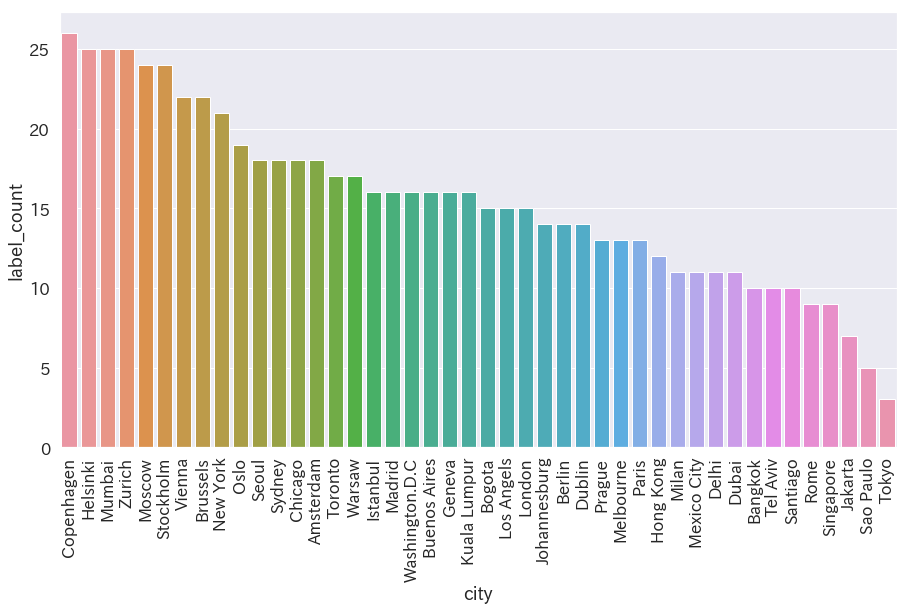

In [15]:
df_standing = df[df["label_name"] == "standing"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_standing)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Delhi'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Sydney'),
 Text(0,0,'Toronto'),
 Text(0,0,'London'),
 Text(0,0,'Madrid'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Dublin'),
 Text(0,0,'Bogota'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Chicago'),
 Text(0,0,'New York'),
 Text(0,0,'Rome'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Milan'),
 Text(0,0,'Dubai'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Oslo'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Vienna'),
 Text(0,0,'Singapore'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Brussels'),
 Text(0,0,'Santiago'),
 Text(0,0,'Geneva'),
 Text(0,0,'Moscow'),
 Text(0,0,'Paris'),
 Text(0,0,'Seoul'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Zurich'),
 Text(0,0,'Berlin'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Prague'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Tokyo')]

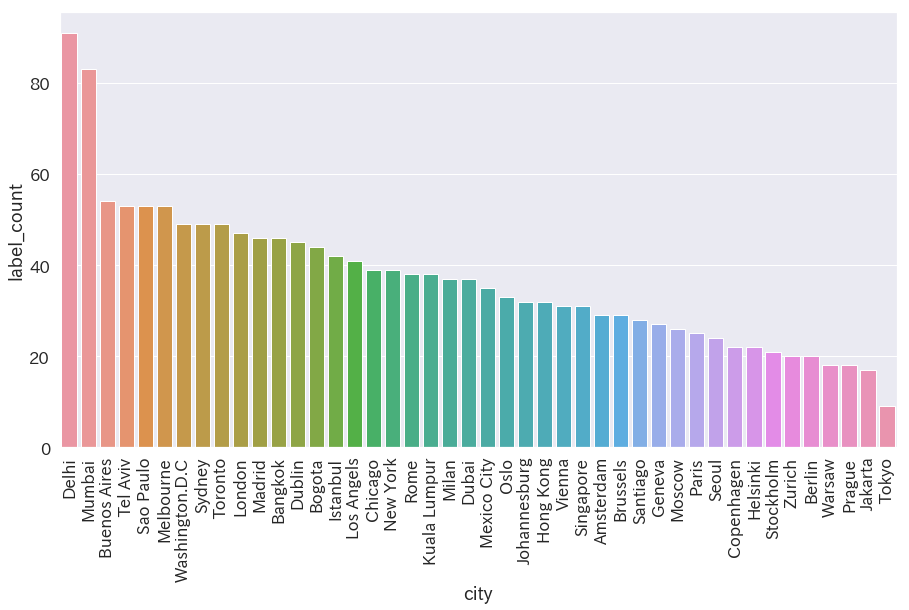

In [16]:
df_abdomen = df[df["label_name"] == "abdomen"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_abdomen)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Santiago'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Chicago'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'New York'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Brussels'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Geneva'),
 Text(0,0,'Zurich'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Madrid'),
 Text(0,0,'Prague'),
 Text(0,0,'London'),
 Text(0,0,'Delhi'),
 Text(0,0,'Toronto'),
 Text(0,0,'Milan'),
 Text(0,0,'Bogota'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Rome'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Vienna'),
 Text(0,0,'Dubai'),
 Text(0,0,'Moscow'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Berlin'),
 Text(0,0,'Sydney'),
 Text(0,0,'Oslo'),
 Text(0,0,'Singapore'),
 Text(0,0,'Paris'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Dublin'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Seoul'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Tokyo')]

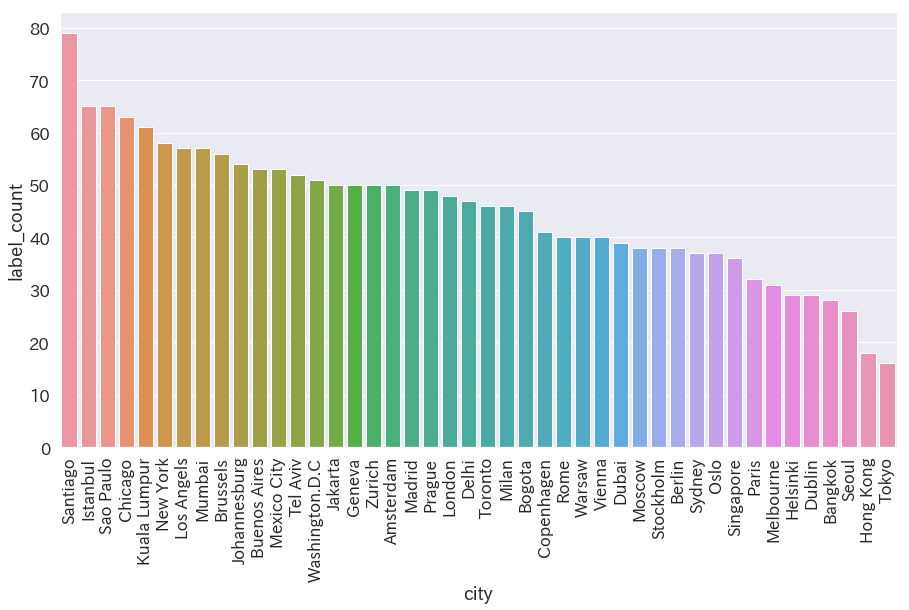

In [17]:
df_visioncare = df[df["label_name"] == "vision care"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_visioncare)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Sao Paulo'),
 Text(0,0,'Santiago'),
 Text(0,0,'Bogota'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Dublin'),
 Text(0,0,'London'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Milan'),
 Text(0,0,'Rome'),
 Text(0,0,'Chicago'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Geneva'),
 Text(0,0,'Toronto'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Madrid'),
 Text(0,0,'Brussels'),
 Text(0,0,'Delhi'),
 Text(0,0,'New York'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Zurich'),
 Text(0,0,'Moscow'),
 Text(0,0,'Vienna'),
 Text(0,0,'Paris'),
 Text(0,0,'Prague'),
 Text(0,0,'Oslo'),
 Text(0,0,'Sydney'),
 Text(0,0,'Berlin'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Dubai'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Seoul'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Singapore'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Tokyo')]

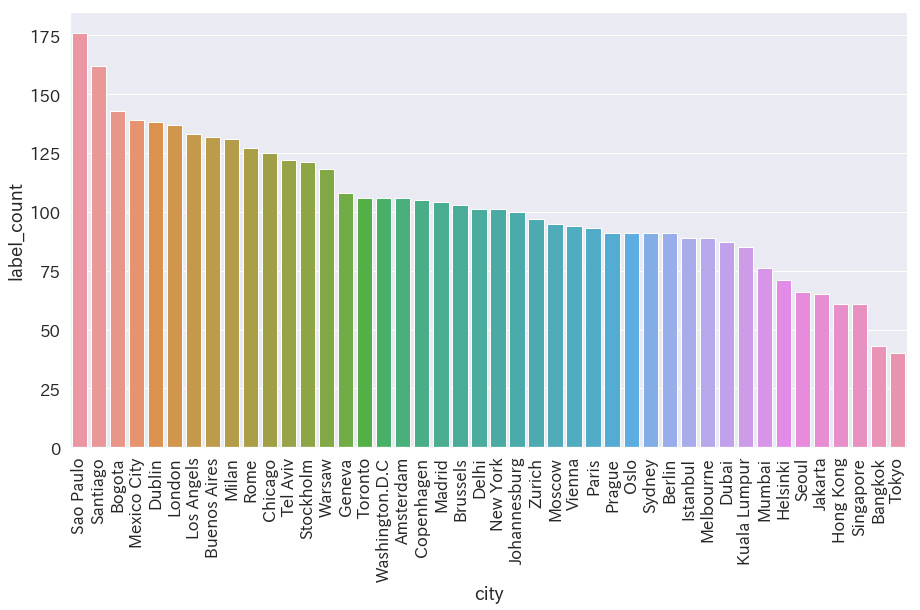

In [18]:
df_selfie = df[df["label_name"] == "selfie"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_selfie)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Delhi'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Moscow'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Dubai'),
 Text(0,0,'Sydney'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Rome'),
 Text(0,0,'Oslo'),
 Text(0,0,'New York'),
 Text(0,0,'Madrid'),
 Text(0,0,'Dublin'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Chicago'),
 Text(0,0,'Toronto'),
 Text(0,0,'Milan'),
 Text(0,0,'London'),
 Text(0,0,'Bogota'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Brussels'),
 Text(0,0,'Vienna'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Santiago'),
 Text(0,0,'Zurich'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Singapore'),
 Text(0,0,'Geneva'),
 Text(0,0,'Prague'),
 Text(0,0,'Berlin'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Seoul'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Paris'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Tokyo')]

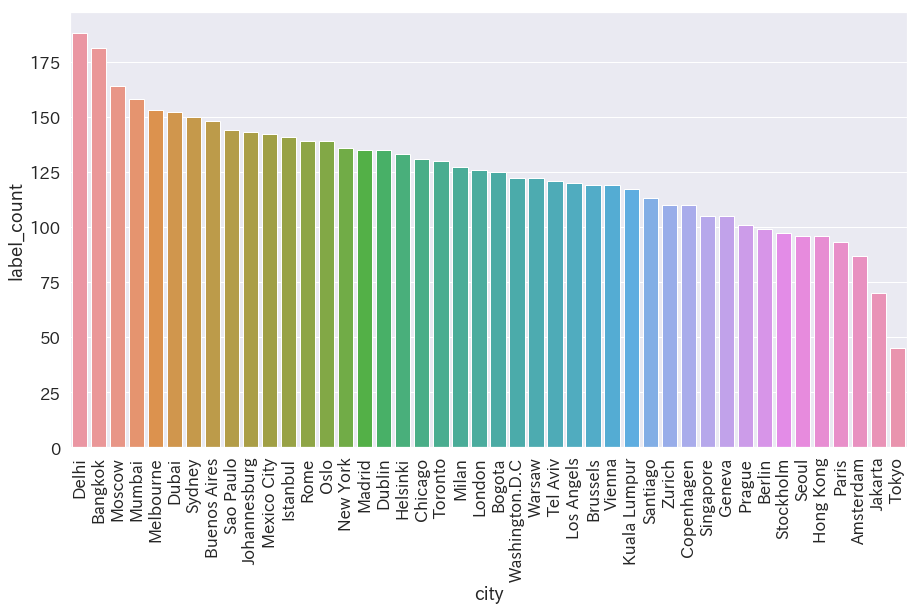

In [19]:
df_shoulder = df[df["label_name"] == "shoulder"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_shoulder)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Sao Paulo'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Delhi'),
 Text(0,0,'Bogota'),
 Text(0,0,'Dubai'),
 Text(0,0,'Santiago'),
 Text(0,0,'Dublin'),
 Text(0,0,'Madrid'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Milan'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Rome'),
 Text(0,0,'Istanbul'),
 Text(0,0,'New York'),
 Text(0,0,'Moscow'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Brussels'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Paris'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Vienna'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Oslo'),
 Text(0,0,'Toronto'),
 Text(0,0,'London'),
 Text(0,0,'Prague'),
 Text(0,0,'Seoul'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Singapore'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Geneva'),
 Text(0,0,'Zurich'),
 Text(0,0,'Chicago'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Sydney'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Berlin'),
 Text(0,0,'Tokyo')]

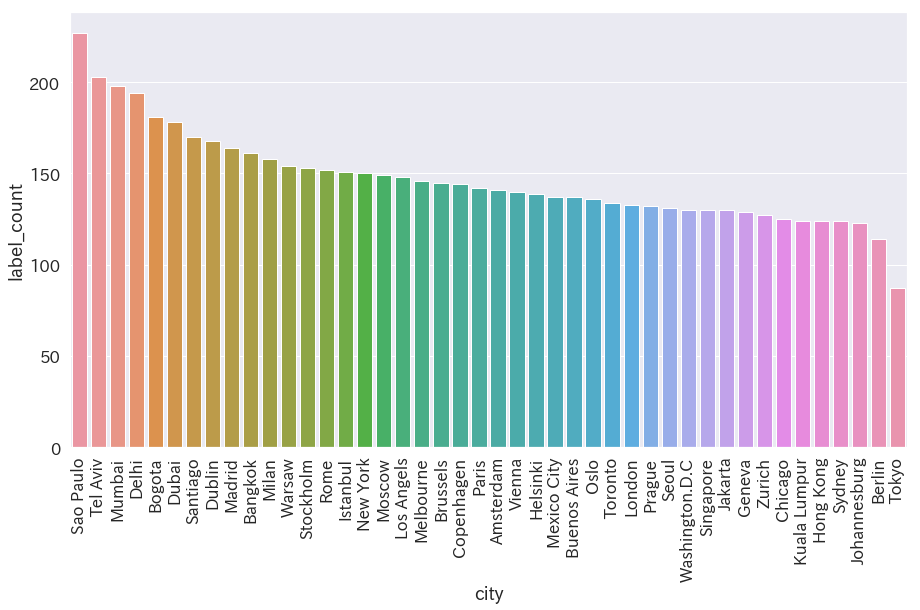

In [20]:
df_longhair = df[df["label_name"] == "long hair"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_longhair)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Sydney'),
 Text(0,0,'Moscow'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Dublin'),
 Text(0,0,'Delhi'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Toronto'),
 Text(0,0,'Rome'),
 Text(0,0,'Dubai'),
 Text(0,0,'London'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Oslo'),
 Text(0,0,'New York'),
 Text(0,0,'Vienna'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Singapore'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Zurich'),
 Text(0,0,'Brussels'),
 Text(0,0,'Prague'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Madrid'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Seoul'),
 Text(0,0,'Chicago'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Paris'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Milan'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Berlin'),
 Text(0,0,'Bogota'),
 Text(0,0,'Geneva'),
 Text(0,0,'Santiago'),
 Text(0,0,'Tokyo')]

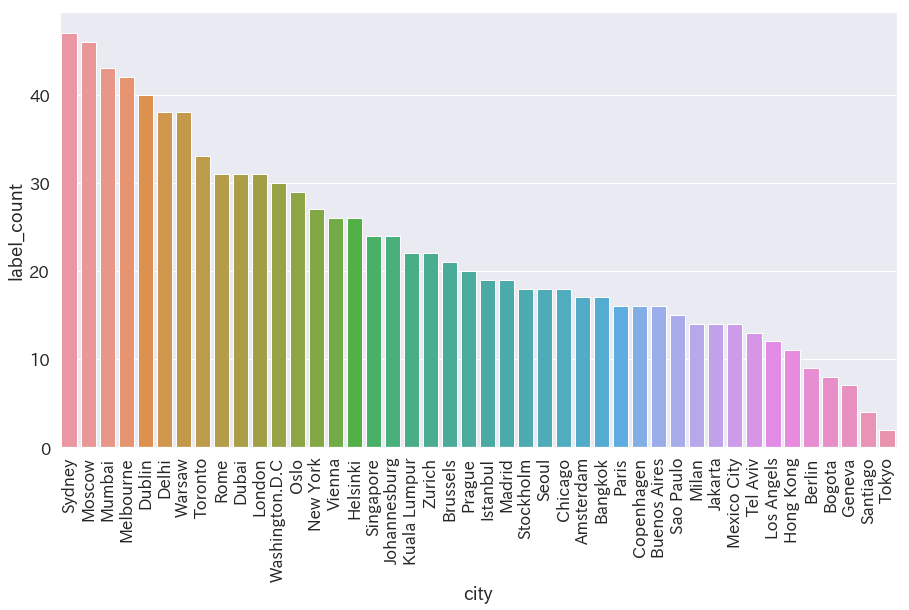

In [21]:
df_dress = df[df["label_name"] == "dress"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_dress)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Singapore'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Berlin'),
 Text(0,0,'Madrid'),
 Text(0,0,'Moscow'),
 Text(0,0,'Dubai'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Seoul'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Paris'),
 Text(0,0,'Chicago'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Zurich'),
 Text(0,0,'London'),
 Text(0,0,'Toronto'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Rome'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Brussels'),
 Text(0,0,'Milan'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Bogota'),
 Text(0,0,'Santiago'),
 Text(0,0,'Geneva'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Vienna'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Prague'),
 Text(0,0,'Dublin'),
 Text(0,0,'Sydney'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Oslo'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'New York'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Delhi')]

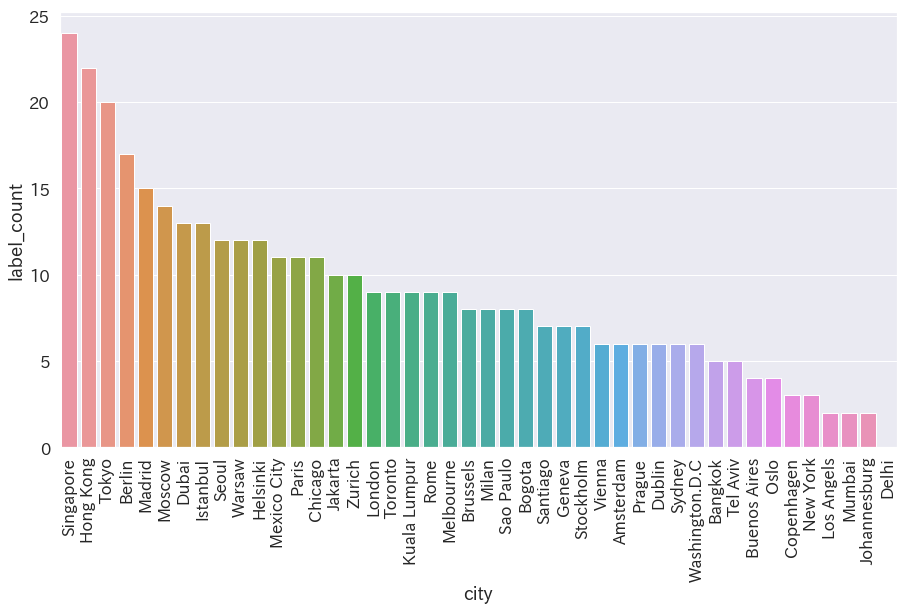

In [22]:
df_city = df[df["label_name"] == "city"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_city)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Tokyo'),
 Text(0,0,'Seoul'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Dubai'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Singapore'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Milan'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Zurich'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Vienna'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Geneva'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Prague'),
 Text(0,0,'Moscow'),
 Text(0,0,'Bogota'),
 Text(0,0,'Dublin'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Paris'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Rome'),
 Text(0,0,'Santiago'),
 Text(0,0,'Toronto'),
 Text(0,0,'Delhi'),
 Text(0,0,'Madrid'),
 Text(0,0,'Berlin'),
 Text(0,0,'Sydney'),
 Text(0,0,'New York'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Brussels'),
 Text(0,0,'Chicago'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'London'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Oslo')]

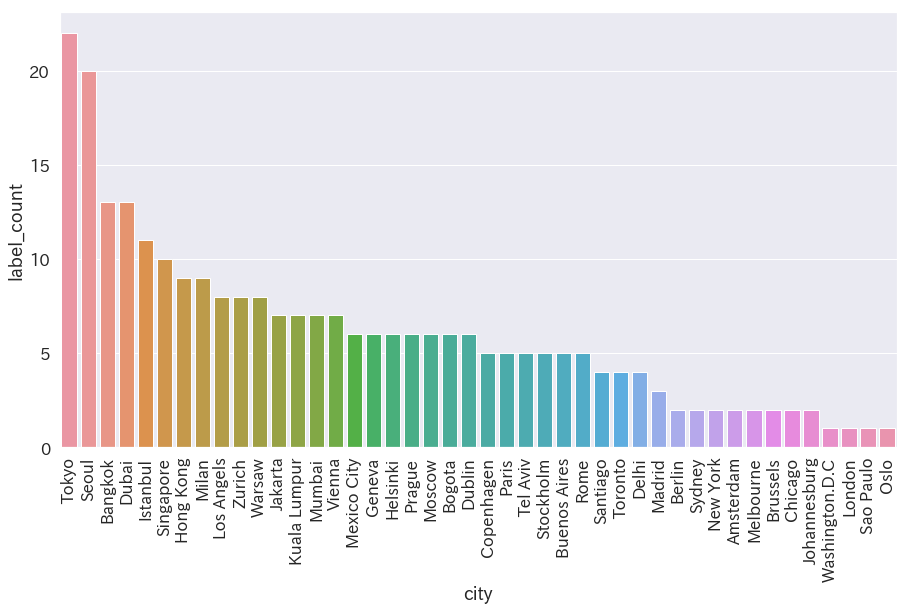

In [23]:
df_bangs = df[df["label_name"] == "bangs"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_bangs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Tel Aviv'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Oslo'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Zurich'),
 Text(0,0,'New York'),
 Text(0,0,'London'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Madrid'),
 Text(0,0,'Berlin'),
 Text(0,0,'Brussels'),
 Text(0,0,'Milan'),
 Text(0,0,'Santiago'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Chicago'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Geneva'),
 Text(0,0,'Paris'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Toronto'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Sydney'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Prague'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Rome'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Moscow'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Vienna'),
 Text(0,0,'Bogota'),
 Text(0,0,'Delhi'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Dublin'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Dubai'),
 Text(0,0,'Singapore'),
 Text(0,0,'Seoul'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Tokyo')]

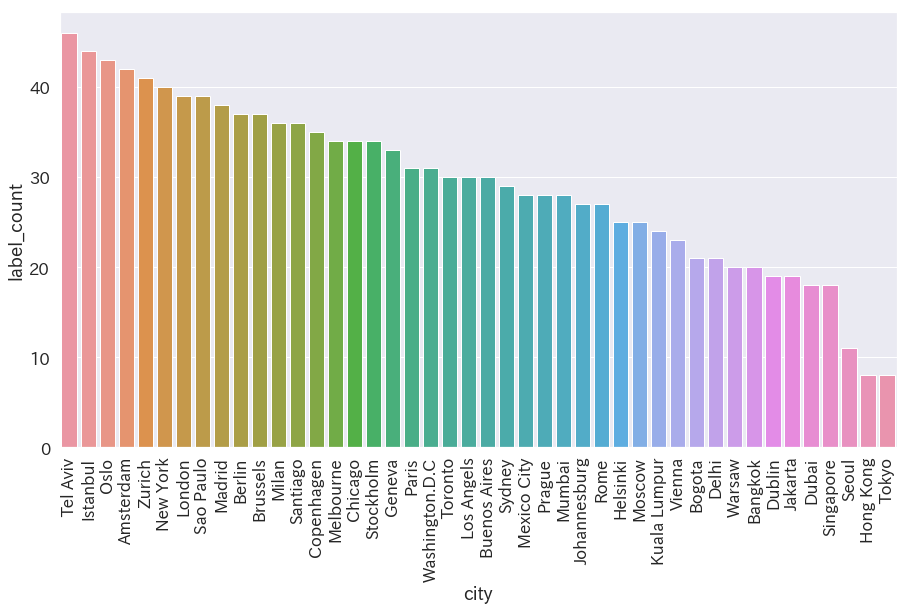

In [24]:
df_sunglasses = df[df["label_name"] == "sunglasses"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_sunglasses)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Delhi'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Dublin'),
 Text(0,0,'Chicago'),
 Text(0,0,'Brussels'),
 Text(0,0,'Seoul'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Sydney'),
 Text(0,0,'Madrid'),
 Text(0,0,'Milan'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'London'),
 Text(0,0,'Geneva'),
 Text(0,0,'Zurich'),
 Text(0,0,'Moscow'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Dubai'),
 Text(0,0,'New York'),
 Text(0,0,'Rome'),
 Text(0,0,'Singapore'),
 Text(0,0,'Toronto'),
 Text(0,0,'Santiago'),
 Text(0,0,'Berlin'),
 Text(0,0,'Prague'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Oslo'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Vienna'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Bogota'),
 Text(0,0,'Paris')]

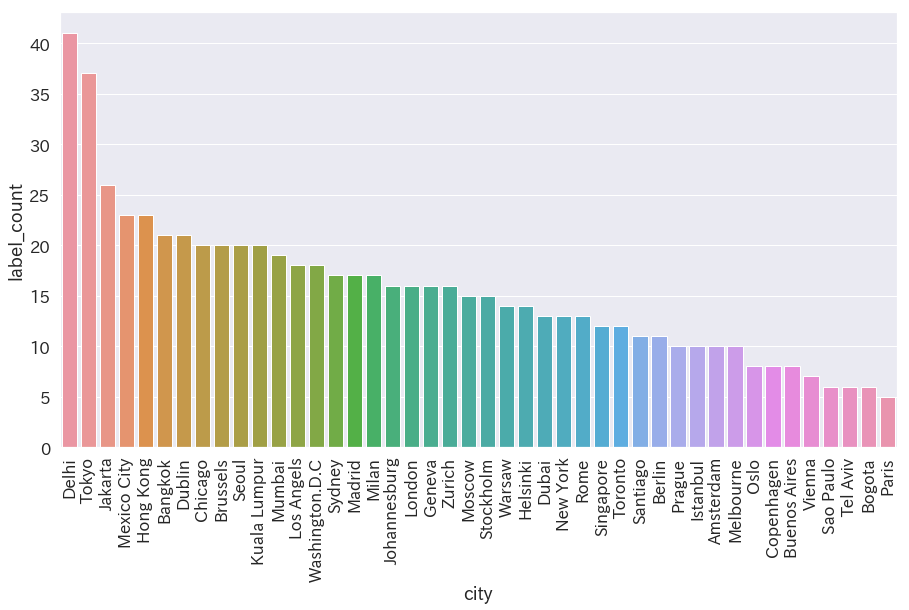

In [25]:
df_pink = df[df["label_name"] == "pink"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_pink)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Tokyo'),
 Text(0,0,'Singapore'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Sydney'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Oslo'),
 Text(0,0,'Zurich'),
 Text(0,0,'Seoul'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Vienna'),
 Text(0,0,'Berlin'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Melbourne'),
 Text(0,0,'New York'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Toronto'),
 Text(0,0,'Prague'),
 Text(0,0,'Brussels'),
 Text(0,0,'Milan'),
 Text(0,0,'Rome'),
 Text(0,0,'Chicago'),
 Text(0,0,'Dubai'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Geneva'),
 Text(0,0,'Bogota'),
 Text(0,0,'Madrid'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Moscow'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Delhi'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Dublin'),
 Text(0,0,'Paris'),
 Text(0,0,'Santiago'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'London')]

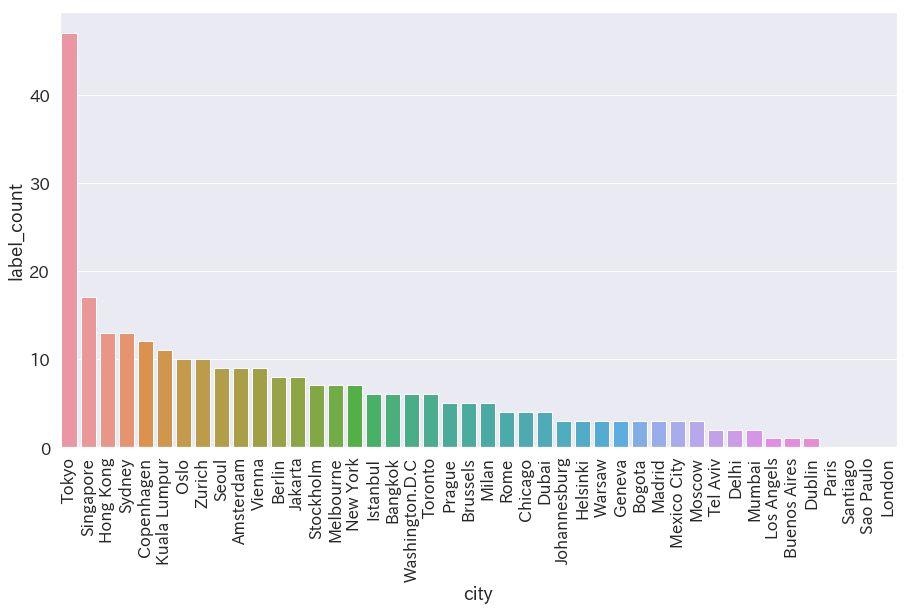

In [26]:
df_food = df[df["label_name"] == "food"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_food)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Copenhagen'),
 Text(0,0,'Dublin'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Oslo'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Brussels'),
 Text(0,0,'Sydney'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Zurich'),
 Text(0,0,'Chicago'),
 Text(0,0,'Moscow'),
 Text(0,0,'Prague'),
 Text(0,0,'Vienna'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Toronto'),
 Text(0,0,'Milan'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Berlin'),
 Text(0,0,'London'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'New York'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Dubai'),
 Text(0,0,'Geneva'),
 Text(0,0,'Rome'),
 Text(0,0,'Paris'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Madrid'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Santiago'),
 Text(0,0,'Bogota'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Seoul'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Delhi'),
 Text(0,0,'Singapore'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Mumbai')]

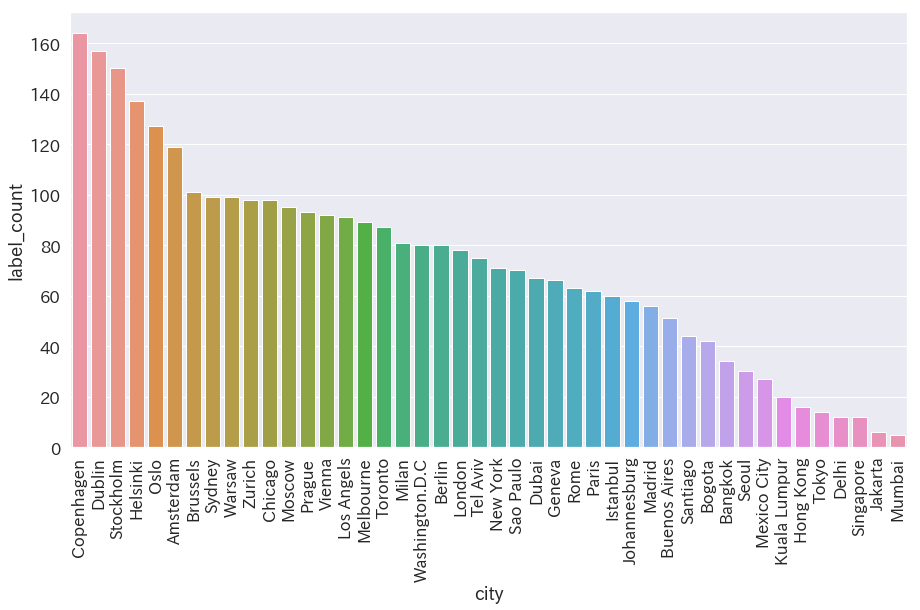

In [27]:
df_blond = df[df["label_name"] == "blond"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_blond)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Berlin'),
 Text(0,0,'Milan'),
 Text(0,0,'Oslo'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Zurich'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Brussels'),
 Text(0,0,'Prague'),
 Text(0,0,'Vienna'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Geneva'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Santiago'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Paris'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Moscow'),
 Text(0,0,'Bogota'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Madrid'),
 Text(0,0,'Delhi'),
 Text(0,0,'London'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Rome'),
 Text(0,0,'Dubai'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Toronto'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Dublin'),
 Text(0,0,'New York'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Sydney'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Chicago'),
 Text(0,0,'Seoul'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Singapore'),
 Text(0,0,'Hong Kong')]

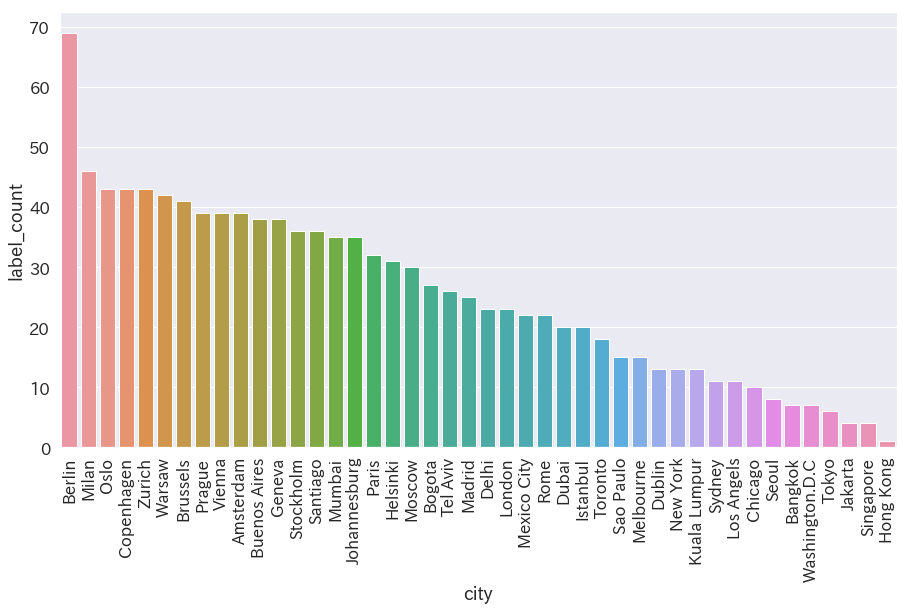

In [28]:
df_bw = df[df["label_name"] == "black and white"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_bw)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Buenos Aires'),
 Text(0,0,'Toronto'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Milan'),
 Text(0,0,'Madrid'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Sydney'),
 Text(0,0,'Santiago'),
 Text(0,0,'Rome'),
 Text(0,0,'Dubai'),
 Text(0,0,'Vienna'),
 Text(0,0,'Moscow'),
 Text(0,0,'Zurich'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'New York'),
 Text(0,0,'London'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Brussels'),
 Text(0,0,'Chicago'),
 Text(0,0,'Geneva'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Oslo'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Prague'),
 Text(0,0,'Bogota'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Berlin'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Dublin'),
 Text(0,0,'Singapore'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Paris'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Seoul'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Delhi'),
 Text(0,0,'Mumbai')]

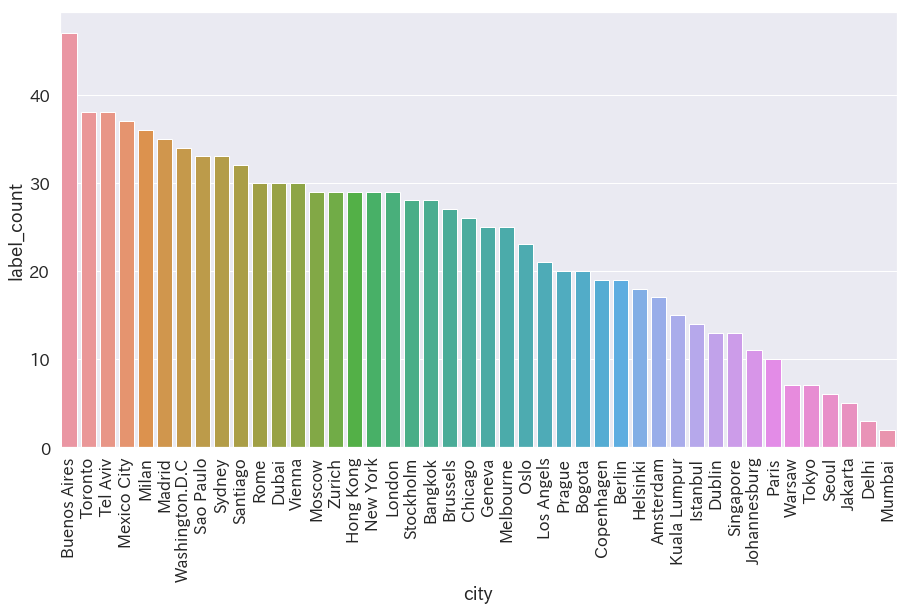

In [29]:
df_swimwear = df[df["label_name"] == "swimwear"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_swimwear)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Buenos Aires'),
 Text(0,0,'Madrid'),
 Text(0,0,'Santiago'),
 Text(0,0,'Berlin'),
 Text(0,0,'Zurich'),
 Text(0,0,'Milan'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Singapore'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Geneva'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Toronto'),
 Text(0,0,'Rome'),
 Text(0,0,'Sydney'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Dublin'),
 Text(0,0,'London'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Dubai'),
 Text(0,0,'Brussels'),
 Text(0,0,'Stockholm'),
 Text(0,0,'New York'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Bogota'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Paris'),
 Text(0,0,'Vienna'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Moscow'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Prague'),
 Text(0,0,'Oslo'),
 Text(0,0,'Seoul'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Chicago'),
 Text(0,0,'Delhi'),
 Text(0,0,'Johannesburg')]

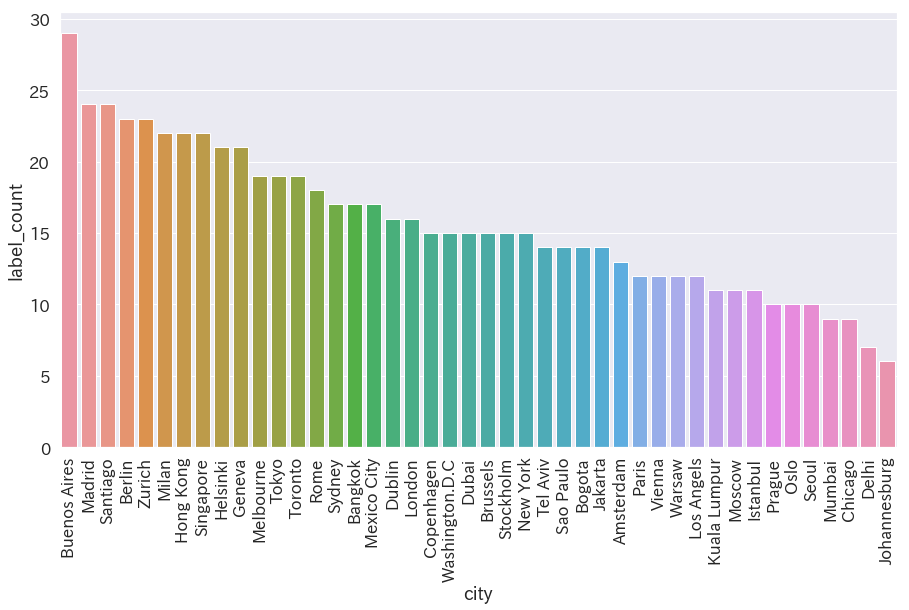

In [30]:
df_beach = df[df["label_name"] == "beach"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_beach)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'London'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Sydney'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Chicago'),
 Text(0,0,'New York'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Toronto'),
 Text(0,0,'Dublin'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Oslo'),
 Text(0,0,'Berlin'),
 Text(0,0,'Santiago'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Vienna'),
 Text(0,0,'Rome'),
 Text(0,0,'Madrid'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Brussels'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Milan'),
 Text(0,0,'Bogota'),
 Text(0,0,'Prague'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Moscow'),
 Text(0,0,'Dubai'),
 Text(0,0,'Zurich'),
 Text(0,0,'Paris'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Geneva'),
 Text(0,0,'Seoul'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Singapore'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Delhi'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Tokyo')]

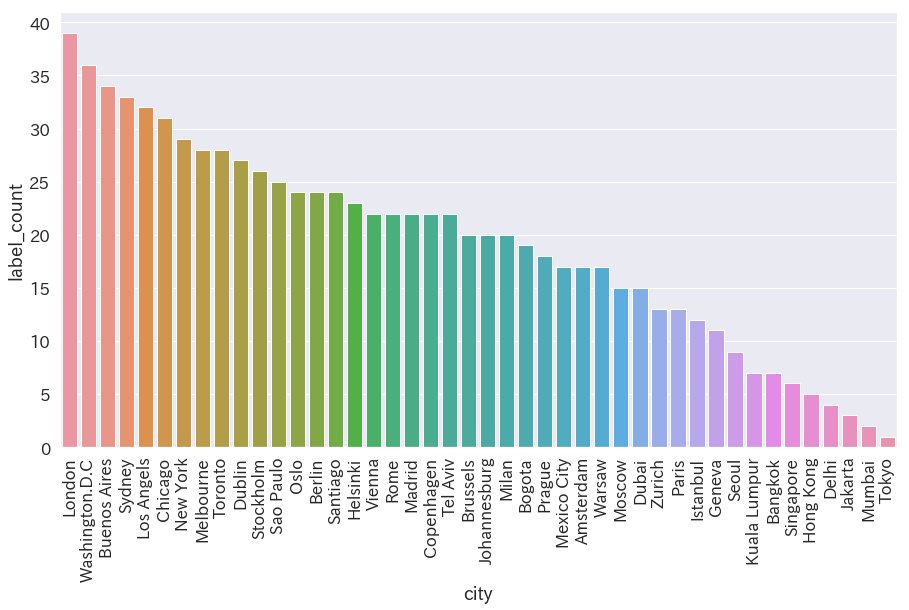

In [31]:
df_muscle = df[df["label_name"] == "muscle"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_muscle)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'London'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Santiago'),
 Text(0,0,'New York'),
 Text(0,0,'Sydney'),
 Text(0,0,'Chicago'),
 Text(0,0,'Zurich'),
 Text(0,0,'Moscow'),
 Text(0,0,'Bogota'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Toronto'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Dublin'),
 Text(0,0,'Vienna'),
 Text(0,0,'Milan'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Rome'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Madrid'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Dubai'),
 Text(0,0,'Geneva'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Oslo'),
 Text(0,0,'Prague'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Brussels'),
 Text(0,0,'Berlin'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Singapore'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Delhi'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Paris'),
 Text(0,0,'Seoul'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Jakarta')]

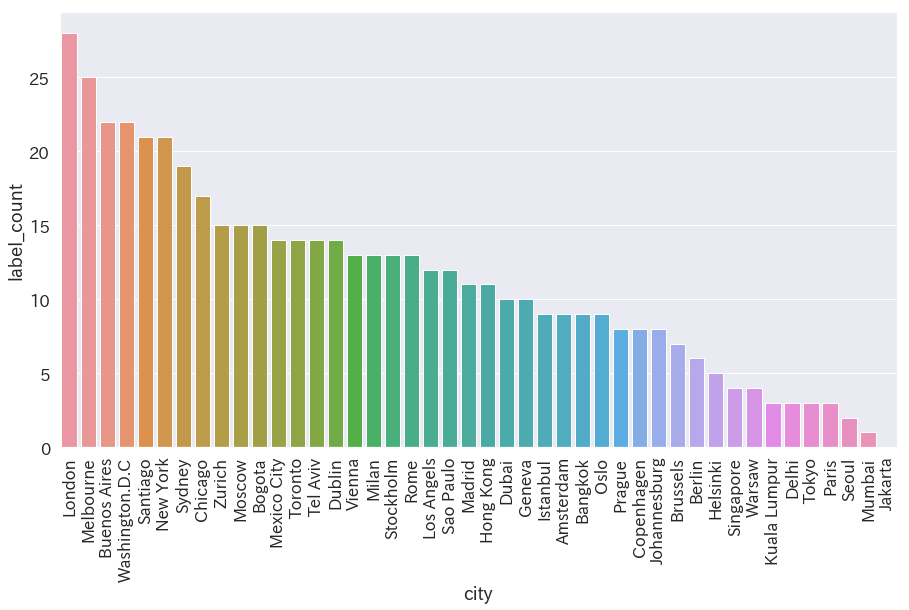

In [32]:
df_undergarment = df[df["label_name"] == "undergarment"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_undergarment)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Hong Kong'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Vienna'),
 Text(0,0,'Seoul'),
 Text(0,0,'Prague'),
 Text(0,0,'Singapore'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Stockholm'),
 Text(0,0,'London'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Sydney'),
 Text(0,0,'New York'),
 Text(0,0,'Moscow'),
 Text(0,0,'Berlin'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Chicago'),
 Text(0,0,'Madrid'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Toronto'),
 Text(0,0,'Oslo'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Zurich'),
 Text(0,0,'Paris'),
 Text(0,0,'Brussels'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Dublin'),
 Text(0,0,'Geneva'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Delhi'),
 Text(0,0,'Rome'),
 Text(0,0,'Santiago'),
 Text(0,0,'Milan'),
 Text(0,0,'Dubai'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Bogota')]

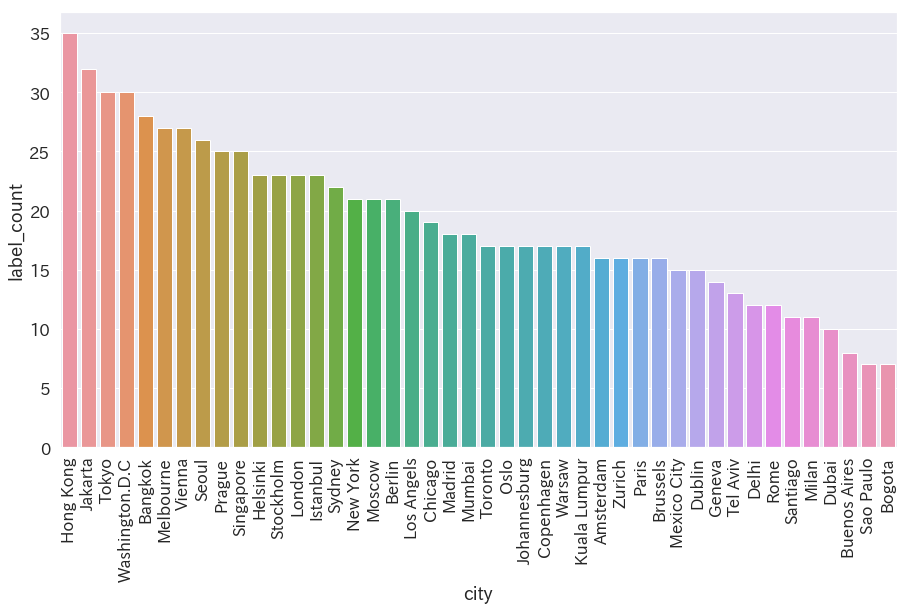

In [33]:
df_plant = df[df["label_name"] == "plant"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_plant)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Melbourne'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Sydney'),
 Text(0,0,'Toronto'),
 Text(0,0,'Dubai'),
 Text(0,0,'Dublin'),
 Text(0,0,'New York'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'London'),
 Text(0,0,'Moscow'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Milan'),
 Text(0,0,'Rome'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Delhi'),
 Text(0,0,'Chicago'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Singapore'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Bogota'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Madrid'),
 Text(0,0,'Vienna'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Geneva'),
 Text(0,0,'Zurich'),
 Text(0,0,'Santiago'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Seoul'),
 Text(0,0,'Prague'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Brussels'),
 Text(0,0,'Oslo'),
 Text(0,0,'Paris'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Berlin'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Tokyo')]

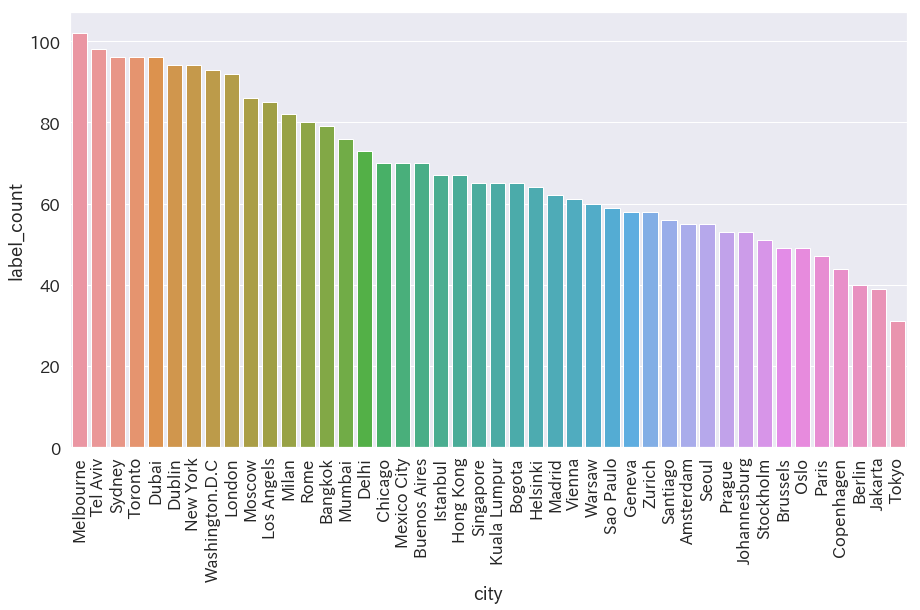

In [34]:
df_skin = df[df["label_name"] == "leg"]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='label_count', data=df_skin)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Buenos Aires'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Milan'),
 Text(0,0,'Dubai'),
 Text(0,0,'London'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Bogota'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Vienna'),
 Text(0,0,'Rome'),
 Text(0,0,'Santiago'),
 Text(0,0,'Madrid'),
 Text(0,0,'Sydney'),
 Text(0,0,'Moscow'),
 Text(0,0,'Toronto'),
 Text(0,0,'New York'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Chicago'),
 Text(0,0,'Prague'),
 Text(0,0,'Zurich'),
 Text(0,0,'Seoul'),
 Text(0,0,'Geneva'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Dublin'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Brussels'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Oslo'),
 Text(0,0,'Paris'),
 Text(0,0,'Berlin'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Delhi'),
 Text(0,0,'Singapore'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Jakarta')]

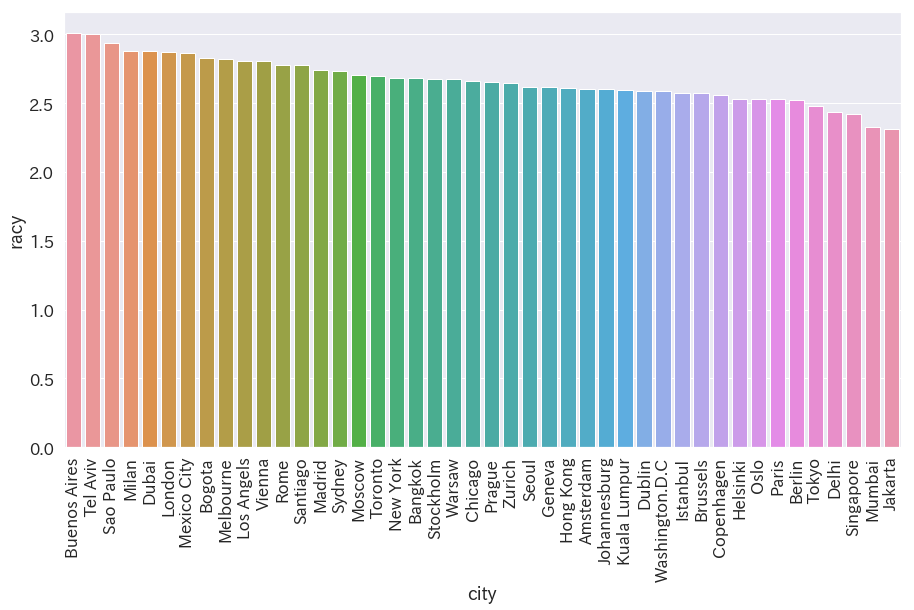

In [35]:
df_racy = data.groupby(['city']).mean()
df_racy = df_racy.sort_values(['racy'], ascending=False)
df_racy = df_racy.reset_index()
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='racy', data=df_racy)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)